In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import os
print(os.getcwd())

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

from Source.MIMO import plotbeam
from Source.RF_Env import RFBeamEnv, Generate_BeamDir
from Source.RL_Agent import RL_Agent, get_Values


C:\PyCharm_Workspace\Drone_RL\Test


In [3]:
def E_CDF(data):
    arr_data = np.sort(data)
    x_values = np.linspace(start=min(arr_data), stop=max(arr_data),num=len(arr_data))
    y_values = []
    
    for val in x_values:
        temp = arr_data[arr_data <= val]
        value = len(temp)/len(arr_data)
        y_values.append(value)
    
    return x_values, y_values

In [4]:
#X_t = X_0 + v_k(t)

def play_one_episode(agent, eps, ue,vel):
    obs = agent.env.reset(ue, vel)
    #print("Estimated UE loc: {0}".format(obs))
    total_rwd= 0
    done = False
    #possible_ue_loc = [[x,ue_s[1],ue_s[2]] for x in range(ue_s[0]+ue_v,ue_s[0]+ue_tdist+1,ue_v)]
    steps = 0
    cur_ue = np.array(ue)
    while not done:
        #ue_eps = eps*(1-iters/(N+10))
        action = agent.sample_action(obs, eps)
        #print("action: {0}".format(action))

        prev_obs = np.array(obs)

        obs, rwd, done = agent.env.step(action)
        agent.Update_Q(prev_obs, action, obs, rwd)
        
        
        cur_ue[0] += vel
        #rint("cur_ue: {0}".format(cur_ue))
        print("obs: {0}, rwd: {1}".format(prev_obs, rwd))
        print("Rate observed: {0}, LosRate: {1}".format(agent.env.get_Rate(), agent.env.get_LoS_Rate(cur_ue)))
        
        total_rwd+= rwd
        steps+=1
    print("Total steps: {0}".format(steps))
    return total_rwd

In [5]:
#X_t = X_0 + v_k(t)

if __name__ == "__main__":
    
    #omega_vec = [30, 45, 60, 90]
    #Agent Parameters
    sc_xyz=np.array([[30,50,0], [70,50,0]])#[10,50,0], [20,50,0]])
    ch_model = 'fsp-nlos'
    env = RFBeamEnv(sc_xyz, ch_model)
    alpha = 0.2
    gamma =  0.7
    epsilon_max = 1.00
    epsilon_min = 0.05
    epsilon_decay = 0.9993
    
    
    #UE parameters
    ue_s = np.array([0,100,0]) #[[10,15,0], [20,15,0], [40,15,0], [60,15,0]]
    ue_d = np.array([100,100,0])
    ue_v = 20 #, 9, 10, 12]
    ue_loc = np.array([np.array([x, ue_s[1], ue_s[2]]) for x in range(ue_s[0], ue_d[0]+1, ue_v)])
    #print(ue_loc)
    
    rate_thr = 0.5
    
    agent = RL_Agent(env, alpha, gamma, ue_loc)
    agent.env.set_rate_threshold(rate_thr)
    agent.env.set_goal(ue_d)
    print("Ptx: {0}".format(agent.env.ptx))
    #agent.env.set_Goal(self, ue_d)
    M = 6000#no. of episodes
    ep_ndx = 0
    ep_rwds = []
    k = -1
    eps = epsilon_max
    while (ep_ndx < M):
        print("\nEpisode: {0}".format(ep_ndx+1))
        
        if (eps >= epsilon_min):
            eps *= epsilon_decay
        else:
            eps = epsilon_min
        #eps = 0.3 #*(1-ep_ndx/(M+5))
        rwd = play_one_episode(agent, eps, ue_s, ue_v)
        ep_rwds.append(rwd)
        
        ep_ndx += 1
        
    
    print("Training Done!!")
    #print("After episode: {0}".format(agent.Q))


Ptx: 30

Episode: 1
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.00199105726890968
Rate observed: 0.00199105726890968, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.74889357])], rwd: 0.023406051058260467
Rate observed: 0.023406051058260467, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.39269908])], rwd: 0.0003088270692955285
Rate observed: 0.0003088270692955285, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.001681601527561768
Rate observed: 0.001681601527561768, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.74889357])], rwd: 0.001046196281515558
Rate observed: 0.001046196281515558, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.001571976076920699
Rate observed: 0.001571976076920699, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.74889357])], rwd: 0.030720789152711602
Rate observed: 0.0

obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.0005547688216315874
Rate observed: 0.0005547688216315874, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357])], rwd: 0.037132179638705194
Rate observed: 0.037132179638705194, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.002896944246351704
Rate observed: 0.002896944246351704, LosRate: 0.057259324409902924
Total steps: 5

Episode: 13
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.001025532461129245
Rate observed: 0.001025532461129245, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.35619449])], rwd: 0.0035118277063916482
Rate observed: 0.0035118277063916482, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.57079633])], rwd: 0.0003031362592427307
Rate observed: 0.0003031362592427307, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.0001500384596209949
Rate observed: 0.0001500384596

Rate observed: 0.0028111164620327187, LosRate: 0.057259324409902924
Total steps: 5

Episode: 24
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.024177232720760854
Rate observed: 0.024177232720760854, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.00041360528036525927
Rate observed: 0.00041360528036525927, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.0011070985041315093
Rate observed: 0.0011070985041315093, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.016593872073600066
Rate observed: 0.016593872073600066, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.0005955006027486128
Rate observed: 0.0005955006027486128, LosRate: 0.057259324409902924
Total steps: 5

Episode: 25
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.024414443394673874
Rate observed: 0.024414443394673874, LosRate: 0.09155259412315646
obs: [arra

Rate observed: 0.0025238565847509786, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.027245235408777345
Rate observed: 0.027245235408777345, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.00118416745512941
Rate observed: 0.00118416745512941, LosRate: 0.057259324409902924
Total steps: 5

Episode: 36
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.0253875934573035
Rate observed: 0.0253875934573035, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.024414819740872274
Rate observed: 0.024414819740872274, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.39269908])], rwd: 0.0015836982005446752
Rate observed: 0.0015836982005446752, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357])], rwd: 0.0007295568407568977
Rate observed: 0.0007295568407568977, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.96349541])]

Rate observed: 0.026548310547776614, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.028328957266916734
Rate observed: 0.028328957266916734, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.0006632771446496281
Rate observed: 0.0006632771446496281, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.96349541])], rwd: 0.0001672949095197001
Rate observed: 0.0001672949095197001, LosRate: 0.057259324409902924
Total steps: 5

Episode: 48
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.005177117067352139
Rate observed: 0.005177117067352139, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([3.14159265])], rwd: 0.02449860746904667
Rate observed: 0.02449860746904667, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.39269908])], rwd: 0.0004570409956209144
Rate observed: 0.0004570409956209144, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.3561944

Rate observed: 0.00012765642506397414, LosRate: 0.07614744260287012
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.013764527159469164
Rate observed: 0.013764527159469164, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.17809725])], rwd: 0.002745193784220741
Rate observed: 0.002745193784220741, LosRate: 0.057259324409902924
Total steps: 5

Episode: 59
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.002044139234504504
Rate observed: 0.002044139234504504, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.0004222494498610839
Rate observed: 0.0004222494498610839, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.029458212082422396
Rate observed: 0.029458212082422396, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.025755883574961995
Rate observed: 0.025755883574961995, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.785398

obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.0024170924451734853
Rate observed: 0.0024170924451734853, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.00172053474162791
Rate observed: 0.00172053474162791, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.02299675456584368
Rate observed: 0.02299675456584368, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.0007874373016823604
Rate observed: 0.0007874373016823604, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.96349541])], rwd: 0.01550779707029188
Rate observed: 0.01550779707029188, LosRate: 0.057259324409902924
Total steps: 5

Episode: 71
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02568402602522856
Rate observed: 0.02568402602522856, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.0016637805549354562
Rate observed: 0.0016637805549354562, Lo

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0028345233866199204
Rate observed: 0.0028345233866199204, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.014240615007398611
Rate observed: 0.014240615007398611, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.17809725])], rwd: 0.004712083375445292
Rate observed: 0.004712083375445292, LosRate: 0.057259324409902924
Total steps: 5

Episode: 82
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.002368770676534377
Rate observed: 0.002368770676534377, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.020907959941354137
Rate observed: 0.020907959941354137, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.00029558409663354106
Rate observed: 0.00029558409663354106, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.011884398411485989
Rate observed: 0.01188439841148

obs: [array([ 80, 100,   0]) array([2.74889357])], rwd: 0.0005115999804146044
Rate observed: 0.0005115999804146044, LosRate: 0.057259324409902924
Total steps: 5

Episode: 93
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.004285320414007058
Rate observed: 0.004285320414007058, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.023446666671705915
Rate observed: 0.023446666671705915, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.39269908])], rwd: 0.00044998856410114857
Rate observed: 0.00044998856410114857, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.0009375172678099675
Rate observed: 0.0009375172678099675, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([2.35619449])], rwd: 0.012338596789400661
Rate observed: 0.012338596789400661, LosRate: 0.057259324409902924
Total steps: 5

Episode: 94
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02404538968998877
Ra

obs: [array([ 20, 100,   0]) array([3.14159265])], rwd: 0.02500559129890997
Rate observed: 0.02500559129890997, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.026170094073641195
Rate observed: 0.026170094073641195, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.018055258084564194
Rate observed: 0.018055258084564194, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.011782975130611235
Rate observed: 0.011782975130611235, LosRate: 0.057259324409902924
Total steps: 5

Episode: 105
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.0016480134083449172
Rate observed: 0.0016480134083449172, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.74889357])], rwd: 0.005716983344129329
Rate observed: 0.005716983344129329, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.0004912215210988132
Rate observed: 0.0004912215210988132

Rate observed: 0.00016238173883888823, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.74889357])], rwd: 0.01360128821241207
Rate observed: 0.01360128821241207, LosRate: 0.057259324409902924
Total steps: 5

Episode: 116
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.004330478738087337
Rate observed: 0.004330478738087337, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.0025637965150430023
Rate observed: 0.0025637965150430023, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.57079633])], rwd: 0.0017146841326753583
Rate observed: 0.0017146841326753583, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.0010545701355373985
Rate observed: 0.0010545701355373985, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.35619449])], rwd: 0.0003655604952718465
Rate observed: 0.0003655604952718465, LosRate: 0.057259324409902924
Total steps: 5

Episode: 117
obs: [arr

Rate observed: 0.0011390469279345585, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.00041194598128237235
Rate observed: 0.00041194598128237235, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.57079633])], rwd: 0.0011165381022803747
Rate observed: 0.0011165381022803747, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.02749312337550853
Rate observed: 0.02749312337550853, LosRate: 0.057259324409902924
Total steps: 5

Episode: 128
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.005130348216746134
Rate observed: 0.005130348216746134, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([3.14159265])], rwd: 0.03133358013816695
Rate observed: 0.03133358013816695, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.009673375903728614
Rate observed: 0.009673375903728614, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.1780972

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.01388614621205519
Rate observed: 0.01388614621205519, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([1.17809725])], rwd: 0.015108077668050824
Rate observed: 0.015108077668050824, LosRate: 0.057259324409902924
Total steps: 5

Episode: 139
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026341829008066215
Rate observed: 0.026341829008066215, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02101768736020459
Rate observed: 0.02101768736020459, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.004256236524364863
Rate observed: 0.004256236524364863, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([3.14159265])], rwd: 0.01742456632551645
Rate observed: 0.01742456632551645, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.010593339673366202
Rate observed: 0.010593339673366202, LosRat

obs: [array([ 20, 100,   0]) array([2.35619449])], rwd: 0.0005354051649395766
Rate observed: 0.0005354051649395766, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.024511458989625208
Rate observed: 0.024511458989625208, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.01925266320983225
Rate observed: 0.01925266320983225, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.018729428781947624
Rate observed: 0.018729428781947624, LosRate: 0.057259324409902924
Total steps: 5

Episode: 151
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02622245096789335
Rate observed: 0.02622245096789335, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03493148527785328
Rate observed: 0.03493148527785328, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0005489767584483575
Rate observed: 0.0005489767584483575, Lo

Rate observed: 0.022328937576662527, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.01814885928241509
Rate observed: 0.01814885928241509, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.04989909247319105
Rate observed: 0.04989909247319105, LosRate: 0.057259324409902924
Total steps: 5

Episode: 162
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02586282158021656
Rate observed: 0.02586282158021656, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.05761986645697817
Rate observed: 0.05761986645697817, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02587040479565636
Rate observed: 0.02587040479565636, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.001623726557956755
Rate observed: 0.001623726557956755, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.74889357])], rwd: 0

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0006551919369275112
Rate observed: 0.0006551919369275112, LosRate: 0.057259324409902924
Total steps: 5

Episode: 173
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.004340565700260014
Rate observed: 0.004340565700260014, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.06203086872396247
Rate observed: 0.06203086872396247, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.004225482437217361
Rate observed: 0.004225482437217361, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([3.14159265])], rwd: 0.004914539382369726
Rate observed: 0.004914539382369726, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([3.14159265])], rwd: 0.015959651417667867
Rate observed: 0.015959651417667867, LosRate: 0.057259324409902924
Total steps: 5

Episode: 174
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.0020009186645239397
Rate o

Rate observed: 0.005473271084215237, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.02884979718968148
Rate observed: 0.02884979718968148, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.00021528441787153487
Rate observed: 0.00021528441787153487, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.74889357])], rwd: 0.020751355525943815
Rate observed: 0.020751355525943815, LosRate: 0.057259324409902924
Total steps: 5

Episode: 185
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.0268910349371162
Rate observed: 0.0268910349371162, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.029099298838901607
Rate observed: 0.029099298838901607, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.0021157756184301177
Rate observed: 0.0021157756184301177, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357])

obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.027300217057946795
Rate observed: 0.027300217057946795, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.0002291436274112896
Rate observed: 0.0002291436274112896, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.04158116965735907
Rate observed: 0.04158116965735907, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.042152900162148454
Rate observed: 0.042152900162148454, LosRate: 0.057259324409902924
Total steps: 5

Episode: 197
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.024389584275005278
Rate observed: 0.024389584275005278, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.06375632478440242
Rate observed: 0.06375632478440242, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.00277424197041048
Rate observed: 0.00277424197041048, LosR

Rate observed: 0.03196314544262445, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.038372270901653786
Rate observed: 0.038372270901653786, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0019449459509676683
Rate observed: 0.0019449459509676683, LosRate: 0.057259324409902924
Total steps: 5

Episode: 208
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.005173782003241347
Rate observed: 0.005173782003241347, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([3.14159265])], rwd: 0.005500630851119925
Rate observed: 0.005500630851119925, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.0004965941240193984
Rate observed: 0.0004965941240193984, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.57079633])], rwd: 0.03633568257668894
Rate observed: 0.03633568257668894, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816

Rate observed: 0.0004472033697363289, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.00500908044725967
Rate observed: 0.00500908044725967, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([3.14159265])], rwd: 0.040558048060270614
Rate observed: 0.040558048060270614, LosRate: 0.057259324409902924
Total steps: 5

Episode: 219
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02504556223996692
Rate observed: 0.02504556223996692, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.07034946417033675
Rate observed: 0.07034946417033675, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.002365810702663026
Rate observed: 0.002365810702663026, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.011805402787458228
Rate observed: 0.011805402787458228, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.17809725])], rw

Rate observed: 0.00039870141266160904, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.020046993063820386
Rate observed: 0.020046993063820386, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.01930168935622003
Rate observed: 0.01930168935622003, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.02773897331348607
Rate observed: 0.02773897331348607, LosRate: 0.057259324409902924
Total steps: 5

Episode: 231
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026835848326966876
Rate observed: 0.026835848326966876, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07334774810954858
Rate observed: 0.07334774810954858, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0022791841046635643
Rate observed: 0.0022791841046635643, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357])],

obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.004142354611571637
Rate observed: 0.004142354611571637, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.0004698678788462893
Rate observed: 0.0004698678788462893, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.0041378740065436785
Rate observed: 0.0041378740065436785, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([3.14159265])], rwd: 0.03941342976581159
Rate observed: 0.03941342976581159, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.013717784528008281
Rate observed: 0.013717784528008281, LosRate: 0.057259324409902924
Total steps: 5

Episode: 243
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02400101019975399
Rate observed: 0.02400101019975399, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.0009286726768951956
Rate observed: 0.0009286726768951956

Rate observed: 0.04018892719706129, LosRate: 0.057259324409902924
Total steps: 5

Episode: 254
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026184126994702305
Rate observed: 0.026184126994702305, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02491561576184275
Rate observed: 0.02491561576184275, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.00035357906460502334
Rate observed: 0.00035357906460502334, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.0006438908571806466
Rate observed: 0.0006438908571806466, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.96349541])], rwd: 0.0019482766857968098
Rate observed: 0.0019482766857968098, LosRate: 0.057259324409902924
Total steps: 5

Episode: 255
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026905881795385705
Rate observed: 0.026905881795385705, LosRate: 0.09155259412315646
obs: [array(

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0012271753124469742
Rate observed: 0.0012271753124469742, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.002953282856666722
Rate observed: 0.002953282856666722, LosRate: 0.057259324409902924
Total steps: 5

Episode: 266
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.0019503487009256105
Rate observed: 0.0019503487009256105, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.74889357])], rwd: 0.0026691743582778044
Rate observed: 0.0026691743582778044, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.57079633])], rwd: 0.023738894227886963
Rate observed: 0.023738894227886963, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.0010131831262249528
Rate observed: 0.0010131831262249528, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.35619449])], rwd: 0.012905907975114027
Rate observed: 0.01290590797

obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02639291126851988
Rate observed: 0.02639291126851988, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0009974922093045201
Rate observed: 0.0009974922093045201, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.029281338332805346
Rate observed: 0.029281338332805346, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0009407080601393403
Rate observed: 0.0009407080601393403, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.35619449])], rwd: 0.0030305344937737897
Rate observed: 0.0030305344937737897, LosRate: 0.057259324409902924
Total steps: 5

Episode: 278
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026979840580340603
Rate observed: 0.026979840580340603, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02802386833472572
Rate observed: 0.0280238683347257

Rate observed: 0.0437792906752816, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0042623775955569505
Rate observed: 0.0042623775955569505, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([3.14159265])], rwd: 0.044359229285071695
Rate observed: 0.044359229285071695, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.022399648582683666
Rate observed: 0.022399648582683666, LosRate: 0.057259324409902924
Total steps: 5

Episode: 289
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.001705389539453041
Rate observed: 0.001705389539453041, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.74889357])], rwd: 0.025007397207728963
Rate observed: 0.025007397207728963, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.022314501991232243
Rate observed: 0.022314501991232243, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])

obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02608959680436541
Rate observed: 0.02608959680436541, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0010535185649391803
Rate observed: 0.0010535185649391803, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.000273768503327084
Rate observed: 0.000273768503327084, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.0007776521041436149
Rate observed: 0.0007776521041436149, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.35619449])], rwd: 0.0015369937214369906
Rate observed: 0.0015369937214369906, LosRate: 0.057259324409902924
Total steps: 5

Episode: 301
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.001073162559525182
Rate observed: 0.001073162559525182, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.35619449])], rwd: 0.0010388955128302286
Rate observed: 0.00103889551283

Rate observed: 0.02996242911773136, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0006851136530375564
Rate observed: 0.0006851136530375564, LosRate: 0.057259324409902924
Total steps: 5

Episode: 312
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.023082350786204846
Rate observed: 0.023082350786204846, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.0011321636433736472
Rate observed: 0.0011321636433736472, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.020899314241632546
Rate observed: 0.020899314241632546, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03429091202169606
Rate observed: 0.03429091202169606, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.00046576889547746565
Rate observed: 0.00046576889547746565, LosRate: 0.057259324409902924
Total steps: 5

Episode: 313
obs: [array(

Rate observed: 0.00033986048888289536, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.0014172279043689786
Rate observed: 0.0014172279043689786, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.04807807151592698
Rate observed: 0.04807807151592698, LosRate: 0.057259324409902924
Total steps: 5

Episode: 324
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.0023827309245199506
Rate observed: 0.0023827309245199506, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.0016777391296244359
Rate observed: 0.0016777391296244359, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.002715410661177584
Rate observed: 0.002715410661177584, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.03332772948553462
Rate observed: 0.03332772948553462, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539

Rate observed: 0.0011236354934483109, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.02013372732278022
Rate observed: 0.02013372732278022, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.0008527862682734229
Rate observed: 0.0008527862682734229, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.96349541])], rwd: 0.00364475029140249
Rate observed: 0.00364475029140249, LosRate: 0.057259324409902924
Total steps: 5

Episode: 336
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.026892858744501463
Rate observed: 0.026892858744501463, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.025524567138950207
Rate observed: 0.025524567138950207, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.0013842240167552314
Rate observed: 0.0013842240167552314, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357]

Rate observed: 0.02446986335338607, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.004136433587975437
Rate observed: 0.004136433587975437, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([3.14159265])], rwd: 0.017193482720766703
Rate observed: 0.017193482720766703, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.015059340679707734
Rate observed: 0.015059340679707734, LosRate: 0.057259324409902924
Total steps: 5

Episode: 347
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.004183622722150108
Rate observed: 0.004183622722150108, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.001715467963318605
Rate observed: 0.001715467963318605, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.0020569647831405165
Rate observed: 0.0020569647831405165, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541]

obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.0011225381747166604
Rate observed: 0.0011225381747166604, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.35619449])], rwd: 0.050624934960261596
Rate observed: 0.050624934960261596, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021281390316396316
Rate observed: 0.021281390316396316, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.019401201157394746
Rate observed: 0.019401201157394746, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.033716782239604275
Rate observed: 0.033716782239604275, LosRate: 0.057259324409902924
Total steps: 5

Episode: 359
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02630411579503597
Rate observed: 0.02630411579503597, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03145559606382753
Rate observed: 0.03145559606382753, L

Rate observed: 0.023504611290285398, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.39269908])], rwd: 0.0015308319065753147
Rate observed: 0.0015308319065753147, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357])], rwd: 0.03568839034871927
Rate observed: 0.03568839034871927, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027875442882408195
Rate observed: 0.027875442882408195, LosRate: 0.057259324409902924
Total steps: 5

Episode: 370
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.002318875776701812
Rate observed: 0.002318875776701812, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.020331011065837096
Rate observed: 0.020331011065837096, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02238375952213581
Rate observed: 0.02238375952213581, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], 

obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.0006668790472675361
Rate observed: 0.0006668790472675361, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.00036278245936084317
Rate observed: 0.00036278245936084317, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357])], rwd: 0.03485274355448191
Rate observed: 0.03485274355448191, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.004027668059331262
Rate observed: 0.004027668059331262, LosRate: 0.057259324409902924
Total steps: 5

Episode: 382
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02693370246478476
Rate observed: 0.02693370246478476, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.029641242245507602
Rate observed: 0.029641242245507602, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.02109583795663637
Rate observed: 0.02109583795663637, 

Rate observed: 0.016874866504808763, LosRate: 0.057259324409902924
Total steps: 5

Episode: 393
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.0020985872443235656
Rate observed: 0.0020985872443235656, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.0011944348941531964
Rate observed: 0.0011944348941531964, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.024592089306733834
Rate observed: 0.024592089306733834, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.005605850941020201
Rate observed: 0.005605850941020201, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([3.14159265])], rwd: 0.012913742174560438
Rate observed: 0.012913742174560438, LosRate: 0.057259324409902924
Total steps: 5

Episode: 394
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02489033403533349
Rate observed: 0.02489033403533349, LosRate: 0.09155259412315646
obs: [array([ 2

Rate observed: 0.03970281868983391, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0013782974075299674
Rate observed: 0.0013782974075299674, LosRate: 0.057259324409902924
Total steps: 5

Episode: 405
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.024420148056643776
Rate observed: 0.024420148056643776, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.020211674567761427
Rate observed: 0.020211674567761427, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0234889691745165
Rate observed: 0.0234889691745165, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.01147474938261721
Rate observed: 0.01147474938261721, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.17809725])], rwd: 0.0006298276356478012
Rate observed: 0.0006298276356478012, LosRate: 0.057259324409902924
Total steps: 5

Episode: 406
obs: [array([  0, 10

Rate observed: 0.004398374375977463, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.0011226550005562848
Rate observed: 0.0011226550005562848, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.0001083112873531495
Rate observed: 0.0001083112873531495, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.01739720036365692
Rate observed: 0.01739720036365692, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.03113330744623482
Rate observed: 0.03113330744623482, LosRate: 0.057259324409902924
Total steps: 5

Episode: 417
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02673927625658417
Rate observed: 0.02673927625658417, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0010621870884550046
Rate observed: 0.0010621870884550046, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])

obs: [array([ 80, 100,   0]) array([2.35619449])], rwd: 0.0006743653775996625
Rate observed: 0.0006743653775996625, LosRate: 0.057259324409902924
Total steps: 5

Episode: 428
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026922405503091874
Rate observed: 0.026922405503091874, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.00552728218264434
Rate observed: 0.00552728218264434, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.02295577977428293
Rate observed: 0.02295577977428293, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.00016241349342480655
Rate observed: 0.00016241349342480655, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.74889357])], rwd: 0.0003653757415658626
Rate observed: 0.0003653757415658626, LosRate: 0.057259324409902924
Total steps: 5

Episode: 429
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.002421012842754727
Ra

obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.0010194325182400878
Rate observed: 0.0010194325182400878, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.0015327160705846023
Rate observed: 0.0015327160705846023, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357])], rwd: 0.03227814633233615
Rate observed: 0.03227814633233615, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.005821634136629381
Rate observed: 0.005821634136629381, LosRate: 0.057259324409902924
Total steps: 5

Episode: 440
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.004305592794100477
Rate observed: 0.004305592794100477, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.005741622748479299
Rate observed: 0.005741622748479299, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.040592373584953864
Rate observed: 0.040592373584953864

Rate observed: 0.034212131729321575, LosRate: 0.057259324409902924
Total steps: 5

Episode: 451
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02604386419802763
Rate observed: 0.02604386419802763, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.00041506791717283164
Rate observed: 0.00041506791717283164, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.00010394624205429785
Rate observed: 0.00010394624205429785, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357])], rwd: 0.0005830227556399667
Rate observed: 0.0005830227556399667, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.35619449])], rwd: 0.007110470747373543
Rate observed: 0.007110470747373543, LosRate: 0.057259324409902924
Total steps: 5

Episode: 452
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.0016049705858295325
Rate observed: 0.0016049705858295325, LosRate: 0.09155259412315646
obs: [a

Rate observed: 0.0033882950862377, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.57079633])], rwd: 0.024793507275601392
Rate observed: 0.024793507275601392, LosRate: 0.0761474426028701
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04546332573977279
Rate observed: 0.04546332573977279, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0316952103100343
Rate observed: 0.0316952103100343, LosRate: 0.057259324409902924
Total steps: 5

Episode: 463
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026630803376397758
Rate observed: 0.026630803376397758, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.00590925622571975
Rate observed: 0.00590925622571975, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.03279457618380701
Rate observed: 0.03279457618380701, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.001

obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.005622466350973018
Rate observed: 0.005622466350973018, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([3.14159265])], rwd: 0.04832318408559446
Rate observed: 0.04832318408559446, LosRate: 0.057259324409902924
Total steps: 5

Episode: 474
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.023959471075591002
Rate observed: 0.023959471075591002, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.024066265333615763
Rate observed: 0.024066265333615763, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.39269908])], rwd: 0.023550328967929992
Rate observed: 0.023550328967929992, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.005160324402851761
Rate observed: 0.005160324402851761, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([3.14159265])], rwd: 0.03412689674585357
Rate observed: 0.03412689674585357, Los

Rate observed: 0.0023909795999286104, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.0011116733255591422
Rate observed: 0.0011116733255591422, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.0026173245445596355
Rate observed: 0.0026173245445596355, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.01282881296376485
Rate observed: 0.01282881296376485, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.17809725])], rwd: 0.00044987397237695266
Rate observed: 0.00044987397237695266, LosRate: 0.057259324409902924
Total steps: 5

Episode: 486
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.021964380883730473
Rate observed: 0.021964380883730473, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.0025996472079254356
Rate observed: 0.0025996472079254356, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.5

Rate observed: 0.025473810332196825, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.009617601936119534
Rate observed: 0.009617601936119534, LosRate: 0.057259324409902924
Total steps: 5

Episode: 497
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02643276834210044
Rate observed: 0.02643276834210044, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.028535175376292972
Rate observed: 0.028535175376292972, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.00043648277249681703
Rate observed: 0.00043648277249681703, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.027933150816840644
Rate observed: 0.027933150816840644, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.006377284880632309
Rate observed: 0.006377284880632309, LosRate: 0.057259324409902924
Total steps: 5

Episode: 498
obs: [array([  0

Rate observed: 0.0006513946678272407, LosRate: 0.057259324409902924
Total steps: 5

Episode: 508
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.0244428712218921
Rate observed: 0.0244428712218921, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.07395753646749584
Rate observed: 0.07395753646749584, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021844616244270476
Rate observed: 0.021844616244270476, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.040643357096777306
Rate observed: 0.040643357096777306, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027106228744124116
Rate observed: 0.027106228744124116, LosRate: 0.057259324409902924
Total steps: 5

Episode: 509
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026369785324003407
Rate observed: 0.026369785324003407, LosRate: 0.09155259412315646
obs: [array([ 20, 100,

obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.005187613976095309
Rate observed: 0.005187613976095309, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([3.14159265])], rwd: 0.0005269698758618229
Rate observed: 0.0005269698758618229, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.023991369373352476
Rate observed: 0.023991369373352476, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.00466604552230937
Rate observed: 0.00466604552230937, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([3.14159265])], rwd: 0.0003932145455930576
Rate observed: 0.0003932145455930576, LosRate: 0.057259324409902924
Total steps: 5

Episode: 520
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.023935905083063713
Rate observed: 0.023935905083063713, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.00262967890635148
Rate observed: 0.00262967890635148,

Rate observed: 0.02101331487331478, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0010147569045104296
Rate observed: 0.0010147569045104296, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.35619449])], rwd: 0.05190810714611496
Rate observed: 0.05190810714611496, LosRate: 0.057259324409902924
Total steps: 5

Episode: 531
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.005190054212877205
Rate observed: 0.005190054212877205, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([3.14159265])], rwd: 0.02457894854647645
Rate observed: 0.02457894854647645, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.025475144091296885
Rate observed: 0.025475144091296885, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0014338354598779817
Rate observed: 0.0014338354598779817, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.74889357])

obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026579993326229186
Rate observed: 0.026579993326229186, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.006294253880478816
Rate observed: 0.006294253880478816, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.03264906326413285
Rate observed: 0.03264906326413285, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.0016331397697143444
Rate observed: 0.0016331397697143444, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.74889357])], rwd: 0.0003396494450568559
Rate observed: 0.0003396494450568559, LosRate: 0.057259324409902924
Total steps: 5

Episode: 543
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026874013179866662
Rate observed: 0.026874013179866662, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.001122073679107393
Rate observed: 0.00112207367910739

obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.0239401352627014
Rate observed: 0.0239401352627014, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.005291042968800667
Rate observed: 0.005291042968800667, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([3.14159265])], rwd: 0.0004953896866689044
Rate observed: 0.0004953896866689044, LosRate: 0.057259324409902924
Total steps: 5

Episode: 554
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.0015532595193783866
Rate observed: 0.0015532595193783866, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.74889357])], rwd: 0.0009987403941799657
Rate observed: 0.0009987403941799657, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.028528828545414883
Rate observed: 0.028528828545414883, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.025043442132492554
Rate observed: 0.02504344213249255

obs: [array([ 60, 100,   0]) array([3.14159265])], rwd: 0.025716384391245132
Rate observed: 0.025716384391245132, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.040013785588791
Rate observed: 0.040013785588791, LosRate: 0.057259324409902924
Total steps: 5

Episode: 565
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.0010923556507536356
Rate observed: 0.0010923556507536356, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.35619449])], rwd: 0.0028167123636329947
Rate observed: 0.0028167123636329947, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.57079633])], rwd: 0.027067306701401946
Rate observed: 0.027067306701401946, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.012430830130613161
Rate observed: 0.012430830130613161, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([1.17809725])], rwd: 0.007437725885669657
Rate observed: 0.007437725885669657, Lo

obs: [array([ 20, 100,   0]) array([2.74889357])], rwd: 0.024885096940149964
Rate observed: 0.024885096940149964, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.0003292500781286937
Rate observed: 0.0003292500781286937, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357])], rwd: 0.018886633169902644
Rate observed: 0.018886633169902644, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.0003891287228948078
Rate observed: 0.0003891287228948078, LosRate: 0.057259324409902924
Total steps: 5

Episode: 577
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.002399306372021805
Rate observed: 0.002399306372021805, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.0016378364780430233
Rate observed: 0.0016378364780430233, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.001503285414226241
Rate observed: 0.00150328541422

Rate observed: 0.02423612578590777, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.06391020243051848
Rate observed: 0.06391020243051848, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.004336614284928894
Rate observed: 0.004336614284928894, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.03420431108654903
Rate observed: 0.03420431108654903, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.00037178541737534194
Rate observed: 0.00037178541737534194, LosRate: 0.057259324409902924
Total steps: 5

Episode: 589
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024415436788956055
Rate observed: 0.024415436788956055, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.0006198239395032348
Rate observed: 0.0006198239395032348, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357]

Rate observed: 0.03207438761259843, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.048545848577980874
Rate observed: 0.048545848577980874, LosRate: 0.057259324409902924
Total steps: 5

Episode: 600
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026932563696641303
Rate observed: 0.026932563696641303, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03187157562845416
Rate observed: 0.03187157562845416, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0005254867809611748
Rate observed: 0.0005254867809611748, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.57079633])], rwd: 0.0013819022689489661
Rate observed: 0.0013819022689489661, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.74889357])], rwd: 0.022063099907758153
Rate observed: 0.022063099907758153, LosRate: 0.057259324409902924
Total steps: 5

Episode: 601
obs: [array([  0

obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.0017216626771134644
Rate observed: 0.0017216626771134644, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.029269990719208553
Rate observed: 0.029269990719208553, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0007596051515570367
Rate observed: 0.0007596051515570367, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.96349541])], rwd: 0.024944932359472614
Rate observed: 0.024944932359472614, LosRate: 0.057259324409902924
Total steps: 5

Episode: 612
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02411542075106623
Rate observed: 0.02411542075106623, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.0011181388975419313
Rate observed: 0.0011181388975419313, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.0003808419100186202
Rate observed: 0.000380841910018

Rate observed: 0.03555288896614435, LosRate: 0.057259324409902924
Total steps: 5

Episode: 623
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.002368270742672087
Rate observed: 0.002368270742672087, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.00047772337849119926
Rate observed: 0.00047772337849119926, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.0019352708622553923
Rate observed: 0.0019352708622553923, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357])], rwd: 0.0005580812625535888
Rate observed: 0.0005580812625535888, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.35619449])], rwd: 0.0020922712345143673
Rate observed: 0.0020922712345143673, LosRate: 0.057259324409902924
Total steps: 5

Episode: 624
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.0010265272685940625
Rate observed: 0.0010265272685940625, LosRate: 0.09155259412315646
obs: [

Rate observed: 0.0004579124453129395, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.004283379300717964
Rate observed: 0.004283379300717964, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([3.14159265])], rwd: 0.04404309983395557
Rate observed: 0.04404309983395557, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0002210357212788256
Rate observed: 0.0002210357212788256, LosRate: 0.057259324409902924
Total steps: 5

Episode: 635
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.0264640377807591
Rate observed: 0.0264640377807591, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.028210794972210976
Rate observed: 0.028210794972210976, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0041757015148093735
Rate observed: 0.0041757015148093735, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([3.14159265])]

Rate observed: 0.0007048343017542019, LosRate: 0.057259324409902924
Total steps: 5

Episode: 646
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02696187786918997
Rate observed: 0.02696187786918997, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.026275461412836643
Rate observed: 0.026275461412836643, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.03151509794686585
Rate observed: 0.03151509794686585, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.028677245699444548
Rate observed: 0.028677245699444548, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.00048117156903124445
Rate observed: 0.00048117156903124445, LosRate: 0.057259324409902924
Total steps: 5

Episode: 647
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026465169785066706
Rate observed: 0.026465169785066706, LosRate: 0.09155259412315646
obs: [array([ 20

Rate observed: 0.009589488087600496, LosRate: 0.057259324409902924
Total steps: 5

Episode: 658
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026980766703992992
Rate observed: 0.026980766703992992, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0014152470959942897
Rate observed: 0.0014152470959942897, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.04565737747317843
Rate observed: 0.04565737747317843, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.026083906819904076
Rate observed: 0.026083906819904076, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.028838958389175127
Rate observed: 0.028838958389175127, LosRate: 0.057259324409902924
Total steps: 5

Episode: 659
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026276855818993406
Rate observed: 0.026276855818993406, LosRate: 0.09155259412315646
obs: [array([ 20,

Rate observed: 0.029370916661435403, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.028900245196402885
Rate observed: 0.028900245196402885, LosRate: 0.057259324409902924
Total steps: 5

Episode: 670
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026202156963409676
Rate observed: 0.026202156963409676, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0017484091395952373
Rate observed: 0.0017484091395952373, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.02718169561717118
Rate observed: 0.02718169561717118, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.005383824705469406
Rate observed: 0.005383824705469406, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([3.14159265])], rwd: 0.022773820411581006
Rate observed: 0.022773820411581006, LosRate: 0.057259324409902924
Total steps: 5

Episode: 671
obs: [array([  0,

Rate observed: 0.024858628010466812, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.017141756197906356
Rate observed: 0.017141756197906356, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.0419134137801792
Rate observed: 0.0419134137801792, LosRate: 0.057259324409902924
Total steps: 5

Episode: 682
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.0016423613823870282
Rate observed: 0.0016423613823870282, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.74889357])], rwd: 0.07060678822438736
Rate observed: 0.07060678822438736, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.00020753434930450808
Rate observed: 0.00020753434930450808, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.004847007932821015
Rate observed: 0.004847007932821015, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([3.14159265]

Rate observed: 0.0016242659860853177, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.026817533013627874
Rate observed: 0.026817533013627874, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.01367353395819269
Rate observed: 0.01367353395819269, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.17809725])], rwd: 0.0008323185598098391
Rate observed: 0.0008323185598098391, LosRate: 0.057259324409902924
Total steps: 5

Episode: 694
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.024166067374180013
Rate observed: 0.024166067374180013, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.0011336411552688133
Rate observed: 0.0011336411552688133, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.01558137381050593
Rate observed: 0.01558137381050593, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725]

Rate observed: 0.009305951667119419, LosRate: 0.057259324409902924
Total steps: 5

Episode: 705
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.027018289788637975
Rate observed: 0.027018289788637975, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02739752351894001
Rate observed: 0.02739752351894001, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.02320201878972221
Rate observed: 0.02320201878972221, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.03960091159861711
Rate observed: 0.03960091159861711, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0012694992160894756
Rate observed: 0.0012694992160894756, LosRate: 0.057259324409902924
Total steps: 5

Episode: 706
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.005107567940314558
Rate observed: 0.005107567940314558, LosRate: 0.09155259412315646
obs: [array([ 20, 100

Rate observed: 0.021121254576808943, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0418072878712558
Rate observed: 0.0418072878712558, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.013549061041436567
Rate observed: 0.013549061041436567, LosRate: 0.057259324409902924
Total steps: 5

Episode: 717
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.00415173406895903
Rate observed: 0.00415173406895903, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.0009439756888887886
Rate observed: 0.0009439756888887886, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.02503964804109897
Rate observed: 0.02503964804109897, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0049538322707451425
Rate observed: 0.0049538322707451425, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([3.14159265])], 

obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.024128231055050298
Rate observed: 0.024128231055050298, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.046888325439875596
Rate observed: 0.046888325439875596, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0009201102785739606
Rate observed: 0.0009201102785739606, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.032962096666749624
Rate observed: 0.032962096666749624, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.001301360295761737
Rate observed: 0.001301360295761737, LosRate: 0.057259324409902924
Total steps: 5

Episode: 729
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026329716046150364
Rate observed: 0.026329716046150364, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.027647594691810346
Rate observed: 0.02764759469181034

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0006356180958967881
Rate observed: 0.0006356180958967881, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.96349541])], rwd: 0.024235324551771954
Rate observed: 0.024235324551771954, LosRate: 0.057259324409902924
Total steps: 5

Episode: 740
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.004277649770985303
Rate observed: 0.004277649770985303, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.07779474613485331
Rate observed: 0.07779474613485331, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.000312293601071922
Rate observed: 0.000312293601071922, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357])], rwd: 0.01692166906735427
Rate observed: 0.01692166906735427, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.03222194428695993
Rate observed: 0.03222194428695993, Los

Rate observed: 0.0058946633300483485, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.022660965425281142
Rate observed: 0.022660965425281142, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.0007182697732696514
Rate observed: 0.0007182697732696514, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.96349541])], rwd: 0.048782882896705404
Rate observed: 0.048782882896705404, LosRate: 0.057259324409902924
Total steps: 5

Episode: 752
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.0043314109987413205
Rate observed: 0.0043314109987413205, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.0009046134984402608
Rate observed: 0.0009046134984402608, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.027752036173880047
Rate observed: 0.027752036173880047, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.785

Rate observed: 0.026486466975232693, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02445235178176814
Rate observed: 0.02445235178176814, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.39269908])], rwd: 0.004124861469731906
Rate observed: 0.004124861469731906, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([3.14159265])], rwd: 0.03000273833826436
Rate observed: 0.03000273833826436, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0478026983068134
Rate observed: 0.0478026983068134, LosRate: 0.057259324409902924
Total steps: 5

Episode: 764
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.004339893514235134
Rate observed: 0.004339893514235134, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.07813093860884292
Rate observed: 0.07813093860884292, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.

Rate observed: 0.0403310997237125, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.028031262878048083
Rate observed: 0.028031262878048083, LosRate: 0.057259324409902924
Total steps: 5

Episode: 775
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02449494188687833
Rate observed: 0.02449494188687833, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.060150707844210484
Rate observed: 0.060150707844210484, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020993292163618286
Rate observed: 0.020993292163618286, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.013800983603167475
Rate observed: 0.013800983603167475, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.17809725])], rwd: 0.035528327842663694
Rate observed: 0.035528327842663694, LosRate: 0.057259324409902924
Total steps: 5

Episode: 776
obs: [array([  0, 100

Rate observed: 0.026643963560630195, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.025397308537688366
Rate observed: 0.025397308537688366, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.049558122465717516
Rate observed: 0.049558122465717516, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.00018805307842563083
Rate observed: 0.00018805307842563083, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([2.74889357])], rwd: 0.033813296967086175
Rate observed: 0.033813296967086175, LosRate: 0.057259324409902924
Total steps: 5

Episode: 787
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.000992198377666967
Rate observed: 0.000992198377666967, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.35619449])], rwd: 0.003462024653124499
Rate observed: 0.003462024653124499, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.5707963

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.022303661651790093
Rate observed: 0.022303661651790093, LosRate: 0.057259324409902924
Total steps: 5

Episode: 798
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.0021754044661181234
Rate observed: 0.0021754044661181234, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.07010854752273916
Rate observed: 0.07010854752273916, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02161354099938503
Rate observed: 0.02161354099938503, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03865874989147005
Rate observed: 0.03865874989147005, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.033361543232764905
Rate observed: 0.033361543232764905, LosRate: 0.057259324409902924
Total steps: 5

Episode: 799
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.027035098919678178
Rate obser

Rate observed: 0.0010934062537578705, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.018497440820230197
Rate observed: 0.018497440820230197, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.030216038678569018
Rate observed: 0.030216038678569018, LosRate: 0.057259324409902924
Total steps: 5

Episode: 810
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02674620399572648
Rate observed: 0.02674620399572648, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03782674857034523
Rate observed: 0.03782674857034523, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02261650271565337
Rate observed: 0.02261650271565337, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.017730270427931457
Rate observed: 0.017730270427931457, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], r

Rate observed: 0.005154141435948446, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.0014007095663867905
Rate observed: 0.0014007095663867905, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.022556986186732346
Rate observed: 0.022556986186732346, LosRate: 0.057259324409902924
Total steps: 5

Episode: 822
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026835842510253727
Rate observed: 0.026835842510253727, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.061194289865816355
Rate observed: 0.061194289865816355, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023556914821190898
Rate observed: 0.023556914821190898, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.0003323192867040305
Rate observed: 0.0003323192867040305, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.35619

obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02643979003772868
Rate observed: 0.02643979003772868, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0257388782990783
Rate observed: 0.0257388782990783, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.020457247550528246
Rate observed: 0.020457247550528246, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.040367195105321926
Rate observed: 0.040367195105321926, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.030592804307705324
Rate observed: 0.030592804307705324, LosRate: 0.057259324409902924
Total steps: 5

Episode: 834
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02386662330677618
Rate observed: 0.02386662330677618, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.07159635338360194
Rate observed: 0.07159635338360194, LosRate: 

Rate observed: 0.026099490046467975, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0004856263284456984
Rate observed: 0.0004856263284456984, LosRate: 0.057259324409902924
Total steps: 5

Episode: 845
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026714198813423146
Rate observed: 0.026714198813423146, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.005961823814858877
Rate observed: 0.005961823814858877, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.0018930736279779334
Rate observed: 0.0018930736279779334, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.030279550316918265
Rate observed: 0.030279550316918265, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0003565000862812445
Rate observed: 0.0003565000862812445, LosRate: 0.057259324409902924
Total steps: 5

Episode: 846
obs: [array(

Rate observed: 0.043654913878750326, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0021588283048929666
Rate observed: 0.0021588283048929666, LosRate: 0.057259324409902924
Total steps: 5

Episode: 857
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.024388993670940152
Rate observed: 0.024388993670940152, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.022007301398114427
Rate observed: 0.022007301398114427, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020883357004248218
Rate observed: 0.020883357004248218, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0008825987127900133
Rate observed: 0.0008825987127900133, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.051150044894563686
Rate observed: 0.051150044894563686, LosRate: 0.057259324409902924
Total steps: 5

Episode: 858
obs: [array([

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.019034665610096608
Rate observed: 0.019034665610096608, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.0034433327612599612
Rate observed: 0.0034433327612599612, LosRate: 0.057259324409902924
Total steps: 5

Episode: 869
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.0011101552475008953
Rate observed: 0.0011101552475008953, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.35619449])], rwd: 0.02322268865381368
Rate observed: 0.02322268865381368, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02110957751373409
Rate observed: 0.02110957751373409, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0007206398628260569
Rate observed: 0.0007206398628260569, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.74889357])], rwd: 0.045824968263365545
Rate observed: 0.04582496826336554

Rate observed: 0.0010841691465233352, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.004240790725352308
Rate observed: 0.004240790725352308, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([3.14159265])], rwd: 0.0013073270608432433
Rate observed: 0.0013073270608432433, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.002789379179183714
Rate observed: 0.002789379179183714, LosRate: 0.057259324409902924
Total steps: 5

Episode: 881
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.0042434000838876915
Rate observed: 0.0042434000838876915, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.023560637499787564
Rate observed: 0.023560637499787564, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.39269908])], rwd: 0.023532255546452756
Rate observed: 0.023532255546452756, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539

Rate observed: 0.0004826822848940464, LosRate: 0.057259324409902924
Total steps: 5

Episode: 892
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02687860002827362
Rate observed: 0.02687860002827362, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.005895154370909598
Rate observed: 0.005895154370909598, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.000333658860988233
Rate observed: 0.000333658860988233, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.03835242517449354
Rate observed: 0.03835242517449354, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.024200312746477836
Rate observed: 0.024200312746477836, LosRate: 0.057259324409902924
Total steps: 5

Episode: 893
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.024328279954832756
Rate observed: 0.024328279954832756, LosRate: 0.09155259412315646
obs: [array([ 20, 10

Rate observed: 0.0009558864162992183, LosRate: 0.057259324409902924
Total steps: 5

Episode: 904
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024451681228610078
Rate observed: 0.024451681228610078, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.020313572715353105
Rate observed: 0.020313572715353105, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.00018066267057784968
Rate observed: 0.00018066267057784968, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357])], rwd: 0.01738022027110117
Rate observed: 0.01738022027110117, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.0007394138517878571
Rate observed: 0.0007394138517878571, LosRate: 0.057259324409902924
Total steps: 5

Episode: 905
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026333111094133714
Rate observed: 0.026333111094133714, LosRate: 0.09155259412315646
obs: [array(

Rate observed: 0.023664063137682635, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02772265907464855
Rate observed: 0.02772265907464855, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02743008488371494
Rate observed: 0.02743008488371494, LosRate: 0.057259324409902924
Total steps: 5

Episode: 916
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.0260777892780828
Rate observed: 0.0260777892780828, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.020246376147707898
Rate observed: 0.020246376147707898, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028104017443081268
Rate observed: 0.028104017443081268, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03192681118626969
Rate observed: 0.03192681118626969, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.

obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02412750943646197
Rate observed: 0.02412750943646197, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.023821209668412627
Rate observed: 0.023821209668412627, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.39269908])], rwd: 0.020033410091754817
Rate observed: 0.020033410091754817, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.03603825221607215
Rate observed: 0.03603825221607215, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.00531774424040355
Rate observed: 0.00531774424040355, LosRate: 0.057259324409902924
Total steps: 5

Episode: 928
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02607806383052188
Rate observed: 0.02607806383052188, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05056726996730627
Rate observed: 0.05056726996730627, LosRate: 

obs: [array([ 60, 100,   0]) array([1.57079633])], rwd: 0.03862464274235401
Rate observed: 0.03862464274235401, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03385563396444322
Rate observed: 0.03385563396444322, LosRate: 0.057259324409902924
Total steps: 5

Episode: 939
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02625149786475016
Rate observed: 0.02625149786475016, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07878353510668179
Rate observed: 0.07878353510668179, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02636692069995597
Rate observed: 0.02636692069995597, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02738280234061188
Rate observed: 0.02738280234061188, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05194099866756272
Rate observed: 0.05194099866756272, LosRate: 0.05

Rate observed: 0.024330945990363187, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.07217254915901423
Rate observed: 0.07217254915901423, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023594990093888327
Rate observed: 0.023594990093888327, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.016031969620201186
Rate observed: 0.016031969620201186, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.029893913209218057
Rate observed: 0.029893913209218057, LosRate: 0.057259324409902924
Total steps: 5

Episode: 951
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02690852971857229
Rate observed: 0.02690852971857229, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0010260524236063854
Rate observed: 0.0010260524236063854, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])],

obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026485593333719123
Rate observed: 0.026485593333719123, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07613181737617607
Rate observed: 0.07613181737617607, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.00013143422022827484
Rate observed: 0.00013143422022827484, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.03685765956859874
Rate observed: 0.03685765956859874, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.007561862536253401
Rate observed: 0.007561862536253401, LosRate: 0.057259324409902924
Total steps: 5

Episode: 963
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.001102678258752922
Rate observed: 0.001102678258752922, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.35619449])], rwd: 0.02258781010619339
Rate observed: 0.02258781010619339, L

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.00039422341181954404
Rate observed: 0.00039422341181954404, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.57079633])], rwd: 0.04168178530667135
Rate observed: 0.04168178530667135, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.026155929554750046
Rate observed: 0.026155929554750046, LosRate: 0.057259324409902924
Total steps: 5

Episode: 974
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.0022718468708707615
Rate observed: 0.0022718468708707615, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.03003783643010739
Rate observed: 0.03003783643010739, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.0003155750095517721
Rate observed: 0.0003155750095517721, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357])], rwd: 0.03538675904713834
Rate observed: 0.0353867590471383

Rate observed: 0.0012961480535825898, LosRate: 0.057259324409902924
Total steps: 5

Episode: 985
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026585909600504404
Rate observed: 0.026585909600504404, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.049339119206004596
Rate observed: 0.049339119206004596, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.017178287833220382
Rate observed: 0.017178287833220382, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.03534405367946996
Rate observed: 0.03534405367946996, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.034266469343375176
Rate observed: 0.034266469343375176, LosRate: 0.057259324409902924
Total steps: 5

Episode: 986
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026959386247946977
Rate observed: 0.026959386247946977, LosRate: 0.09155259412315646
obs: [array([ 20, 

Rate observed: 0.004839260890418968, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([3.14159265])], rwd: 0.03341032742765043
Rate observed: 0.03341032742765043, LosRate: 0.057259324409902924
Total steps: 5

Episode: 997
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026683565199463938
Rate observed: 0.026683565199463938, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.050935600900863354
Rate observed: 0.050935600900863354, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.024473637539443
Rate observed: 0.024473637539443, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.03125255475424967
Rate observed: 0.03125255475424967, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05578616917482207
Rate observed: 0.05578616917482207, LosRate: 0.057259324409902924
Total steps: 5

Episode: 998
obs: [array([  0, 100,   0]) a

Rate observed: 0.0007959354768512232, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.96349541])], rwd: 0.02207144936223338
Rate observed: 0.02207144936223338, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1009
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.0018417159745319283
Rate observed: 0.0018417159745319283, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.74889357])], rwd: 0.003547022794192005
Rate observed: 0.003547022794192005, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.57079633])], rwd: 0.00215742832989308
Rate observed: 0.00215742832989308, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.028191537655269133
Rate observed: 0.028191537655269133, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03556165169683679
Rate observed: 0.03556165169683679, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1010
obs: [array([  0, 

obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.0010331081238480896
Rate observed: 0.0010331081238480896, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.35619449])], rwd: 0.024750507872629782
Rate observed: 0.024750507872629782, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.00023458298908138778
Rate observed: 0.00023458298908138778, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.0177891516000357
Rate observed: 0.0177891516000357, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.025459612087744676
Rate observed: 0.025459612087744676, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1021
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.0021426183270553067
Rate observed: 0.0021426183270553067, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.002622096014075005
Rate observed: 0.00262209601407

Rate observed: 0.04015720031940773, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.039926578691662155
Rate observed: 0.039926578691662155, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1032
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02656932723003443
Rate observed: 0.02656932723003443, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.041925376684743235
Rate observed: 0.041925376684743235, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.00049100125266936
Rate observed: 0.00049100125266936, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.57079633])], rwd: 0.042834941146927485
Rate observed: 0.042834941146927485, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.055864678633428755
Rate observed: 0.055864678633428755, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1033
obs: [array([  0, 10

Rate observed: 0.018579967313261444, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.021883305117193615
Rate observed: 0.021883305117193615, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1044
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02632386957914193
Rate observed: 0.02632386957914193, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0060939711638995685
Rate observed: 0.0060939711638995685, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.004302226688537767
Rate observed: 0.004302226688537767, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([3.14159265])], rwd: 0.04248391893886442
Rate observed: 0.04248391893886442, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05000188961283259
Rate observed: 0.05000188961283259, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1045
obs: [array([  0, 1

Rate observed: 0.0010269145102647231, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.04222076531760857
Rate observed: 0.04222076531760857, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1056
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02324222319969829
Rate observed: 0.02324222319969829, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.07468369499560351
Rate observed: 0.07468369499560351, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.00038224338648945507
Rate observed: 0.00038224338648945507, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.57079633])], rwd: 0.0012184049758352307
Rate observed: 0.0012184049758352307, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.02925124799403087
Rate observed: 0.02925124799403087, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1057
obs: [array([  0

Rate observed: 0.03327319231756204, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0005903021437404297
Rate observed: 0.0005903021437404297, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1068
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.023913732102265363
Rate observed: 0.023913732102265363, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.024912313855294275
Rate observed: 0.024912313855294275, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.006165983223264383
Rate observed: 0.006165983223264383, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.030768263046292342
Rate observed: 0.030768263046292342, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03763039167160896
Rate observed: 0.03763039167160896, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1069
obs: [array([  0,

obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.013077126906694042
Rate observed: 0.013077126906694042, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.17809725])], rwd: 0.00028054664478303334
Rate observed: 0.00028054664478303334, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1080
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.023958555685055564
Rate observed: 0.023958555685055564, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.07374265526831617
Rate observed: 0.07374265526831617, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029159569110851925
Rate observed: 0.029159569110851925, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0009270874074575934
Rate observed: 0.0009270874074575934, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.35619449])], rwd: 0.045142402436395
Rate observed: 0.045142402436395, 

obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026792461089948455
Rate observed: 0.026792461089948455, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07511179508797725
Rate observed: 0.07511179508797725, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02755772736404928
Rate observed: 0.02755772736404928, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.031296042677934885
Rate observed: 0.031296042677934885, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.025964496621859855
Rate observed: 0.025964496621859855, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1092
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.023518531797973034
Rate observed: 0.023518531797973034, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.0030595317185134157
Rate observed: 0.0030595317185134157, 

Rate observed: 0.035769718762604784, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1103
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026099533637631036
Rate observed: 0.026099533637631036, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.022789180632359757
Rate observed: 0.022789180632359757, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021096781799595003
Rate observed: 0.021096781799595003, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.01727372624443014
Rate observed: 0.01727372624443014, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.03408199833700169
Rate observed: 0.03408199833700169, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1104
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02615208046713375
Rate observed: 0.02615208046713375, LosRate: 0.09155259412315646
obs: [array([ 20, 100

Rate observed: 0.0002634055268600659, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1115
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02694813508550905
Rate observed: 0.02694813508550905, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07494148756030355
Rate observed: 0.07494148756030355, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027031150773748087
Rate observed: 0.027031150773748087, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.004958093383217026
Rate observed: 0.004958093383217026, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([3.14159265])], rwd: 0.03907929667869517
Rate observed: 0.03907929667869517, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1116
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.002069839936308014
Rate observed: 0.002069839936308014, LosRate: 0.09155259412315646
obs: [array([ 20, 10

Rate observed: 0.027605524847869503, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1127
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.025362286161546926
Rate observed: 0.025362286161546926, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.0788526584651284
Rate observed: 0.0788526584651284, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.04439221536079594
Rate observed: 0.04439221536079594, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.033131007344109516
Rate observed: 0.033131007344109516, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.002140966128650932
Rate observed: 0.002140966128650932, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1128
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026485591367604394
Rate observed: 0.026485591367604394, LosRate: 0.09155259412315646
obs: [array([ 20, 100

Rate observed: 0.030142715571313556, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1139
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.0020289188404375635
Rate observed: 0.0020289188404375635, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.06180625242065724
Rate observed: 0.06180625242065724, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0002978767377998235
Rate observed: 0.0002978767377998235, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.00462438784970522
Rate observed: 0.00462438784970522, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([3.14159265])], rwd: 0.03730522832590638
Rate observed: 0.03730522832590638, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1140
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026545343562277453
Rate observed: 0.026545343562277453, LosRate: 0.09155259412315646
obs: [array([ 20,

Rate observed: 0.0336502269833733, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.009608516343373449
Rate observed: 0.009608516343373449, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1151
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.004190047420125412
Rate observed: 0.004190047420125412, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.0009175083304224933
Rate observed: 0.0009175083304224933, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.02422398073732134
Rate observed: 0.02422398073732134, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.024770014431560697
Rate observed: 0.024770014431560697, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04824403505506648
Rate observed: 0.04824403505506648, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1152
obs: [array([  0, 1

Rate observed: 0.020915432736554676, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.0010745414636805155
Rate observed: 0.0010745414636805155, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.00036048678285981395
Rate observed: 0.00036048678285981395, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1163
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.0010968932778171428
Rate observed: 0.0010968932778171428, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.35619449])], rwd: 0.05689459855793245
Rate observed: 0.05689459855793245, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023883970131411147
Rate observed: 0.023883970131411147, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.030632990671040063
Rate observed: 0.030632990671040063, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78

Rate observed: 0.053752406331086064, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1174
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.027010447965824858
Rate observed: 0.027010447965824858, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0010176525226513328
Rate observed: 0.0010176525226513328, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.0002722322644543248
Rate observed: 0.0002722322644543248, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357])], rwd: 0.04225892634112676
Rate observed: 0.04225892634112676, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02179568969086047
Rate observed: 0.02179568969086047, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1175
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.0019780743675771525
Rate observed: 0.0019780743675771525, LosRate: 0.09155259412315646
obs: [array([

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.00039925728429534923
Rate observed: 0.00039925728429534923, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.35619449])], rwd: 0.023872731905514963
Rate observed: 0.023872731905514963, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1186
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.004390313560136568
Rate observed: 0.004390313560136568, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.001074921504155541
Rate observed: 0.001074921504155541, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.02523310753856707
Rate observed: 0.02523310753856707, LosRate: 0.0761474426028701
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02674327257126937
Rate observed: 0.02674327257126937, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0351303546140242
Rate observed: 0.0351303546140242, Los

obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0648516417799904
Rate observed: 0.0648516417799904, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.004178527367589119
Rate observed: 0.004178527367589119, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([3.14159265])], rwd: 0.04317501664461445
Rate observed: 0.04317501664461445, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03390607974776773
Rate observed: 0.03390607974776773, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1198
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.022312090148259175
Rate observed: 0.022312090148259175, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.06751011352236645
Rate observed: 0.06751011352236645, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02522356298464658
Rate observed: 0.02522356298464658, LosRate: 0.

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.040342900297741714
Rate observed: 0.040342900297741714, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1209
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026939001034324603
Rate observed: 0.026939001034324603, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07954424582647747
Rate observed: 0.07954424582647747, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029845554133170103
Rate observed: 0.029845554133170103, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.042809351849219274
Rate observed: 0.042809351849219274, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.048075667538785984
Rate observed: 0.048075667538785984, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1210
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02658145324637506
Rate ob

obs: [array([ 80, 100,   0]) array([1.17809725])], rwd: 0.028122407749084134
Rate observed: 0.028122407749084134, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1221
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.022942059129270245
Rate observed: 0.022942059129270245, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.0007477116957289391
Rate observed: 0.0007477116957289391, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.028050521873639142
Rate observed: 0.028050521873639142, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04492057811673427
Rate observed: 0.04492057811673427, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03752642962482583
Rate observed: 0.03752642962482583, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1222
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026601878042568253
Rate o

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0004217869639967878
Rate observed: 0.0004217869639967878, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.35619449])], rwd: 0.002036201808522093
Rate observed: 0.002036201808522093, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1233
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.0019976406049941786
Rate observed: 0.0019976406049941786, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.024798629816110085
Rate observed: 0.024798629816110085, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.39269908])], rwd: 0.02089101563982466
Rate observed: 0.02089101563982466, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.013263843037423307
Rate observed: 0.013263843037423307, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.17809725])], rwd: 0.033228109089296985
Rate observed: 0.0332281090892969

obs: [array([ 80, 100,   0]) array([3.14159265])], rwd: 0.022403584667554256
Rate observed: 0.022403584667554256, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1244
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.022446563602765972
Rate observed: 0.022446563602765972, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.006074487511692382
Rate observed: 0.006074487511692382, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.004531734188493205
Rate observed: 0.004531734188493205, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.04167005424906613
Rate observed: 0.04167005424906613, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0006932249130860934
Rate observed: 0.0006932249130860934, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1245
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.024436286639938163
Rate

Rate observed: 0.026238826881917764, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07568633552185239
Rate observed: 0.07568633552185239, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023675963189940714
Rate observed: 0.023675963189940714, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.029836917358659253
Rate observed: 0.029836917358659253, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0004206211763310108
Rate observed: 0.0004206211763310108, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1256
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024371211565640788
Rate observed: 0.024371211565640788, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.006102867837103526
Rate observed: 0.006102867837103526, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265]

Rate observed: 0.0029045663802512193, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.57079633])], rwd: 0.020940289170509833
Rate observed: 0.020940289170509833, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03872761742531201
Rate observed: 0.03872761742531201, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0005686366145009455
Rate observed: 0.0005686366145009455, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1267
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026118825626497887
Rate observed: 0.026118825626497887, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.031897528446989364
Rate observed: 0.031897528446989364, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0001016830372586211
Rate observed: 0.0001016830372586211, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.748893

obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.0004650662587852144
Rate observed: 0.0004650662587852144, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.74889357])], rwd: 0.0009980090991871793
Rate observed: 0.0009980090991871793, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1278
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026821346393524435
Rate observed: 0.026821346393524435, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07889488757359117
Rate observed: 0.07889488757359117, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025277618191539196
Rate observed: 0.025277618191539196, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.029748151577796655
Rate observed: 0.029748151577796655, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.030451771737412533
Rate observed: 0.0304517717374125

Rate observed: 0.021545572456133418, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04272451430010824
Rate observed: 0.04272451430010824, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.00039280726501024276
Rate observed: 0.00039280726501024276, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1290
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.0016113466740397928
Rate observed: 0.0016113466740397928, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.74889357])], rwd: 0.026128347731887387
Rate observed: 0.026128347731887387, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.00010123927428711845
Rate observed: 0.00010123927428711845, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.0008650683005609007
Rate observed: 0.0008650683005609007, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([1

Rate observed: 0.005173286818907798, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([3.14159265])], rwd: 0.0026615763440656246
Rate observed: 0.0026615763440656246, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.57079633])], rwd: 0.02155472769705407
Rate observed: 0.02155472769705407, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.029166815176292805
Rate observed: 0.029166815176292805, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0005673501653469412
Rate observed: 0.0005673501653469412, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1302
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.004144460162550999
Rate observed: 0.004144460162550999, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.020206578457279002
Rate observed: 0.020206578457279002, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.1780972

Rate observed: 0.02249965950034225, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.07597541718929637
Rate observed: 0.07597541718929637, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.000470426433568747
Rate observed: 0.000470426433568747, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.023085831820112215
Rate observed: 0.023085831820112215, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04806017691284046
Rate observed: 0.04806017691284046, LosRate: 0.05725932440990293
Total steps: 5

Episode: 1314
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.0021499804494334936
Rate observed: 0.0021499804494334936, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.058383536084118316
Rate observed: 0.058383536084118316, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], 

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0005134031614944376
Rate observed: 0.0005134031614944376, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.57079633])], rwd: 0.028126214131428604
Rate observed: 0.028126214131428604, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.013741182358131472
Rate observed: 0.013741182358131472, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1325
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.005098662666472809
Rate observed: 0.005098662666472809, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([3.14159265])], rwd: 0.027750104401176756
Rate observed: 0.027750104401176756, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.015449845690948413
Rate observed: 0.015449845690948413, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.01287366432138715
Rate observed: 0.01287366432138715

Rate observed: 0.0246080491731169, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02894514829289826
Rate observed: 0.02894514829289826, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02770489824031145
Rate observed: 0.02770489824031145, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03309026377332338
Rate observed: 0.03309026377332338, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1337
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.024705898139639977
Rate observed: 0.024705898139639977, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.006105415448330682
Rate observed: 0.006105415448330682, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.042703679406297136
Rate observed: 0.042703679406297136, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd:

obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.004213623097528025
Rate observed: 0.004213623097528025, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.028306768923803776
Rate observed: 0.028306768923803776, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02536922232251955
Rate observed: 0.02536922232251955, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.00041142228454949187
Rate observed: 0.00041142228454949187, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.74889357])], rwd: 0.02570271765188669
Rate observed: 0.02570271765188669, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1349
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026567308850290444
Rate observed: 0.026567308850290444, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07842735139006558
Rate observed: 0.07842735139006558, 

Rate observed: 0.002934518583015665, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1360
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.0239929170563109
Rate observed: 0.0239929170563109, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.02797110569969724
Rate observed: 0.02797110569969724, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.0018177639239081356
Rate observed: 0.0018177639239081356, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.01798856898771011
Rate observed: 0.01798856898771011, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.002387455464321348
Rate observed: 0.002387455464321348, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1361
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.026213535626674188
Rate observed: 0.026213535626674188, LosRate: 0.09155259412315646
obs: [array([ 20, 100

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0041172279426361525
Rate observed: 0.0041172279426361525, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([3.14159265])], rwd: 0.03772247139337634
Rate observed: 0.03772247139337634, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04005742869753678
Rate observed: 0.04005742869753678, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1372
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026798341120359875
Rate observed: 0.026798341120359875, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0011448039414628372
Rate observed: 0.0011448039414628372, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.02188934668888627
Rate observed: 0.02188934668888627, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.005142569391157002
Rate observed: 0.005142569391157002, 

Rate observed: 0.04817077611942625, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0003822437854163097
Rate observed: 0.0003822437854163097, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.025583920979104176
Rate observed: 0.025583920979104176, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.013136011106410642
Rate observed: 0.013136011106410642, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1395
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.0042857080197169824
Rate observed: 0.0042857080197169824, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.0013866551183162434
Rate observed: 0.0013866551183162434, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.02022450119565385
Rate observed: 0.02022450119565385, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.392699

obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.038203723646195044
Rate observed: 0.038203723646195044, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.005888624515061176
Rate observed: 0.005888624515061176, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.03043084492159134
Rate observed: 0.03043084492159134, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03775542626001719
Rate observed: 0.03775542626001719, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1407
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026280172792127132
Rate observed: 0.026280172792127132, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.026271305418135917
Rate observed: 0.026271305418135917, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023816133011158737
Rate observed: 0.023816133011158737, Los

Rate observed: 0.02234935960006865, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1418
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026497347330119773
Rate observed: 0.026497347330119773, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.034216202444852975
Rate observed: 0.034216202444852975, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02411002031424818
Rate observed: 0.02411002031424818, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.013829044431719303
Rate observed: 0.013829044431719303, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.17809725])], rwd: 0.0028621707092734076
Rate observed: 0.0028621707092734076, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1419
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.022710858133690004
Rate observed: 0.022710858133690004, LosRate: 0.09155259412315646
obs: [array([ 20

obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.06164828227106985
Rate observed: 0.06164828227106985, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029414033444441573
Rate observed: 0.029414033444441573, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.029566265082911
Rate observed: 0.029566265082911, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.001331525359047556
Rate observed: 0.001331525359047556, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1430
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026352673960299326
Rate observed: 0.026352673960299326, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06796543658574929
Rate observed: 0.06796543658574929, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0010745904763054
Rate observed: 0.0010745904763054, LosRate: 0.07

Rate observed: 0.0010923110151915465, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.004323611983930469
Rate observed: 0.004323611983930469, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([3.14159265])], rwd: 0.0295533770675182
Rate observed: 0.0295533770675182, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04489516505549164
Rate observed: 0.04489516505549164, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1441
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02595161672796768
Rate observed: 0.02595161672796768, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.07534851119675917
Rate observed: 0.07534851119675917, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022178069154977387
Rate observed: 0.022178069154977387, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 

obs: [array([ 20, 100,   0]) array([2.35619449])], rwd: 0.025517544689389098
Rate observed: 0.025517544689389098, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.0010626776102757257
Rate observed: 0.0010626776102757257, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.04352100996885965
Rate observed: 0.04352100996885965, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0006271151107302455
Rate observed: 0.0006271151107302455, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1453
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.025232305742656516
Rate observed: 0.025232305742656516, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.06406820564488985
Rate observed: 0.06406820564488985, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02910633066380153
Rate observed: 0.02910633066380153, L

Rate observed: 0.025540392491137962, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.39269908])], rwd: 0.029036590537750245
Rate observed: 0.029036590537750245, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.039013141246935945
Rate observed: 0.039013141246935945, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.021758079894735313
Rate observed: 0.021758079894735313, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1464
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02438637728271266
Rate observed: 0.02438637728271266, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.006080407530262138
Rate observed: 0.006080407530262138, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.03634847604904461
Rate observed: 0.03634847604904461, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], 

Rate observed: 0.0027951943638958206, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.57079633])], rwd: 0.030127224456839206
Rate observed: 0.030127224456839206, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.027637768138572966
Rate observed: 0.027637768138572966, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03863162133150229
Rate observed: 0.03863162133150229, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1476
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02181794799897731
Rate observed: 0.02181794799897731, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.02560994509919637
Rate observed: 0.02560994509919637, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.39269908])], rwd: 0.024962163555830464
Rate observed: 0.024962163555830464, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], r

Rate observed: 0.026493271223367466, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.00312964212092482
Rate observed: 0.00312964212092482, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.57079633])], rwd: 0.02814965219686953
Rate observed: 0.02814965219686953, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.036457599770890886
Rate observed: 0.036457599770890886, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.029945060512210214
Rate observed: 0.029945060512210214, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1488
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026667369484800245
Rate observed: 0.026667369484800245, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.028629281152422754
Rate observed: 0.028629281152422754, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], 

Rate observed: 0.03525544133300037, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1499
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026916539437827115
Rate observed: 0.026916539437827115, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07908116850794814
Rate observed: 0.07908116850794814, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.000385337143773908
Rate observed: 0.000385337143773908, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.029907532937603534
Rate observed: 0.029907532937603534, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.001278973455514392
Rate observed: 0.001278973455514392, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1500
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024419421028693922
Rate observed: 0.024419421028693922, LosRate: 0.09155259412315646
obs: [array([ 20, 

Rate observed: 0.001843015450882912, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1511
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.004369907557944233
Rate observed: 0.004369907557944233, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.0712146775196375
Rate observed: 0.0712146775196375, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02289458055563512
Rate observed: 0.02289458055563512, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.0014753225511214816
Rate observed: 0.0014753225511214816, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.74889357])], rwd: 0.000739021003533172
Rate observed: 0.000739021003533172, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1512
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.027013545186185327
Rate observed: 0.027013545186185327, LosRate: 0.09155259412315646
obs: [array([ 20, 1

Rate observed: 0.0005060668066103515, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1523
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026554569420405703
Rate observed: 0.026554569420405703, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06413378985845758
Rate observed: 0.06413378985845758, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.024364592581600477
Rate observed: 0.024364592581600477, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.03579680572131754
Rate observed: 0.03579680572131754, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.024958888444987705
Rate observed: 0.024958888444987705, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1524
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.021995079062784043
Rate observed: 0.021995079062784043, LosRate: 0.09155259412315646
obs: [array([ 20, 

Rate observed: 0.0006734584211594875, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.96349541])], rwd: 0.031279603495951824
Rate observed: 0.031279603495951824, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1535
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.024464626972440166
Rate observed: 0.024464626972440166, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.023705519239076135
Rate observed: 0.023705519239076135, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.39269908])], rwd: 0.027970401936575465
Rate observed: 0.027970401936575465, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.041316664708092865
Rate observed: 0.041316664708092865, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0252984558972073
Rate observed: 0.0252984558972073, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1536
obs: [array([  0, 

Rate observed: 0.041714833936815875, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.040808507285721315
Rate observed: 0.040808507285721315, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1547
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.024576251112054925
Rate observed: 0.024576251112054925, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.06233580081261288
Rate observed: 0.06233580081261288, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029312165752617254
Rate observed: 0.029312165752617254, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.040632958424109765
Rate observed: 0.040632958424109765, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.002726164029950672
Rate observed: 0.002726164029950672, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1548
obs: [array([  0, 

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.029093304977019424
Rate observed: 0.029093304977019424, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.044453387443536455
Rate observed: 0.044453387443536455, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1559
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.0051130232258568414
Rate observed: 0.0051130232258568414, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([3.14159265])], rwd: 0.024767566763195865
Rate observed: 0.024767566763195865, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.01043070282754717
Rate observed: 0.01043070282754717, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.03824844280136773
Rate observed: 0.03824844280136773, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.001624119255717397
Rate observed: 0.001624119255717397, L

Rate observed: 0.024503101746132166, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02835884435261042
Rate observed: 0.02835884435261042, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.003753597191931326
Rate observed: 0.003753597191931326, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1571
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.027034239524987867
Rate observed: 0.027034239524987867, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07889978083854966
Rate observed: 0.07889978083854966, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0019424498524284837
Rate observed: 0.0019424498524284837, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.025514327372747836
Rate observed: 0.025514327372747836, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])

Rate observed: 0.0010754841051566933, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.0004325678693393707
Rate observed: 0.0004325678693393707, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.004975193287952673
Rate observed: 0.004975193287952673, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([3.14159265])], rwd: 0.012422984766765436
Rate observed: 0.012422984766765436, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1583
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026109976677488416
Rate observed: 0.026109976677488416, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06280183463633351
Rate observed: 0.06280183463633351, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021138162718217175
Rate observed: 0.021138162718217175, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816

Rate observed: 0.026160124952218197, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0004883834232936879
Rate observed: 0.0004883834232936879, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.02585534534896434
Rate observed: 0.02585534534896434, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03399322992124945
Rate observed: 0.03399322992124945, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.023563012033962417
Rate observed: 0.023563012033962417, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1595
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026982025835324
Rate observed: 0.026982025835324, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0011292027098913368
Rate observed: 0.0011292027098913368, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rw

obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.005194472821040405
Rate observed: 0.005194472821040405, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([3.14159265])], rwd: 0.02576361493097627
Rate observed: 0.02576361493097627, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.027120631211728047
Rate observed: 0.027120631211728047, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02670459384388041
Rate observed: 0.02670459384388041, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03654624917543008
Rate observed: 0.03654624917543008, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1607
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.004133215085877125
Rate observed: 0.004133215085877125, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.0010843229301720461
Rate observed: 0.0010843229301720461, Lo

obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024144196352585166
Rate observed: 0.024144196352585166, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.029225245136376338
Rate observed: 0.029225245136376338, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.021733506592640214
Rate observed: 0.021733506592640214, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.018605099806856096
Rate observed: 0.018605099806856096, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.0005007539127116254
Rate observed: 0.0005007539127116254, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1619
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026675987215901493
Rate observed: 0.026675987215901493, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07378567058210601
Rate observed: 0.07378567058210601

Rate observed: 0.026286922758530538, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1630
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02363056330137174
Rate observed: 0.02363056330137174, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.048227795004743786
Rate observed: 0.048227795004743786, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029484482359188942
Rate observed: 0.029484482359188942, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.005211105502084368
Rate observed: 0.005211105502084368, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([3.14159265])], rwd: 0.0004726247355848557
Rate observed: 0.0004726247355848557, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1631
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.001765309540412094
Rate observed: 0.001765309540412094, LosRate: 0.09155259412315646
obs: [array([ 2

obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.0037202295530564906
Rate observed: 0.0037202295530564906, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1642
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026419005411131947
Rate observed: 0.026419005411131947, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07760523801039863
Rate observed: 0.07760523801039863, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028281362842842727
Rate observed: 0.028281362842842727, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.043964017581160524
Rate observed: 0.043964017581160524, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03526168129516384
Rate observed: 0.03526168129516384, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1643
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.005061699827549639
Rate o

Rate observed: 0.005861795016803999, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1653
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026245149946574498
Rate observed: 0.026245149946574498, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07152718057043196
Rate observed: 0.07152718057043196, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02162901580000209
Rate observed: 0.02162901580000209, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03718404804623832
Rate observed: 0.03718404804623832, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03920721637816003
Rate observed: 0.03920721637816003, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1654
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026923371170928308
Rate observed: 0.026923371170928308, LosRate: 0.09155259412315646
obs: [array([ 20, 100, 

Rate observed: 0.02906187624041631, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1665
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026896080620674258
Rate observed: 0.026896080620674258, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.025504199185633538
Rate observed: 0.025504199185633538, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022154898350758286
Rate observed: 0.022154898350758286, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.04498983649927545
Rate observed: 0.04498983649927545, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0016483138763976734
Rate observed: 0.0016483138763976734, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1666
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024424310965966485
Rate observed: 0.024424310965966485, LosRate: 0.09155259412315646
obs: [array([ 20

Rate observed: 0.03479829571377392, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1677
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026895963121652287
Rate observed: 0.026895963121652287, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.044599577470273925
Rate observed: 0.044599577470273925, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022996102288238812
Rate observed: 0.022996102288238812, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.0012746561285512884
Rate observed: 0.0012746561285512884, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.02303387505931461
Rate observed: 0.02303387505931461, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1678
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026148985986127856
Rate observed: 0.026148985986127856, LosRate: 0.09155259412315646
obs: [array([ 20

Rate observed: 0.0398660341647787, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.003584317315899258
Rate observed: 0.003584317315899258, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1689
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02696363019416244
Rate observed: 0.02696363019416244, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0014011015430894155
Rate observed: 0.0014011015430894155, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.029729803707907836
Rate observed: 0.029729803707907836, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.00027014971098878837
Rate observed: 0.00027014971098878837, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([2.74889357])], rwd: 0.003143956528350805
Rate observed: 0.003143956528350805, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1690
obs: [array([ 

Rate observed: 0.04283195363930464, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03829486911763281
Rate observed: 0.03829486911763281, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1701
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02437766585050546
Rate observed: 0.02437766585050546, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.05448859585074794
Rate observed: 0.05448859585074794, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023132877633575626
Rate observed: 0.023132877633575626, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.028870787550165266
Rate observed: 0.028870787550165266, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04923570366282269
Rate observed: 0.04923570366282269, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1702
obs: [array([  0, 100,  

Rate observed: 0.028347013841946957, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04020164011670958
Rate observed: 0.04020164011670958, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1713
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026787515300361938
Rate observed: 0.026787515300361938, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05968157923810288
Rate observed: 0.05968157923810288, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020711506089673166
Rate observed: 0.020711506089673166, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.03644900515333105
Rate observed: 0.03644900515333105, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.026056901389164795
Rate observed: 0.026056901389164795, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1714
obs: [array([  0, 100

Rate observed: 0.012653705685367058, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.17809725])], rwd: 0.009729459213790008
Rate observed: 0.009729459213790008, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1725
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02603049884712476
Rate observed: 0.02603049884712476, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.03687964577632571
Rate observed: 0.03687964577632571, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.026490760664145033
Rate observed: 0.026490760664145033, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0006009400844628908
Rate observed: 0.0006009400844628908, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.35619449])], rwd: 0.04018301103029878
Rate observed: 0.04018301103029878, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1726
obs: [array([  0, 1

obs: [array([ 60, 100,   0]) array([1.57079633])], rwd: 0.029097774562534935
Rate observed: 0.029097774562534935, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04188981937542486
Rate observed: 0.04188981937542486, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1737
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026178786560704194
Rate observed: 0.026178786560704194, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03922953708157392
Rate observed: 0.03922953708157392, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021025674593356684
Rate observed: 0.021025674593356684, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03642228367707015
Rate observed: 0.03642228367707015, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04347596315723205
Rate observed: 0.04347596315723205, LosRat

Rate observed: 0.042959076501065, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.040887619621895015
Rate observed: 0.040887619621895015, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.00032788837644097526
Rate observed: 0.00032788837644097526, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1749
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026877880722102166
Rate observed: 0.026877880722102166, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07434978359190923
Rate observed: 0.07434978359190923, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02014564495538804
Rate observed: 0.02014564495538804, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.045224061052296975
Rate observed: 0.045224061052296975, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])]

Rate observed: 0.03054129011783792, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.000550806280796849
Rate observed: 0.000550806280796849, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.57079633])], rwd: 0.0010486394643409618
Rate observed: 0.0010486394643409618, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.0025118198521412857
Rate observed: 0.0025118198521412857, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1761
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.0010092799493575755
Rate observed: 0.0010092799493575755, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.35619449])], rwd: 0.07911935611191119
Rate observed: 0.07911935611191119, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02730588808633687
Rate observed: 0.02730588808633687, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816

Rate observed: 0.02423280255116673, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.041976434254841696
Rate observed: 0.041976434254841696, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02085881415446068
Rate observed: 0.02085881415446068, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.027888326298364345
Rate observed: 0.027888326298364345, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03364167846978539
Rate observed: 0.03364167846978539, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1773
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.0017438015049588002
Rate observed: 0.0017438015049588002, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.74889357])], rwd: 0.02542796772921758
Rate observed: 0.02542796772921758, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], r

Rate observed: 0.004370282517214593, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.05499139045131583
Rate observed: 0.05499139045131583, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027273999277910157
Rate observed: 0.027273999277910157, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.042305764225591444
Rate observed: 0.042305764225591444, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.028658587201810668
Rate observed: 0.028658587201810668, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1785
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.0023751564183809855
Rate observed: 0.0023751564183809855, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.031060472252991977
Rate observed: 0.031060472252991977, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725]

Rate observed: 0.00036890400849519454, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1796
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02629130815082033
Rate observed: 0.02629130815082033, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.07315855443080241
Rate observed: 0.07315855443080241, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0010042892421026814
Rate observed: 0.0010042892421026814, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.03669175532461464
Rate observed: 0.03669175532461464, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03062411960127637
Rate observed: 0.03062411960127637, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1797
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.026120261909578793
Rate observed: 0.026120261909578793, LosRate: 0.09155259412315646
obs: [array([ 20, 1

Rate observed: 0.040786261761736435, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.054418785514210775
Rate observed: 0.054418785514210775, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1808
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02192795233023685
Rate observed: 0.02192795233023685, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.047793762302069914
Rate observed: 0.047793762302069914, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021157249809298728
Rate observed: 0.021157249809298728, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.043036130259431864
Rate observed: 0.043036130259431864, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0038510017587190283
Rate observed: 0.0038510017587190283, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1809
obs: [array([  

obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.04305768550160734
Rate observed: 0.04305768550160734, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0460354198272942
Rate observed: 0.0460354198272942, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1820
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024126026089032884
Rate observed: 0.024126026089032884, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.035740293743164744
Rate observed: 0.035740293743164744, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027697967716511958
Rate observed: 0.027697967716511958, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0014844350812881978
Rate observed: 0.0014844350812881978, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.03277502355899971
Rate observed: 0.03277502355899971, LosR

Rate observed: 0.026916480696196617, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0007412527953494532
Rate observed: 0.0007412527953494532, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.96349541])], rwd: 0.03171029277926157
Rate observed: 0.03171029277926157, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1832
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024233477824137626
Rate observed: 0.024233477824137626, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.0031698945729207563
Rate observed: 0.0031698945729207563, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.57079633])], rwd: 0.0003943378303605822
Rate observed: 0.0003943378303605822, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.57079633])], rwd: 0.043923463006341576
Rate observed: 0.043923463006341576, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.7853

Rate observed: 0.039309123905283516, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.038930437247182835
Rate observed: 0.038930437247182835, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05292596659200737
Rate observed: 0.05292596659200737, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1844
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026113001292638025
Rate observed: 0.026113001292638025, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0013919657905353837
Rate observed: 0.0013919657905353837, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.02828710914217717
Rate observed: 0.02828710914217717, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04578639937489995
Rate observed: 0.04578639937489995, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], 

Rate observed: 0.02508242604260473, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.019368243834182577
Rate observed: 0.019368243834182577, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.001415488152439044
Rate observed: 0.001415488152439044, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1856
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02652807134323378
Rate observed: 0.02652807134323378, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.061833780706770654
Rate observed: 0.061833780706770654, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022324946570009357
Rate observed: 0.022324946570009357, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.025383071331312155
Rate observed: 0.025383071331312155, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])]

Rate observed: 0.026635554877160305, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03490925664570438
Rate observed: 0.03490925664570438, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02289195321889646
Rate observed: 0.02289195321889646, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1868
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.022108901498389965
Rate observed: 0.022108901498389965, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.024512584047032368
Rate observed: 0.024512584047032368, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0021702865097742376
Rate observed: 0.0021702865097742376, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357])], rwd: 0.02522402657044771
Rate observed: 0.02522402657044771, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])],

Rate observed: 0.06389150063460507, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0004648445724668298
Rate observed: 0.0004648445724668298, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.57079633])], rwd: 0.0008202751046029166
Rate observed: 0.0008202751046029166, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.96349541])], rwd: 0.031169946185161588
Rate observed: 0.031169946185161588, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1880
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02279998906424406
Rate observed: 0.02279998906424406, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.071263543810898
Rate observed: 0.071263543810898, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02730636156125883
Rate observed: 0.02730636156125883, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd

Rate observed: 0.02322127237727782, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02517828459004881
Rate observed: 0.02517828459004881, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04475835662629293
Rate observed: 0.04475835662629293, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.046473747831884966
Rate observed: 0.046473747831884966, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1892
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02331143947625917
Rate observed: 0.02331143947625917, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.06702568350258349
Rate observed: 0.06702568350258349, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022256101442926973
Rate observed: 0.022256101442926973, LosRate: 0.0761474426028701
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0

Rate observed: 0.04119205502966529, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021020525803507745
Rate observed: 0.021020525803507745, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.030585691895940736
Rate observed: 0.030585691895940736, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03259313222699111
Rate observed: 0.03259313222699111, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1904
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026296270737793368
Rate observed: 0.026296270737793368, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02913301882092109
Rate observed: 0.02913301882092109, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027914546937857974
Rate observed: 0.027914546937857974, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rw

Rate observed: 0.005547191361374965, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.028354741535636083
Rate observed: 0.028354741535636083, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.04295218286864154
Rate observed: 0.04295218286864154, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0308342084731555
Rate observed: 0.0308342084731555, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1916
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.024313830380170785
Rate observed: 0.024313830380170785, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.0014200901604178012
Rate observed: 0.0014200901604178012, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.02621460554441049
Rate observed: 0.02621460554441049, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd

Rate observed: 0.07522309891263011, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.03866316575652813
Rate observed: 0.03866316575652813, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.0011795844062960346
Rate observed: 0.0011795844062960346, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.0004465868535372278
Rate observed: 0.0004465868535372278, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1928
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.022875607313823983
Rate observed: 0.022875607313823983, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.02720500217276876
Rate observed: 0.02720500217276876, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.015782551459688435
Rate observed: 0.015782551459688435, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])]

obs: [array([ 20, 100,   0]) array([2.74889357])], rwd: 0.07078881064258116
Rate observed: 0.07078881064258116, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.026911809971673334
Rate observed: 0.026911809971673334, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.027456655960531713
Rate observed: 0.027456655960531713, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0014487237408613914
Rate observed: 0.0014487237408613914, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1940
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026540730232065834
Rate observed: 0.026540730232065834, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05096029412961766
Rate observed: 0.05096029412961766, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0010421033218444204
Rate observed: 0.0010421033218444204, 

obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.028533990197279143
Rate observed: 0.028533990197279143, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1951
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.00225548663506048
Rate observed: 0.00225548663506048, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.025703954339920183
Rate observed: 0.025703954339920183, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021312381260691415
Rate observed: 0.021312381260691415, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04346815590940857
Rate observed: 0.04346815590940857, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.037861467561043465
Rate observed: 0.037861467561043465, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1952
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.021791751837478286
Rate obs

Rate observed: 0.04410001073488913, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02955715918946288
Rate observed: 0.02955715918946288, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1963
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.022101434247987044
Rate observed: 0.022101434247987044, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.037457647513921895
Rate observed: 0.037457647513921895, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02171387537083036
Rate observed: 0.02171387537083036, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.043680606056984136
Rate observed: 0.043680606056984136, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04225855491119541
Rate observed: 0.04225855491119541, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1964
obs: [array([  0, 100,

Rate observed: 0.0364395672504926, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0008410199909971142
Rate observed: 0.0008410199909971142, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1975
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.004402838987929101
Rate observed: 0.004402838987929101, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.0011374010062227618
Rate observed: 0.0011374010062227618, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.023020247606627877
Rate observed: 0.023020247606627877, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03973971087756655
Rate observed: 0.03973971087756655, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.051744849953105056
Rate observed: 0.051744849953105056, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1976
obs: [array([  

Rate observed: 0.038149174633402734, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0004972367101205446
Rate observed: 0.0004972367101205446, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1987
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02404602205018913
Rate observed: 0.02404602205018913, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.028518458667053246
Rate observed: 0.028518458667053246, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02815596805731641
Rate observed: 0.02815596805731641, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.038986394292061584
Rate observed: 0.038986394292061584, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.021778652357893294
Rate observed: 0.021778652357893294, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1988
obs: [array([  0,

Rate observed: 0.04325945699676893, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0327499529495846
Rate observed: 0.0327499529495846, LosRate: 0.057259324409902924
Total steps: 5

Episode: 1999
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.0019911484718334134
Rate observed: 0.0019911484718334134, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.74889357])], rwd: 0.028206529516261233
Rate observed: 0.028206529516261233, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.0032788840437046472
Rate observed: 0.0032788840437046472, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.0009294517085053001
Rate observed: 0.0009294517085053001, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.039850094766540896
Rate observed: 0.039850094766540896, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2000
obs: [array([ 

Rate observed: 0.04140344765146522, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05484466839687687
Rate observed: 0.05484466839687687, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2011
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024310135617089015
Rate observed: 0.024310135617089015, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.005884244106807481
Rate observed: 0.005884244106807481, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.041769301926522985
Rate observed: 0.041769301926522985, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.04563823341399725
Rate observed: 0.04563823341399725, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03184687493614861
Rate observed: 0.03184687493614861, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2012
obs: [array([  0, 100,

Rate observed: 0.030488304315273544, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04398732598004016
Rate observed: 0.04398732598004016, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2023
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026353743786420157
Rate observed: 0.026353743786420157, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07167789212891006
Rate observed: 0.07167789212891006, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027024352123456406
Rate observed: 0.027024352123456406, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.023466696636614517
Rate observed: 0.023466696636614517, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.036113174861139984
Rate observed: 0.036113174861139984, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2024
obs: [array([  0, 1

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.042777337977458633
Rate observed: 0.042777337977458633, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03616457180280288
Rate observed: 0.03616457180280288, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2035
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.0011140636944734473
Rate observed: 0.0011140636944734473, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.35619449])], rwd: 0.07719742494165419
Rate observed: 0.07719742494165419, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02703917460626555
Rate observed: 0.02703917460626555, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.034320002790597395
Rate observed: 0.034320002790597395, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0388406772335257
Rate observed: 0.0388406772335257, LosRat

Rate observed: 0.021374287562117726, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0007545326552859682
Rate observed: 0.0007545326552859682, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.96349541])], rwd: 0.028442232274265202
Rate observed: 0.028442232274265202, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2047
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026014973258194372
Rate observed: 0.026014973258194372, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.026125494390370565
Rate observed: 0.026125494390370565, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029328674984650957
Rate observed: 0.029328674984650957, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04499095811454678
Rate observed: 0.04499095811454678, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816

Rate observed: 0.0005779442715347484, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.02544851310758434
Rate observed: 0.02544851310758434, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.001068334094014938
Rate observed: 0.001068334094014938, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.74889357])], rwd: 0.0006057797786628859
Rate observed: 0.0006057797786628859, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2059
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026900387583509475
Rate observed: 0.026900387583509475, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02163261186504383
Rate observed: 0.02163261186504383, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0007040840852164858
Rate observed: 0.0007040840852164858, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357

Rate observed: 0.0755713742092312, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023935995070057933
Rate observed: 0.023935995070057933, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.017955552114326923
Rate observed: 0.017955552114326923, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.05312945096044263
Rate observed: 0.05312945096044263, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2071
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026738095556769606
Rate observed: 0.026738095556769606, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.040068935116658905
Rate observed: 0.040068935116658905, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.024545521987382884
Rate observed: 0.024545521987382884, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], 

Rate observed: 0.0385984894058089, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02745369374976398
Rate observed: 0.02745369374976398, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02625124114390278
Rate observed: 0.02625124114390278, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.024559155309077797
Rate observed: 0.024559155309077797, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2083
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02444022507703642
Rate observed: 0.02444022507703642, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.06544440628621656
Rate observed: 0.06544440628621656, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0291869247214369
Rate observed: 0.0291869247214369, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.005

obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02251571225246773
Rate observed: 0.02251571225246773, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.07880099576312923
Rate observed: 0.07880099576312923, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.030046415941873877
Rate observed: 0.030046415941873877, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.030090471348222073
Rate observed: 0.030090471348222073, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.024900476402948075
Rate observed: 0.024900476402948075, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2095
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02403444709369585
Rate observed: 0.02403444709369585, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.044340293424169196
Rate observed: 0.044340293424169196, LosR

Rate observed: 0.034783286477816075, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2106
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02695632795590661
Rate observed: 0.02695632795590661, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02382190899815325
Rate observed: 0.02382190899815325, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02057201511201414
Rate observed: 0.02057201511201414, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.031352183099304744
Rate observed: 0.031352183099304744, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.022324594078611346
Rate observed: 0.022324594078611346, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2107
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.004259159501608132
Rate observed: 0.004259159501608132, LosRate: 0.09155259412315646
obs: [array([ 20, 100

Rate observed: 0.04473797104466779, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2118
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026967972567763936
Rate observed: 0.026967972567763936, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0306222643995566
Rate observed: 0.0306222643995566, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.002571018055981613
Rate observed: 0.002571018055981613, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.031614260149887385
Rate observed: 0.031614260149887385, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04720488965711046
Rate observed: 0.04720488965711046, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2119
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.021921979267101144
Rate observed: 0.021921979267101144, LosRate: 0.09155259412315646
obs: [array([ 20, 100,

Rate observed: 0.02472289848834637, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2130
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02617790201492712
Rate observed: 0.02617790201492712, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.022445033172573306
Rate observed: 0.022445033172573306, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022733932146723902
Rate observed: 0.022733932146723902, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03554262184877766
Rate observed: 0.03554262184877766, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.024072439037570864
Rate observed: 0.024072439037570864, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2131
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.022485248548417755
Rate observed: 0.022485248548417755, LosRate: 0.09155259412315646
obs: [array([ 20, 10

Rate observed: 0.03132446614140955, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.023147441679594472
Rate observed: 0.023147441679594472, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2142
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026750197857529235
Rate observed: 0.026750197857529235, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0004620904994284534
Rate observed: 0.0004620904994284534, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.02553186599804164
Rate observed: 0.02553186599804164, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.005203046363204568
Rate observed: 0.005203046363204568, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([3.14159265])], rwd: 0.024490138720045438
Rate observed: 0.024490138720045438, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2143
obs: [array([  0,

Rate observed: 0.026905704833557285, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.033439557237776696
Rate observed: 0.033439557237776696, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2154
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.027001179532463636
Rate observed: 0.027001179532463636, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.005452919584355438
Rate observed: 0.005452919584355438, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.008419246148576311
Rate observed: 0.008419246148576311, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.027859123138585143
Rate observed: 0.027859123138585143, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03488343470722177
Rate observed: 0.03488343470722177, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2155
obs: [array([  0,

Rate observed: 0.03593118560479816, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029311644789249806
Rate observed: 0.029311644789249806, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.030498596393121854
Rate observed: 0.030498596393121854, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05431229801322237
Rate observed: 0.05431229801322237, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2166
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026172220790331862
Rate observed: 0.026172220790331862, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.026018016457964328
Rate observed: 0.026018016457964328, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.02007130698276634
Rate observed: 0.02007130698276634, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], r

Rate observed: 0.03527835615801218, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.0008483595906089581
Rate observed: 0.0008483595906089581, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.0007423102506391026
Rate observed: 0.0007423102506391026, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2177
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024364680171392497
Rate observed: 0.024364680171392497, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.0032206778966560657
Rate observed: 0.0032206778966560657, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.57079633])], rwd: 0.020854532790281977
Rate observed: 0.020854532790281977, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04488838774933603
Rate observed: 0.04488838774933603, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539

Rate observed: 0.04355715150574515, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.028710883862165897
Rate observed: 0.028710883862165897, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2188
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.0270238830974656
Rate observed: 0.0270238830974656, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0694096935407949
Rate observed: 0.0694096935407949, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.026503918932534034
Rate observed: 0.026503918932534034, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02319716748424887
Rate observed: 0.02319716748424887, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0398607291465099
Rate observed: 0.0398607291465099, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2189
obs: [array([  0, 100,   0]) a

obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026226734645808582
Rate observed: 0.026226734645808582, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.029924264054517147
Rate observed: 0.029924264054517147, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02942101085196805
Rate observed: 0.02942101085196805, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02332224105816954
Rate observed: 0.02332224105816954, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04300213748277803
Rate observed: 0.04300213748277803, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2200
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.024434123207924423
Rate observed: 0.024434123207924423, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.02195754807439007
Rate observed: 0.02195754807439007, LosRat

Rate observed: 0.02921240051538714, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04210579384194259
Rate observed: 0.04210579384194259, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04927719006177281
Rate observed: 0.04927719006177281, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2211
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.001553124011330711
Rate observed: 0.001553124011330711, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.74889357])], rwd: 0.00040877316433341165
Rate observed: 0.00040877316433341165, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.0005448342367612606
Rate observed: 0.0005448342367612606, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.57079633])], rwd: 0.04056540141351877
Rate observed: 0.04056540141351877, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816]

obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05497854894506472
Rate observed: 0.05497854894506472, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02924728337633531
Rate observed: 0.02924728337633531, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.032353561280035525
Rate observed: 0.032353561280035525, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03282168530061707
Rate observed: 0.03282168530061707, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2223
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.024032452344012394
Rate observed: 0.024032452344012394, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.0011641288820281963
Rate observed: 0.0011641288820281963, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.028909528620160857
Rate observed: 0.028909528620160857, Los

Rate observed: 0.06993772541771055, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029109661585267465
Rate observed: 0.029109661585267465, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.025379852436284992
Rate observed: 0.025379852436284992, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0277681136545816
Rate observed: 0.0277681136545816, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2234
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.005158561503726621
Rate observed: 0.005158561503726621, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([3.14159265])], rwd: 0.027932583715864084
Rate observed: 0.027932583715864084, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.04304195291349156
Rate observed: 0.04304195291349156, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd

Rate observed: 0.021173804682961574, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02356856654400271
Rate observed: 0.02356856654400271, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.045938928758314804
Rate observed: 0.045938928758314804, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2245
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02448647089027692
Rate observed: 0.02448647089027692, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.07889126142965355
Rate observed: 0.07889126142965355, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02238827540924346
Rate observed: 0.02238827540924346, LosRate: 0.0761474426028701
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.040808523464352486
Rate observed: 0.040808523464352486, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 

Rate observed: 0.051481987762990296, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.000542665546251206
Rate observed: 0.000542665546251206, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.57079633])], rwd: 0.0008276904525430836
Rate observed: 0.0008276904525430836, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.96349541])], rwd: 0.02897906361134082
Rate observed: 0.02897906361134082, LosRate: 0.05725932440990293
Total steps: 5

Episode: 2257
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.0019170341126050954
Rate observed: 0.0019170341126050954, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.06322376573528031
Rate observed: 0.06322376573528031, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022985673067600212
Rate observed: 0.022985673067600212, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])

Rate observed: 0.020477493420272608, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023794143118431855
Rate observed: 0.023794143118431855, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.03931645914719407
Rate observed: 0.03931645914719407, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0016833030476919664
Rate observed: 0.0016833030476919664, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2269
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02691771893813506
Rate observed: 0.02691771893813506, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07086097365934443
Rate observed: 0.07086097365934443, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025505255918848693
Rate observed: 0.025505255918848693, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], 

obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026250055600169662
Rate observed: 0.026250055600169662, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03714695473790543
Rate observed: 0.03714695473790543, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025998184525198764
Rate observed: 0.025998184525198764, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04472698119891461
Rate observed: 0.04472698119891461, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.029213260126118936
Rate observed: 0.029213260126118936, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2281
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026944553253239082
Rate observed: 0.026944553253239082, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0705378581713711
Rate observed: 0.0705378581713711, LosRat

Rate observed: 0.02811093365908196, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0008622777348681422
Rate observed: 0.0008622777348681422, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2292
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026223775797789967
Rate observed: 0.026223775797789967, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0787987480057824
Rate observed: 0.0787987480057824, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028204762925897655
Rate observed: 0.028204762925897655, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.00523023801565621
Rate observed: 0.00523023801565621, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([3.14159265])], rwd: 0.0005340732243633214
Rate observed: 0.0005340732243633214, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2293
obs: [array([  0, 

obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.005079689753252116
Rate observed: 0.005079689753252116, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([3.14159265])], rwd: 0.02513418980713838
Rate observed: 0.02513418980713838, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.39269908])], rwd: 0.02760638917904433
Rate observed: 0.02760638917904433, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.01923465520083085
Rate observed: 0.01923465520083085, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.01912041427801502
Rate observed: 0.01912041427801502, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2304
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026078774534484327
Rate observed: 0.026078774534484327, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07861466026584718
Rate observed: 0.07861466026584718, LosRate:

Rate observed: 0.025524579471808865, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2315
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02680918183259609
Rate observed: 0.02680918183259609, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06735837302281837
Rate observed: 0.06735837302281837, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020979766339941208
Rate observed: 0.020979766339941208, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04315645070817938
Rate observed: 0.04315645070817938, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.039101010256704406
Rate observed: 0.039101010256704406, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2316
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.004136579628009943
Rate observed: 0.004136579628009943, LosRate: 0.09155259412315646
obs: [array([ 20, 100

Rate observed: 0.024420914398145085, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0011561611331914246
Rate observed: 0.0011561611331914246, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.044604004643318755
Rate observed: 0.044604004643318755, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2327
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026148309693791564
Rate observed: 0.026148309693791564, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.04681577873032642
Rate observed: 0.04681577873032642, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027824736533653117
Rate observed: 0.027824736533653117, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0017215389273271232
Rate observed: 0.0017215389273271232, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.748893

Rate observed: 0.06494306046400544, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02860309185709864
Rate observed: 0.02860309185709864, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0010679536105849875
Rate observed: 0.0010679536105849875, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.74889357])], rwd: 0.05232613504509649
Rate observed: 0.05232613504509649, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2339
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.024350926717091406
Rate observed: 0.024350926717091406, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.06255941770765809
Rate observed: 0.06255941770765809, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.026457477363596306
Rate observed: 0.026457477363596306, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], r

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04092197906268178
Rate observed: 0.04092197906268178, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.037217566386973065
Rate observed: 0.037217566386973065, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2350
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026140718298035513
Rate observed: 0.026140718298035513, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03921406143713815
Rate observed: 0.03921406143713815, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028875716233247972
Rate observed: 0.028875716233247972, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.032104676792977
Rate observed: 0.032104676792977, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03182931819336268
Rate observed: 0.03182931819336268, LosRate: 0

Rate observed: 0.0005381568932575054, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.57079633])], rwd: 0.028237665462444796
Rate observed: 0.028237665462444796, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.003789148462705866
Rate observed: 0.003789148462705866, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2362
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.0010803907838553661
Rate observed: 0.0010803907838553661, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.35619449])], rwd: 0.0017525336038019886
Rate observed: 0.0017525336038019886, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.0025170011228181385
Rate observed: 0.0025170011228181385, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.034292959584439196
Rate observed: 0.034292959584439196, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.7

obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.059994385340805104
Rate observed: 0.059994385340805104, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02979268679460633
Rate observed: 0.02979268679460633, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02294187427435565
Rate observed: 0.02294187427435565, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.021877132895614097
Rate observed: 0.021877132895614097, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2374
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026265947261916348
Rate observed: 0.026265947261916348, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.077752676738013
Rate observed: 0.077752676738013, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02600468337657401
Rate observed: 0.02600468337657401, LosRate: 0.

obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02631030379073575
Rate observed: 0.02631030379073575, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.021980255703314893
Rate observed: 0.021980255703314893, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022395934865261476
Rate observed: 0.022395934865261476, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0007585190328628523
Rate observed: 0.0007585190328628523, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.96349541])], rwd: 0.0029142214241948106
Rate observed: 0.0029142214241948106, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2386
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026104687254692456
Rate observed: 0.026104687254692456, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07495730475072782
Rate observed: 0.07495730475072782

Rate observed: 0.0014714834104242603, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2397
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026315729792553286
Rate observed: 0.026315729792553286, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07201845693104658
Rate observed: 0.07201845693104658, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028797765878036275
Rate observed: 0.028797765878036275, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0326912764056186
Rate observed: 0.0326912764056186, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0005357555350792389
Rate observed: 0.0005357555350792389, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2398
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02609108995565636
Rate observed: 0.02609108995565636, LosRate: 0.09155259412315646
obs: [array([ 20, 10

Rate observed: 0.07634317006032758, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02174389837911491
Rate observed: 0.02174389837911491, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0009700722552647974
Rate observed: 0.0009700722552647974, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.028338527820709697
Rate observed: 0.028338527820709697, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2409
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02630943151822016
Rate observed: 0.02630943151822016, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07546173512075743
Rate observed: 0.07546173512075743, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029851974273435132
Rate observed: 0.029851974273435132, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], r

obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02394238906171184
Rate observed: 0.02394238906171184, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.07189577452458643
Rate observed: 0.07189577452458643, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021459856135324706
Rate observed: 0.021459856135324706, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.027608616529328715
Rate observed: 0.027608616529328715, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03416925809809316
Rate observed: 0.03416925809809316, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2421
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026233297911969527
Rate observed: 0.026233297911969527, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07802962632549992
Rate observed: 0.07802962632549992, LosRat

Rate observed: 0.0004336359525514726, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.026565214702322034
Rate observed: 0.026565214702322034, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.028738872387414693
Rate observed: 0.028738872387414693, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.045760555663581344
Rate observed: 0.045760555663581344, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2432
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026182296246644126
Rate observed: 0.026182296246644126, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.04143552017076178
Rate observed: 0.04143552017076178, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021913136884031383
Rate observed: 0.021913136884031383, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])

Rate observed: 0.0003930625630298946, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2443
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026642743527068604
Rate observed: 0.026642743527068604, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.020751024975362062
Rate observed: 0.020751024975362062, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02383762504020974
Rate observed: 0.02383762504020974, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.026722941489496922
Rate observed: 0.026722941489496922, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03387906438349853
Rate observed: 0.03387906438349853, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2444
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02672446226153927
Rate observed: 0.02672446226153927, LosRate: 0.09155259412315646
obs: [array([ 20, 10

Rate observed: 0.00011371955248958727, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.02877039923570555
Rate observed: 0.02877039923570555, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027593429905818798
Rate observed: 0.027593429905818798, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2455
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02402407352992792
Rate observed: 0.02402407352992792, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.030613935700599757
Rate observed: 0.030613935700599757, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.00197957327405548
Rate observed: 0.00197957327405548, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.03444474033589456
Rate observed: 0.03444474033589456, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], r

Rate observed: 0.02608438296349461, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.024143460725456777
Rate observed: 0.024143460725456777, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04350754492967278
Rate observed: 0.04350754492967278, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2467
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.023944933399947813
Rate observed: 0.023944933399947813, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.035436500578401656
Rate observed: 0.035436500578401656, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027268366068580314
Rate observed: 0.027268366068580314, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.038120861497660134
Rate observed: 0.038120861497660134, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])]

Rate observed: 0.004177003629383166, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([3.14159265])], rwd: 0.0338430462781133
Rate observed: 0.0338430462781133, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027829075577880606
Rate observed: 0.027829075577880606, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2479
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026288750125240415
Rate observed: 0.026288750125240415, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02417904771923033
Rate observed: 0.02417904771923033, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02379820836965427
Rate observed: 0.02379820836965427, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04250412506645811
Rate observed: 0.04250412506645811, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0

Rate observed: 0.021592848825183877, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04329202674146007
Rate observed: 0.04329202674146007, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03639176991933489
Rate observed: 0.03639176991933489, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2491
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026637935031946645
Rate observed: 0.026637935031946645, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07356912721591881
Rate observed: 0.07356912721591881, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021590827977779954
Rate observed: 0.021590827977779954, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04505481177026419
Rate observed: 0.04505481177026419, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd

Rate observed: 0.021225200195665803, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.035012993727304216
Rate observed: 0.035012993727304216, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04723987280544878
Rate observed: 0.04723987280544878, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2503
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026079672461913474
Rate observed: 0.026079672461913474, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0006379696312439686
Rate observed: 0.0006379696312439686, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.02002305931797023
Rate observed: 0.02002305931797023, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.04096980697415651
Rate observed: 0.04096980697415651, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])],

Rate observed: 0.020307602620602317, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02792350092190253
Rate observed: 0.02792350092190253, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03203364429699471
Rate observed: 0.03203364429699471, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.025145624530625833
Rate observed: 0.025145624530625833, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2515
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026163301576283462
Rate observed: 0.026163301576283462, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.034378431473549645
Rate observed: 0.034378431473549645, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029706001995576024
Rate observed: 0.029706001995576024, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], 

Rate observed: 0.0010717352498713726, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.023884733435662355
Rate observed: 0.023884733435662355, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04175708324669471
Rate observed: 0.04175708324669471, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.037461777693984406
Rate observed: 0.037461777693984406, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2527
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024389964685452847
Rate observed: 0.024389964685452847, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.07481272652442744
Rate observed: 0.07481272652442744, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.024764732900087388
Rate observed: 0.024764732900087388, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])],

Rate observed: 0.024038487830105114, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.39269908])], rwd: 0.023967292428917823
Rate observed: 0.023967292428917823, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04297900671446038
Rate observed: 0.04297900671446038, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03286085639864125
Rate observed: 0.03286085639864125, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2539
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.026912695114685813
Rate observed: 0.026912695114685813, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0770218429981745
Rate observed: 0.0770218429981745, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02806180503036904
Rate observed: 0.02806180503036904, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0

Rate observed: 0.020953687765802805, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0346807989747779
Rate observed: 0.0346807989747779, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03653702961214874
Rate observed: 0.03653702961214874, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2550
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02660310945087521
Rate observed: 0.02660310945087521, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.045139508158724986
Rate observed: 0.045139508158724986, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.004283721896254123
Rate observed: 0.004283721896254123, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([3.14159265])], rwd: 0.0378746548072594
Rate observed: 0.0378746548072594, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0

obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.0265680219566341
Rate observed: 0.0265680219566341, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.04227634057855271
Rate observed: 0.04227634057855271, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029512369113495182
Rate observed: 0.029512369113495182, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03928989222122441
Rate observed: 0.03928989222122441, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05111333345634942
Rate observed: 0.05111333345634942, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2562
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.024170336007480336
Rate observed: 0.024170336007480336, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.05135193310249188
Rate observed: 0.05135193310249188, LosRate: 0

Rate observed: 0.039283166756152586, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.026257515866424025
Rate observed: 0.026257515866424025, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2573
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026484080108176964
Rate observed: 0.026484080108176964, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.059278021203585135
Rate observed: 0.059278021203585135, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.03009316112035851
Rate observed: 0.03009316112035851, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02832596990059977
Rate observed: 0.02832596990059977, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.022309819541419987
Rate observed: 0.022309819541419987, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2574
obs: [array([  0, 1

Rate observed: 0.04991518161546139, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021335382460076335
Rate observed: 0.021335382460076335, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.01894699179525302
Rate observed: 0.01894699179525302, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.030051487341876817
Rate observed: 0.030051487341876817, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2585
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02651944499942334
Rate observed: 0.02651944499942334, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.005480067674156738
Rate observed: 0.005480067674156738, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.007262856389708882
Rate observed: 0.007262856389708882, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rw

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02091054542847915
Rate observed: 0.02091054542847915, LosRate: 0.0761474426028701
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.013521947164932945
Rate observed: 0.013521947164932945, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.17809725])], rwd: 0.00035409910781239825
Rate observed: 0.00035409910781239825, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2596
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.004365281567215733
Rate observed: 0.004365281567215733, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.06147561523006909
Rate observed: 0.06147561523006909, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02701111230948305
Rate observed: 0.02701111230948305, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.031575738691930505
Rate observed: 0.031575738691930505, L

obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.02360187476024733
Rate observed: 0.02360187476024733, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2607
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026679673094960093
Rate observed: 0.026679673094960093, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.051295315270178096
Rate observed: 0.051295315270178096, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02889336749450136
Rate observed: 0.02889336749450136, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02841730440346628
Rate observed: 0.02841730440346628, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02285014155111887
Rate observed: 0.02285014155111887, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2608
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.025525277352412182
Rate observe

obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02624334718522454
Rate observed: 0.02624334718522454, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07882347076031637
Rate observed: 0.07882347076031637, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029173691178890165
Rate observed: 0.029173691178890165, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04550869436580937
Rate observed: 0.04550869436580937, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0025814992120168604
Rate observed: 0.0025814992120168604, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2619
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02678299398730328
Rate observed: 0.02678299398730328, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.020214902465661346
Rate observed: 0.020214902465661346, LosR

Rate observed: 0.02377404208038152, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.07707532276874587
Rate observed: 0.07707532276874587, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027903006030748467
Rate observed: 0.027903006030748467, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03212768688243016
Rate observed: 0.03212768688243016, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04210342397896913
Rate observed: 0.04210342397896913, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2630
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.00097776499803342
Rate observed: 0.00097776499803342, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.35619449])], rwd: 0.02110948148075034
Rate observed: 0.02110948148075034, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0003434037573718345
Rate observed: 0.0003434037573718345, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.35619449])], rwd: 0.024846968781921868
Rate observed: 0.024846968781921868, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2641
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02350840843868646
Rate observed: 0.02350840843868646, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.02755325541217851
Rate observed: 0.02755325541217851, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022186862470107264
Rate observed: 0.022186862470107264, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04325046690004071
Rate observed: 0.04325046690004071, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04051327897836706
Rate observed: 0.04051327897836706, LosR

Rate observed: 0.03945068338299564, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03577746416192406
Rate observed: 0.03577746416192406, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2652
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.027023227617671196
Rate observed: 0.027023227617671196, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.053558180293941535
Rate observed: 0.053558180293941535, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0299186041637687
Rate observed: 0.0299186041637687, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.034343737022503325
Rate observed: 0.034343737022503325, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03274316248170561
Rate observed: 0.03274316248170561, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2653
obs: [array([  0, 100,  

Rate observed: 0.07908881781490855, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021056925367754675
Rate observed: 0.021056925367754675, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03038242997961943
Rate observed: 0.03038242997961943, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.053906908934791935
Rate observed: 0.053906908934791935, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2664
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.005149878331135538
Rate observed: 0.005149878331135538, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([3.14159265])], rwd: 0.024968281707295287
Rate observed: 0.024968281707295287, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.022499595553879693
Rate observed: 0.022499595553879693, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])],

Rate observed: 0.029157071061755566, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04163483381665175
Rate observed: 0.04163483381665175, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0023940511765342416
Rate observed: 0.0023940511765342416, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2675
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.0262501980065995
Rate observed: 0.0262501980065995, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06836578454671978
Rate observed: 0.06836578454671978, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021437536644918317
Rate observed: 0.021437536644918317, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.026411817791247377
Rate observed: 0.026411817791247377, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], r

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.022503876794702046
Rate observed: 0.022503876794702046, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2686
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02701169239437617
Rate observed: 0.02701169239437617, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07893910493538323
Rate observed: 0.07893910493538323, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028895217349302938
Rate observed: 0.028895217349302938, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04570702259956676
Rate observed: 0.04570702259956676, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.029414257283314437
Rate observed: 0.029414257283314437, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2687
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026590767901659085
Rate obser

Rate observed: 0.026656760829169103, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02077796126399789
Rate observed: 0.02077796126399789, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021042941674962956
Rate observed: 0.021042941674962956, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0010679350074530405
Rate observed: 0.0010679350074530405, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.35619449])], rwd: 0.05228802797083288
Rate observed: 0.05228802797083288, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2698
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.0265365876515766
Rate observed: 0.0265365876515766, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.027040208912036828
Rate observed: 0.027040208912036828, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rw

Rate observed: 0.02837184716951626, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02798598250519562
Rate observed: 0.02798598250519562, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.026934065192622043
Rate observed: 0.026934065192622043, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2709
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026670758749172026
Rate observed: 0.026670758749172026, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.025878554090211045
Rate observed: 0.025878554090211045, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.02119719030103098
Rate observed: 0.02119719030103098, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.024717239793485807
Rate observed: 0.024717239793485807, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], 

Rate observed: 0.02314867773043327, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2720
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02412894367363997
Rate observed: 0.02412894367363997, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.028538356234857024
Rate observed: 0.028538356234857024, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.001577817826795105
Rate observed: 0.001577817826795105, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541])], rwd: 0.0379503801354812
Rate observed: 0.0379503801354812, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02666115852810232
Rate observed: 0.02666115852810232, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2721
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.0011007712477808954
Rate observed: 0.0011007712477808954, LosRate: 0.09155259412315646
obs: [array([ 20, 100, 

Rate observed: 0.023935102948781258, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.022486901240706812
Rate observed: 0.022486901240706812, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.03012667058308298
Rate observed: 0.03012667058308298, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04072257531917625
Rate observed: 0.04072257531917625, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.031063653755852783
Rate observed: 0.031063653755852783, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2732
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026688746271651728
Rate observed: 0.026688746271651728, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07906040863916336
Rate observed: 0.07906040863916336, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rw

Rate observed: 0.025340941568401828, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.39269908])], rwd: 0.029804512045837887
Rate observed: 0.029804512045837887, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04270640687704511
Rate observed: 0.04270640687704511, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.021802228858386716
Rate observed: 0.021802228858386716, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2743
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026155845958734464
Rate observed: 0.026155845958734464, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0007667311677090448
Rate observed: 0.0007667311677090448, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.021278826194658297
Rate observed: 0.021278826194658297, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0006885449615508102
Rate observed: 0.0006885449615508102, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.35619449])], rwd: 0.03690721406669337
Rate observed: 0.03690721406669337, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2754
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026088375286852792
Rate observed: 0.026088375286852792, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.056619021657697534
Rate observed: 0.056619021657697534, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021347083778405947
Rate observed: 0.021347083778405947, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04375147890751944
Rate observed: 0.04375147890751944, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0473866333699375
Rate observed: 0.0473866333699375, LosR

Rate observed: 0.026803478203883267, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0011679733068307517
Rate observed: 0.0011679733068307517, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.02100798006085399
Rate observed: 0.02100798006085399, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02643361530893917
Rate observed: 0.02643361530893917, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.053758086066146384
Rate observed: 0.053758086066146384, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2766
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.0233103269623505
Rate observed: 0.0233103269623505, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.0006451167842732039
Rate observed: 0.0006451167842732039, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], 

obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02650817013336245
Rate observed: 0.02650817013336245, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02361998852552553
Rate observed: 0.02361998852552553, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02611850468559104
Rate observed: 0.02611850468559104, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0458057720341184
Rate observed: 0.0458057720341184, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02540253089604295
Rate observed: 0.02540253089604295, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2778
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024191938822842683
Rate observed: 0.024191938822842683, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.07658836107225371
Rate observed: 0.07658836107225371, LosRate: 0.0

obs: [array([ 80, 100,   0]) array([1.17809725])], rwd: 0.03646828164747304
Rate observed: 0.03646828164747304, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2789
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02612693772947257
Rate observed: 0.02612693772947257, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.05253025271614804
Rate observed: 0.05253025271614804, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.030019342488327327
Rate observed: 0.030019342488327327, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.025582638403905695
Rate observed: 0.025582638403905695, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0447054162409668
Rate observed: 0.0447054162409668, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2790
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.004263863754718644
Rate observed:

Rate observed: 0.02693356355358487, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.028874664875136565
Rate observed: 0.028874664875136565, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029200604845985505
Rate observed: 0.029200604845985505, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0449439534897902
Rate observed: 0.0449439534897902, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05240653874312048
Rate observed: 0.05240653874312048, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2801
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026956199978651053
Rate observed: 0.026956199978651053, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02326957262681848
Rate observed: 0.02326957262681848, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 

obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026479110988126425
Rate observed: 0.026479110988126425, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.04595964716028934
Rate observed: 0.04595964716028934, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02929403590773175
Rate observed: 0.02929403590773175, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.030833886576120635
Rate observed: 0.030833886576120635, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03786753998787116
Rate observed: 0.03786753998787116, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2813
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026326407876611564
Rate observed: 0.026326407876611564, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.045245512804913096
Rate observed: 0.045245512804913096, LosR

Rate observed: 0.026742985302364186, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04458895562837972
Rate observed: 0.04458895562837972, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04561813517265418
Rate observed: 0.04561813517265418, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2824
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02389137321822619
Rate observed: 0.02389137321822619, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.07390432708696465
Rate observed: 0.07390432708696465, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02729231456588822
Rate observed: 0.02729231456588822, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.028389171636515782
Rate observed: 0.028389171636515782, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 

Rate observed: 0.03577523862615719, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2835
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02696777355228452
Rate observed: 0.02696777355228452, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03447147384599764
Rate observed: 0.03447147384599764, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02987253334896021
Rate observed: 0.02987253334896021, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0376308794918823
Rate observed: 0.0376308794918823, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.046722741715116485
Rate observed: 0.046722741715116485, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2836
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.027014051904866793
Rate observed: 0.027014051904866793, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0

Rate observed: 0.034224849765795956, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.014678074703730752
Rate observed: 0.014678074703730752, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2847
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.004202767238445952
Rate observed: 0.004202767238445952, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.05532345174526197
Rate observed: 0.05532345174526197, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028383497713720212
Rate observed: 0.028383497713720212, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04210767226263225
Rate observed: 0.04210767226263225, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.031744567707665615
Rate observed: 0.031744567707665615, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2848
obs: [array([  0, 1

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029852057557929496
Rate observed: 0.029852057557929496, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03186971580892365
Rate observed: 0.03186971580892365, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0355385963595569
Rate observed: 0.0355385963595569, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2859
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026895368447810045
Rate observed: 0.026895368447810045, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.031420831745060364
Rate observed: 0.031420831745060364, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029882096210888366
Rate observed: 0.029882096210888366, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02560901544704504
Rate observed: 0.02560901544704504, LosRat

Rate observed: 0.03315708310210864, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.040442070706891826
Rate observed: 0.040442070706891826, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2870
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02692527567098128
Rate observed: 0.02692527567098128, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07882693106324355
Rate observed: 0.07882693106324355, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021275556265827583
Rate observed: 0.021275556265827583, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02886449866141414
Rate observed: 0.02886449866141414, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0426371186936806
Rate observed: 0.0426371186936806, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2871
obs: [array([  0, 100,   0

Rate observed: 0.0006055539653774495, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357])], rwd: 0.03888802462597416
Rate observed: 0.03888802462597416, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.028911957400153596
Rate observed: 0.028911957400153596, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2882
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.0017486147218162315
Rate observed: 0.0017486147218162315, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.74889357])], rwd: 0.024470938425912234
Rate observed: 0.024470938425912234, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.020216422623072862
Rate observed: 0.020216422623072862, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.04490427929277502
Rate observed: 0.04490427929277502, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])

Rate observed: 0.026178475900659037, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.061897127955681926
Rate observed: 0.061897127955681926, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.024820282457019636
Rate observed: 0.024820282457019636, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04401982373013943
Rate observed: 0.04401982373013943, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04254672551728903
Rate observed: 0.04254672551728903, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2894
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026894042228217147
Rate observed: 0.026894042228217147, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07351335800739164
Rate observed: 0.07351335800739164, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rw

Rate observed: 0.05124875588174012, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2905
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026215534808489326
Rate observed: 0.026215534808489326, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03131668381435371
Rate observed: 0.03131668381435371, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02234204367629086
Rate observed: 0.02234204367629086, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04257125036249998
Rate observed: 0.04257125036249998, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02637588790487923
Rate observed: 0.02637588790487923, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2906
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02691731558456479
Rate observed: 0.02691731558456479, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0

Rate observed: 0.0009941701252829875, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.00039348464561577703
Rate observed: 0.00039348464561577703, LosRate: 0.0761474426028701
obs: [array([ 60, 100,   0]) array([1.57079633])], rwd: 0.0267614547930278
Rate observed: 0.0267614547930278, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03451912062191067
Rate observed: 0.03451912062191067, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2917
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.004219505726733117
Rate observed: 0.004219505726733117, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.024839727203598082
Rate observed: 0.024839727203598082, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.024297852323643118
Rate observed: 0.024297852323643118, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])]

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02186952971617446
Rate observed: 0.02186952971617446, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04166885158455707
Rate observed: 0.04166885158455707, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0007335047806545864
Rate observed: 0.0007335047806545864, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2928
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026810639083123824
Rate observed: 0.026810639083123824, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06621640013142367
Rate observed: 0.06621640013142367, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028348628733933814
Rate observed: 0.028348628733933814, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02819458398703234
Rate observed: 0.02819458398703234, LosR

Rate observed: 0.041720543833897165, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.022145949126899846
Rate observed: 0.022145949126899846, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2939
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026882328200333212
Rate observed: 0.026882328200333212, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07687152197890597
Rate observed: 0.07687152197890597, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025997287355536063
Rate observed: 0.025997287355536063, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04573727125679263
Rate observed: 0.04573727125679263, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.021640292385936313
Rate observed: 0.021640292385936313, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2940
obs: [array([  0, 1

Rate observed: 0.0019723015689471395, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.74889357])], rwd: 0.030044632611960345
Rate observed: 0.030044632611960345, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.02000787039822785
Rate observed: 0.02000787039822785, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.04444883285962009
Rate observed: 0.04444883285962009, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02478232520710354
Rate observed: 0.02478232520710354, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2951
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024356452920566405
Rate observed: 0.024356452920566405, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.06385573330633974
Rate observed: 0.06385573330633974, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd

obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02840524982745795
Rate observed: 0.02840524982745795, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02861119000061203
Rate observed: 0.02861119000061203, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03637460818674876
Rate observed: 0.03637460818674876, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03166391390820996
Rate observed: 0.03166391390820996, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2962
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026642147380379528
Rate observed: 0.026642147380379528, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.042151646901483555
Rate observed: 0.042151646901483555, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0255091411600399
Rate observed: 0.0255091411600399, LosRate: 0.

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0496622117310044
Rate observed: 0.0496622117310044, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2973
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026357673871355937
Rate observed: 0.026357673871355937, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05219538474865575
Rate observed: 0.05219538474865575, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021846299824965252
Rate observed: 0.021846299824965252, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.024289624121490563
Rate observed: 0.024289624121490563, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0359321696673728
Rate observed: 0.0359321696673728, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2974
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026396490378231063
Rate observed:

Rate observed: 0.02614328889152524, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.07906819252043651
Rate observed: 0.07906819252043651, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02114663483248003
Rate observed: 0.02114663483248003, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02477149307384557
Rate observed: 0.02477149307384557, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03503936728146767
Rate observed: 0.03503936728146767, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2985
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02614465150203899
Rate observed: 0.02614465150203899, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07322889185232757
Rate observed: 0.07322889185232757, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02

Rate observed: 0.07796102564010832, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020854851779350172
Rate observed: 0.020854851779350172, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.043027535511798574
Rate observed: 0.043027535511798574, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05596776891307761
Rate observed: 0.05596776891307761, LosRate: 0.057259324409902924
Total steps: 5

Episode: 2996
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.021976733681958377
Rate observed: 0.021976733681958377, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.035657624088704355
Rate observed: 0.035657624088704355, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029988139364510537
Rate observed: 0.029988139364510537, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])],

Rate observed: 0.04691495840974928, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3007
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026179276970149427
Rate observed: 0.026179276970149427, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02178116238345911
Rate observed: 0.02178116238345911, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029713322390341208
Rate observed: 0.029713322390341208, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.040428837992442075
Rate observed: 0.040428837992442075, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0014672822706599984
Rate observed: 0.0014672822706599984, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3008
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026985563451156935
Rate observed: 0.026985563451156935, LosRate: 0.09155259412315646
obs: [array([ 20

Rate observed: 0.001011494153829569, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.020082442538452504
Rate observed: 0.020082442538452504, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.027925465921458087
Rate observed: 0.027925465921458087, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.035575157692882976
Rate observed: 0.035575157692882976, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3019
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024361706956479656
Rate observed: 0.024361706956479656, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.03774048187899275
Rate observed: 0.03774048187899275, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.04715906844174036
Rate observed: 0.04715906844174036, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], 

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0439422322027473
Rate observed: 0.0439422322027473, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03267413996476583
Rate observed: 0.03267413996476583, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3030
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.0269455298048091
Rate observed: 0.0269455298048091, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.026838769837046236
Rate observed: 0.026838769837046236, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.04748596235132982
Rate observed: 0.04748596235132982, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.032616748601954244
Rate observed: 0.032616748601954244, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.034195462696940904
Rate observed: 0.034195462696940904, LosRate: 0

Rate observed: 0.03823017318197573, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3041
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026828989277275436
Rate observed: 0.026828989277275436, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07601711190643004
Rate observed: 0.07601711190643004, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02151892077166263
Rate observed: 0.02151892077166263, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03418688350509723
Rate observed: 0.03418688350509723, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04945040795758187
Rate observed: 0.04945040795758187, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3042
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.0266746226821158
Rate observed: 0.0266746226821158, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0])

Rate observed: 0.020909556521503704, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02844762602548343
Rate observed: 0.02844762602548343, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03057135124073566
Rate observed: 0.03057135124073566, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3053
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02702477562474008
Rate observed: 0.02702477562474008, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.04653977638086548
Rate observed: 0.04653977638086548, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029029576864547046
Rate observed: 0.029029576864547046, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.013612689551580624
Rate observed: 0.013612689551580624, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([1.17809725])], rwd:

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02346709160730332
Rate observed: 0.02346709160730332, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3064
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026674631870442486
Rate observed: 0.026674631870442486, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06350864405760176
Rate observed: 0.06350864405760176, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02996222333751024
Rate observed: 0.02996222333751024, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04295191102298012
Rate observed: 0.04295191102298012, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.036099424543465534
Rate observed: 0.036099424543465534, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3065
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02694261333289069
Rate observed

Rate observed: 0.028875297628658498, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023882054203945072
Rate observed: 0.023882054203945072, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.036827966833712304
Rate observed: 0.036827966833712304, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.030102143972955835
Rate observed: 0.030102143972955835, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3076
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02690748312938812
Rate observed: 0.02690748312938812, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.026007296993875856
Rate observed: 0.026007296993875856, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021004305193343748
Rate observed: 0.021004305193343748, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])]

Rate observed: 0.039184308140766864, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3087
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.002018672133516382
Rate observed: 0.002018672133516382, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.06332343330771094
Rate observed: 0.06332343330771094, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.04987463247469667
Rate observed: 0.04987463247469667, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.037115444294541416
Rate observed: 0.037115444294541416, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04115071683149643
Rate observed: 0.04115071683149643, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3088
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026415090626417847
Rate observed: 0.026415090626417847, LosRate: 0.09155259412315646
obs: [array([ 20, 100,

Rate observed: 0.06808859295876885, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.01790523402431351
Rate observed: 0.01790523402431351, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.039670942776298825
Rate observed: 0.039670942776298825, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027605516583459663
Rate observed: 0.027605516583459663, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3099
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026637373836983082
Rate observed: 0.026637373836983082, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.04456346252727281
Rate observed: 0.04456346252727281, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.002844350569733411
Rate observed: 0.002844350569733411, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.96349541])], r

Rate observed: 0.03869729884517433, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3110
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.022421000365427633
Rate observed: 0.022421000365427633, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.050371279365523186
Rate observed: 0.050371279365523186, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.00035262900801958963
Rate observed: 0.00035262900801958963, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.028548045483422567
Rate observed: 0.028548045483422567, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.032021071432297404
Rate observed: 0.032021071432297404, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3111
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026266004689363805
Rate observed: 0.026266004689363805, LosRate: 0.09155259412315646
obs: [array(

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02168002273165649
Rate observed: 0.02168002273165649, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.0438234433107695
Rate observed: 0.0438234433107695, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.039248858291491155
Rate observed: 0.039248858291491155, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3122
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026808547081659778
Rate observed: 0.026808547081659778, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.030113448524421327
Rate observed: 0.030113448524421327, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02271601930557444
Rate observed: 0.02271601930557444, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.04403019043831633
Rate observed: 0.04403019043831633, LosRate:

Rate observed: 0.03282460029073603, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3133
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02632308453115318
Rate observed: 0.02632308453115318, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07856929162057112
Rate observed: 0.07856929162057112, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.024121857252032326
Rate observed: 0.024121857252032326, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.04554945154645429
Rate observed: 0.04554945154645429, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05181454947816645
Rate observed: 0.05181454947816645, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3134
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.001962333716584442
Rate observed: 0.001962333716584442, LosRate: 0.09155259412315646
obs: [array([ 20, 100,  

Rate observed: 0.023969980002175758, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.03511101473904724
Rate observed: 0.03511101473904724, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03221806265459779
Rate observed: 0.03221806265459779, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3145
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.025762333861240896
Rate observed: 0.025762333861240896, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.03975354966177363
Rate observed: 0.03975354966177363, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02231138173191737
Rate observed: 0.02231138173191737, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.04027393771296079
Rate observed: 0.04027393771296079, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 

obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07839223560711374
Rate observed: 0.07839223560711374, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021850776896425304
Rate observed: 0.021850776896425304, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.044369927710416514
Rate observed: 0.044369927710416514, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03838812982776034
Rate observed: 0.03838812982776034, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3157
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026095391673268138
Rate observed: 0.026095391673268138, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06740276807924361
Rate observed: 0.06740276807924361, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023692859733701818
Rate observed: 0.023692859733701818, LosRa

Rate observed: 0.023350036303483212, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.04025021776873824
Rate observed: 0.04025021776873824, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03332895480033243
Rate observed: 0.03332895480033243, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3168
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.0051830439398776705
Rate observed: 0.0051830439398776705, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([3.14159265])], rwd: 0.025184835911196416
Rate observed: 0.025184835911196416, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.022603394656165312
Rate observed: 0.022603394656165312, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.045766419883089264
Rate observed: 0.045766419883089264, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])

Rate observed: 0.026184656793563632, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06343336074082423
Rate observed: 0.06343336074082423, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028703054690168286
Rate observed: 0.028703054690168286, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04341134693823749
Rate observed: 0.04341134693823749, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.035360642103572586
Rate observed: 0.035360642103572586, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3180
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026830039775849406
Rate observed: 0.026830039775849406, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02948842977456184
Rate observed: 0.02948842977456184, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rw

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02576214017464906
Rate observed: 0.02576214017464906, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04493624420640017
Rate observed: 0.04493624420640017, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.025151160815794025
Rate observed: 0.025151160815794025, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3191
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024080888115508455
Rate observed: 0.024080888115508455, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.059644519398057344
Rate observed: 0.059644519398057344, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027435309991482842
Rate observed: 0.027435309991482842, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03374357658084961
Rate observed: 0.03374357658084961, LosR

Rate observed: 0.04053044151305306, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03687119602211996
Rate observed: 0.03687119602211996, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3202
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026947602025565048
Rate observed: 0.026947602025565048, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07924031837835978
Rate observed: 0.07924031837835978, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02324564223484402
Rate observed: 0.02324564223484402, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03161838527606354
Rate observed: 0.03161838527606354, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0016652493134878795
Rate observed: 0.0016652493134878795, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3203
obs: [array([  0, 100,

obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.04029109767450418
Rate observed: 0.04029109767450418, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02165315627246927
Rate observed: 0.02165315627246927, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3214
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026214755775450488
Rate observed: 0.026214755775450488, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07723911555308498
Rate observed: 0.07723911555308498, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021260630959415928
Rate observed: 0.021260630959415928, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.02641502161184341
Rate observed: 0.02641502161184341, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04252141041676874
Rate observed: 0.04252141041676874, LosRate:

Rate observed: 0.05625265870619488, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3225
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026102720646836556
Rate observed: 0.026102720646836556, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05209941261667164
Rate observed: 0.05209941261667164, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025971187374437602
Rate observed: 0.025971187374437602, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.042340066577641874
Rate observed: 0.042340066577641874, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.051279358794604046
Rate observed: 0.051279358794604046, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3226
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026186713851406952
Rate observed: 0.026186713851406952, LosRate: 0.09155259412315646
obs: [array([ 20, 

Rate observed: 0.025010614547438068, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04375237641168693
Rate observed: 0.04375237641168693, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03655910112044264
Rate observed: 0.03655910112044264, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3237
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.026102421832076967
Rate observed: 0.026102421832076967, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.02083119866498713
Rate observed: 0.02083119866498713, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.024017202569227448
Rate observed: 0.024017202569227448, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03499252832103084
Rate observed: 0.03499252832103084, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd:

Rate observed: 0.035668621857968374, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3259
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026194411316658776
Rate observed: 0.026194411316658776, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.035598366636228784
Rate observed: 0.035598366636228784, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027181036887184713
Rate observed: 0.027181036887184713, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0017181839473967369
Rate observed: 0.0017181839473967369, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.74889357])], rwd: 0.026749541014069615
Rate observed: 0.026749541014069615, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3260
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026843797581115
Rate observed: 0.026843797581115, LosRate: 0.09155259412315646
obs: [array([ 20, 1

obs: [array([ 20, 100,   0]) array([2.35619449])], rwd: 0.021536765010676008
Rate observed: 0.021536765010676008, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023362161868120606
Rate observed: 0.023362161868120606, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.029861851241570595
Rate observed: 0.029861851241570595, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03334348419873427
Rate observed: 0.03334348419873427, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3271
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026191279911757535
Rate observed: 0.026191279911757535, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.031141889244755715
Rate observed: 0.031141889244755715, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02088002213138219
Rate observed: 0.02088002213138219, Los

Rate observed: 0.02600888885818282, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.045944237175012254
Rate observed: 0.045944237175012254, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03313076806780344
Rate observed: 0.03313076806780344, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3282
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02662712562112937
Rate observed: 0.02662712562112937, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02967354425363144
Rate observed: 0.02967354425363144, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025393514696859836
Rate observed: 0.025393514696859836, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03516441679338118
Rate observed: 0.03516441679338118, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd:

obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02477612014863157
Rate observed: 0.02477612014863157, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.040050313033682124
Rate observed: 0.040050313033682124, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023585257032512214
Rate observed: 0.023585257032512214, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.040989202472498744
Rate observed: 0.040989202472498744, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03260832022759763
Rate observed: 0.03260832022759763, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3294
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.023984528859023965
Rate observed: 0.023984528859023965, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.02184965124571445
Rate observed: 0.02184965124571445, LosR

Rate observed: 0.07263603367114792, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025055040662786937
Rate observed: 0.025055040662786937, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03715370070628106
Rate observed: 0.03715370070628106, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.024327771511909072
Rate observed: 0.024327771511909072, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3305
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024394600859219448
Rate observed: 0.024394600859219448, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.050840668693957376
Rate observed: 0.050840668693957376, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.024754037913966374
Rate observed: 0.024754037913966374, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])],

Rate observed: 0.028761282489260208, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3316
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026971508597723116
Rate observed: 0.026971508597723116, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07881893264463863
Rate observed: 0.07881893264463863, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02156305939816591
Rate observed: 0.02156305939816591, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.013980856961978544
Rate observed: 0.013980856961978544, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.17809725])], rwd: 0.023459755475316684
Rate observed: 0.023459755475316684, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3317
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.022150150483741485
Rate observed: 0.022150150483741485, LosRate: 0.09155259412315646
obs: [array([ 20, 1

obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05340603546692606
Rate observed: 0.05340603546692606, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021293762188618497
Rate observed: 0.021293762188618497, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.044302114901008854
Rate observed: 0.044302114901008854, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03736656278084637
Rate observed: 0.03736656278084637, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3328
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02627972664280926
Rate observed: 0.02627972664280926, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07876696919802896
Rate observed: 0.07876696919802896, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029924215420958772
Rate observed: 0.029924215420958772, LosRate

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02845495138936542
Rate observed: 0.02845495138936542, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.025110227171074848
Rate observed: 0.025110227171074848, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.039589006938505936
Rate observed: 0.039589006938505936, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3339
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02623622759141407
Rate observed: 0.02623622759141407, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07433633681260177
Rate observed: 0.07433633681260177, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028987101330610495
Rate observed: 0.028987101330610495, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03756162954847664
Rate observed: 0.03756162954847664, LosRat

Rate observed: 0.029681588826536837, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03993532685157462
Rate observed: 0.03993532685157462, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.051093809790741386
Rate observed: 0.051093809790741386, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3350
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026940834082516105
Rate observed: 0.026940834082516105, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.020305881157012724
Rate observed: 0.020305881157012724, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025326695883337642
Rate observed: 0.025326695883337642, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.035960040836798504
Rate observed: 0.035960040836798504, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020984766321786846
Rate observed: 0.020984766321786846, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04326177633742839
Rate observed: 0.04326177633742839, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.026090004324478385
Rate observed: 0.026090004324478385, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3362
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026853159217552856
Rate observed: 0.026853159217552856, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07501159518445225
Rate observed: 0.07501159518445225, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02098414554105155
Rate observed: 0.02098414554105155, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02428743856082082
Rate observed: 0.02428743856082082, LosRat

Rate observed: 0.03973435098435741, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02836372273923564
Rate observed: 0.02836372273923564, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.043945900071276384
Rate observed: 0.043945900071276384, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03561207524195803
Rate observed: 0.03561207524195803, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3374
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026903462908779475
Rate observed: 0.026903462908779475, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07716913269547082
Rate observed: 0.07716913269547082, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02531510309406566
Rate observed: 0.02531510309406566, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02742479270793353
Rate observed: 0.02742479270793353, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.028095181331194593
Rate observed: 0.028095181331194593, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.028384908287308813
Rate observed: 0.028384908287308813, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3385
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026606687102690832
Rate observed: 0.026606687102690832, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07859892432822911
Rate observed: 0.07859892432822911, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022292174948144367
Rate observed: 0.022292174948144367, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.030069986158683462
Rate observed: 0.030069986158683462, Lo

Rate observed: 0.02570088670572752, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.027325639849616255
Rate observed: 0.027325639849616255, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.022276223130217484
Rate observed: 0.022276223130217484, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3396
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026876973014464532
Rate observed: 0.026876973014464532, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.001118167985286447
Rate observed: 0.001118167985286447, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.02989982302362167
Rate observed: 0.02989982302362167, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.029276698253389317
Rate observed: 0.029276698253389317, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])]

Rate observed: 0.03339775171410749, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3407
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02658201879218698
Rate observed: 0.02658201879218698, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06757581004381795
Rate observed: 0.06757581004381795, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02643082780887749
Rate observed: 0.02643082780887749, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.030448478271553496
Rate observed: 0.030448478271553496, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03323877108910474
Rate observed: 0.03323877108910474, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3408
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.023873805385390096
Rate observed: 0.023873805385390096, LosRate: 0.09155259412315646
obs: [array([ 20, 100,  

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02583304216917381
Rate observed: 0.02583304216917381, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05294831944814065
Rate observed: 0.05294831944814065, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3419
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026069371488336726
Rate observed: 0.026069371488336726, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.04100715193360133
Rate observed: 0.04100715193360133, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028224558863982584
Rate observed: 0.028224558863982584, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03741139747961194
Rate observed: 0.03741139747961194, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03042942737858257
Rate observed: 0.03042942737858257, LosRate:

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03533762429573141
Rate observed: 0.03533762429573141, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3430
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.027027478182349594
Rate observed: 0.027027478182349594, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.070454651508292
Rate observed: 0.070454651508292, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023539216611178842
Rate observed: 0.023539216611178842, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04232521629935052
Rate observed: 0.04232521629935052, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.034680069066380666
Rate observed: 0.034680069066380666, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3431
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02690565594810041
Rate observed: 

Rate observed: 0.020401647425954333, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02921319996179226
Rate observed: 0.02921319996179226, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03811382518157393
Rate observed: 0.03811382518157393, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04617263665256588
Rate observed: 0.04617263665256588, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3442
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02702494995235487
Rate observed: 0.02702494995235487, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06943106391078846
Rate observed: 0.06943106391078846, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023196877184554182
Rate observed: 0.023196877184554182, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.027574761674170015
Rate observed: 0.027574761674170015, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02936067781766478
Rate observed: 0.02936067781766478, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3453
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026059593723579865
Rate observed: 0.026059593723579865, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07879532915796061
Rate observed: 0.07879532915796061, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02581235901638011
Rate observed: 0.02581235901638011, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.004600386132084371
Rate observed: 0.004600386132084371, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([3.14159265])], rwd: 0.03470480114627591
Rate observed: 0.03470480114627591, LosRat

Rate observed: 0.06056773775623779, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02805931206560845
Rate observed: 0.02805931206560845, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03611640366517087
Rate observed: 0.03611640366517087, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0349592772425065
Rate observed: 0.0349592772425065, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3465
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026531467852318108
Rate observed: 0.026531467852318108, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07151576852115145
Rate observed: 0.07151576852115145, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02945131682849777
Rate observed: 0.02945131682849777, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02

Rate observed: 0.020636555135543314, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02085693392778993
Rate observed: 0.02085693392778993, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.029823797796180412
Rate observed: 0.029823797796180412, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04533434929868961
Rate observed: 0.04533434929868961, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3477
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.027021318016713668
Rate observed: 0.027021318016713668, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.028549181431988525
Rate observed: 0.028549181431988525, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.024332389574255077
Rate observed: 0.024332389574255077, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], 

Episode: 3488
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026534277459055414
Rate observed: 0.026534277459055414, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.023273126076833038
Rate observed: 0.023273126076833038, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.03003738106130652
Rate observed: 0.03003738106130652, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04515988660491839
Rate observed: 0.04515988660491839, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.01355804243225643
Rate observed: 0.01355804243225643, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3489
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02638565296174423
Rate observed: 0.02638565296174423, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.02493868066039959
Rate observed: 0.0249386806603

Rate observed: 0.02293418177394524, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02985065883786787
Rate observed: 0.02985065883786787, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.043117971615557325
Rate observed: 0.043117971615557325, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03399400523308678
Rate observed: 0.03399400523308678, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3500
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02629433762390678
Rate observed: 0.02629433762390678, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07875403182007629
Rate observed: 0.07875403182007629, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.026761969747723487
Rate observed: 0.026761969747723487, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 

Rate observed: 0.020248660573789625, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022285213335654575
Rate observed: 0.022285213335654575, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04244955355431799
Rate observed: 0.04244955355431799, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03941968280925593
Rate observed: 0.03941968280925593, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3512
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026195175551653863
Rate observed: 0.026195175551653863, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02236837406330425
Rate observed: 0.02236837406330425, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020868492430166426
Rate observed: 0.020868492430166426, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd

Rate observed: 0.03136120511818014, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03968538048141202
Rate observed: 0.03968538048141202, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3523
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024300303169767046
Rate observed: 0.024300303169767046, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.0433879857203063
Rate observed: 0.0433879857203063, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020972601916051565
Rate observed: 0.020972601916051565, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03274143859503627
Rate observed: 0.03274143859503627, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03648202063593622
Rate observed: 0.03648202063593622, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3524
obs: [array([  0, 100,   0

Rate observed: 0.009780543162150332, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3534
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026544242968518404
Rate observed: 0.026544242968518404, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0325852349637677
Rate observed: 0.0325852349637677, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028109520295160353
Rate observed: 0.028109520295160353, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03141594719965139
Rate observed: 0.03141594719965139, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.030958273718436843
Rate observed: 0.030958273718436843, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3535
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026172910296327644
Rate observed: 0.026172910296327644, LosRate: 0.09155259412315646
obs: [array([ 20, 100

Rate observed: 0.03882907279195743, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.033449491613162685
Rate observed: 0.033449491613162685, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3546
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.023213827536973805
Rate observed: 0.023213827536973805, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.04989012764572439
Rate observed: 0.04989012764572439, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029963494461162515
Rate observed: 0.029963494461162515, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02763085870846103
Rate observed: 0.02763085870846103, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04109942795704949
Rate observed: 0.04109942795704949, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3547
obs: [array([  0, 100,

Rate observed: 0.07469714577879431, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023806873843222946
Rate observed: 0.023806873843222946, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.040416821452860796
Rate observed: 0.040416821452860796, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027670148802934166
Rate observed: 0.027670148802934166, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3558
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026662690767218687
Rate observed: 0.026662690767218687, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.020235329442451447
Rate observed: 0.020235329442451447, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028961553370735256
Rate observed: 0.028961553370735256, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])

Rate observed: 0.04363864230491565, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02689733324674726
Rate observed: 0.02689733324674726, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3569
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02690452233461541
Rate observed: 0.02690452233461541, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.04726727948558173
Rate observed: 0.04726727948558173, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029576446749725975
Rate observed: 0.029576446749725975, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0295365212669406
Rate observed: 0.0295365212669406, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03682355734480781
Rate observed: 0.03682355734480781, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3570
obs: [array([  0, 100,   0])

Rate observed: 0.07557936952376204, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028074214631689347
Rate observed: 0.028074214631689347, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.001742119929027283
Rate observed: 0.001742119929027283, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([2.74889357])], rwd: 0.027131867406586425
Rate observed: 0.027131867406586425, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3581
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026532137259174
Rate observed: 0.026532137259174, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07522829363067068
Rate observed: 0.07522829363067068, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02235855694286281
Rate observed: 0.02235855694286281, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0

Rate observed: 0.025368265715197232, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.026796634644780503
Rate observed: 0.026796634644780503, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027353579759635656
Rate observed: 0.027353579759635656, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.026874461398512652
Rate observed: 0.026874461398512652, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.041215844902745095
Rate observed: 0.041215844902745095, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3593
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02440858542256284
Rate observed: 0.02440858542256284, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.024655835648498613
Rate observed: 0.024655835648498613, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])]

obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.06830256475172146
Rate observed: 0.06830256475172146, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022089992867599845
Rate observed: 0.022089992867599845, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.043534988174618476
Rate observed: 0.043534988174618476, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.025856374697446956
Rate observed: 0.025856374697446956, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3604
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024330315884023172
Rate observed: 0.024330315884023172, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.05034056806583898
Rate observed: 0.05034056806583898, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021657646168518927
Rate observed: 0.021657646168518927, Los

Rate observed: 0.03849167331460651, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3615
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02698783840431868
Rate observed: 0.02698783840431868, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02929363322152015
Rate observed: 0.02929363322152015, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025115580945488655
Rate observed: 0.025115580945488655, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02759351791532134
Rate observed: 0.02759351791532134, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.048671319624031116
Rate observed: 0.048671319624031116, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3616
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.025415392201046584
Rate observed: 0.025415392201046584, LosRate: 0.09155259412315646
obs: [array([ 20, 100,

obs: [array([ 40, 100,   0]) array([0.39269908])], rwd: 0.028936164218728192
Rate observed: 0.028936164218728192, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04058469775995136
Rate observed: 0.04058469775995136, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.029988873703955452
Rate observed: 0.029988873703955452, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3627
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02664980685035702
Rate observed: 0.02664980685035702, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02242433295823247
Rate observed: 0.02242433295823247, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.024731766964848162
Rate observed: 0.024731766964848162, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04158737696544151
Rate observed: 0.04158737696544151, LosRat

Rate observed: 0.03231819558485304, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02615380534836075
Rate observed: 0.02615380534836075, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3638
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02693942371004912
Rate observed: 0.02693942371004912, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.029275489457288348
Rate observed: 0.029275489457288348, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028671940268106908
Rate observed: 0.028671940268106908, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.029494733548063066
Rate observed: 0.029494733548063066, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.055592987699462575
Rate observed: 0.055592987699462575, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3639
obs: [array([  0, 10

Rate observed: 0.03037147093650099, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023375630588540187
Rate observed: 0.023375630588540187, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02706652757599791
Rate observed: 0.02706652757599791, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03783008580523111
Rate observed: 0.03783008580523111, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3650
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026315299744757197
Rate observed: 0.026315299744757197, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.045698833964996265
Rate observed: 0.045698833964996265, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023585894022619996
Rate observed: 0.023585894022619996, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], r

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0377998406214643
Rate observed: 0.0377998406214643, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3661
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.024280459613082374
Rate observed: 0.024280459613082374, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.035806891802452334
Rate observed: 0.035806891802452334, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029072281937678336
Rate observed: 0.029072281937678336, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.027869915474447907
Rate observed: 0.027869915474447907, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.024696623915552742
Rate observed: 0.024696623915552742, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3662
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02682345658718188
Rate obse

Rate observed: 0.042413052514594915, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3672
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02618675466784298
Rate observed: 0.02618675466784298, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03578636538892267
Rate observed: 0.03578636538892267, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028792490586439293
Rate observed: 0.028792490586439293, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03691560785377125
Rate observed: 0.03691560785377125, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03039316935641642
Rate observed: 0.03039316935641642, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3673
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026177006480114326
Rate observed: 0.026177006480114326, LosRate: 0.09155259412315646
obs: [array([ 20, 100, 

Rate observed: 0.02636684627428398, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3684
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.026363185329747293
Rate observed: 0.026363185329747293, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.051797578089045594
Rate observed: 0.051797578089045594, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.030045127195800582
Rate observed: 0.030045127195800582, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.045389151877851745
Rate observed: 0.045389151877851745, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0400230117409851
Rate observed: 0.0400230117409851, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3685
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02442426435092903
Rate observed: 0.02442426435092903, LosRate: 0.09155259412315646
obs: [array([ 20, 100,

Rate observed: 0.05100657728142851, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3696
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02239828094951827
Rate observed: 0.02239828094951827, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.06655734433400627
Rate observed: 0.06655734433400627, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025408410687186755
Rate observed: 0.025408410687186755, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02624815997627162
Rate observed: 0.02624815997627162, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03927012861143838
Rate observed: 0.03927012861143838, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3697
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.024234441357004782
Rate observed: 0.024234441357004782, LosRate: 0.09155259412315646
obs: [array([ 20, 100,  

Rate observed: 0.041133164225686525, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.043795673336835435
Rate observed: 0.043795673336835435, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3708
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.024058994012179626
Rate observed: 0.024058994012179626, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.04613102889027294
Rate observed: 0.04613102889027294, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.026552667592364375
Rate observed: 0.026552667592364375, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02887831089853599
Rate observed: 0.02887831089853599, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.043077188951989746
Rate observed: 0.043077188951989746, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3709
obs: [array([  0, 1

Rate observed: 0.02333419842540547, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02489583179686125
Rate observed: 0.02489583179686125, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.056000156509442005
Rate observed: 0.056000156509442005, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3720
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026584203808692204
Rate observed: 0.026584203808692204, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03398396898192049
Rate observed: 0.03398396898192049, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029831987202802997
Rate observed: 0.029831987202802997, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.027001287217788567
Rate observed: 0.027001287217788567, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], 

Rate observed: 0.04521730339655316, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05002089479109961
Rate observed: 0.05002089479109961, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3731
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.024501268594009275
Rate observed: 0.024501268594009275, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.02048286501477009
Rate observed: 0.02048286501477009, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02521201320463443
Rate observed: 0.02521201320463443, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03526356591518782
Rate observed: 0.03526356591518782, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03112775077629396
Rate observed: 0.03112775077629396, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3732
obs: [array([  0, 100,   0

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.027604433737496586
Rate observed: 0.027604433737496586, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04215968572702567
Rate observed: 0.04215968572702567, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3743
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026919062136063543
Rate observed: 0.026919062136063543, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.040766068969328426
Rate observed: 0.040766068969328426, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021089114137194626
Rate observed: 0.021089114137194626, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.045772992822688534
Rate observed: 0.045772992822688534, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03317844099247313
Rate observed: 0.03317844099247313, Lo

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.00030639037712543296
Rate observed: 0.00030639037712543296, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.35619449])], rwd: 0.035340794654840066
Rate observed: 0.035340794654840066, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3755
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.00421599434412097
Rate observed: 0.00421599434412097, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.05057174560278114
Rate observed: 0.05057174560278114, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0217090641327085
Rate observed: 0.0217090641327085, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.030331060531105937
Rate observed: 0.030331060531105937, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0022671893938180764
Rate observed: 0.0022671893938180764, 

obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.025224393327035053
Rate observed: 0.025224393327035053, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.038120088043363726
Rate observed: 0.038120088043363726, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.028872653220705046
Rate observed: 0.028872653220705046, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3767
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026110797993045484
Rate observed: 0.026110797993045484, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07938300370332947
Rate observed: 0.07938300370332947, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0293620103779033
Rate observed: 0.0293620103779033, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.025745103260448397
Rate observed: 0.025745103260448397, LosR

Rate observed: 0.020921732512371366, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.033466610238369575
Rate observed: 0.033466610238369575, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04333826905061874
Rate observed: 0.04333826905061874, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3778
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026969438528103844
Rate observed: 0.026969438528103844, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06920488519401376
Rate observed: 0.06920488519401376, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021571474366531878
Rate observed: 0.021571474366531878, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04545171902002157
Rate observed: 0.04545171902002157, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], r

Rate observed: 0.04503401688682049, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.00215073580050601
Rate observed: 0.00215073580050601, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3789
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024496381148539123
Rate observed: 0.024496381148539123, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.021286431144947052
Rate observed: 0.021286431144947052, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022740987071900816
Rate observed: 0.022740987071900816, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.026526171654938768
Rate observed: 0.026526171654938768, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.026962860586744727
Rate observed: 0.026962860586744727, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3790
obs: [array([  0, 

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.046351142302741885
Rate observed: 0.046351142302741885, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3800
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026677366970205667
Rate observed: 0.026677366970205667, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0595293814480634
Rate observed: 0.0595293814480634, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029957920169617885
Rate observed: 0.029957920169617885, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03058120761318465
Rate observed: 0.03058120761318465, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03757487553877158
Rate observed: 0.03757487553877158, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3801
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026562606490033138
Rate observe

obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02440329835542951
Rate observed: 0.02440329835542951, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.075732037731041
Rate observed: 0.075732037731041, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020882718094547937
Rate observed: 0.020882718094547937, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.035701065646634174
Rate observed: 0.035701065646634174, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03187551023696036
Rate observed: 0.03187551023696036, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3812
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02693926697703601
Rate observed: 0.02693926697703601, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.021631504800010082
Rate observed: 0.021631504800010082, LosRate: 0

Rate observed: 0.0235145435652892, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0379859328354874
Rate observed: 0.0379859328354874, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.042389872785811224
Rate observed: 0.042389872785811224, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3823
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026146157768429393
Rate observed: 0.026146157768429393, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07177861434237079
Rate observed: 0.07177861434237079, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029253334388887827
Rate observed: 0.029253334388887827, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03349361338010336
Rate observed: 0.03349361338010336, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 

Rate observed: 0.026512589523819435, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.02352477741064111
Rate observed: 0.02352477741064111, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.0444396548011089
Rate observed: 0.0444396548011089, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.037496669772208245
Rate observed: 0.037496669772208245, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3835
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026939326232677734
Rate observed: 0.026939326232677734, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.001028384564791044
Rate observed: 0.001028384564791044, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.022976937704359206
Rate observed: 0.022976937704359206, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rw

Rate observed: 0.07902410272596437, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02853477178803629
Rate observed: 0.02853477178803629, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04336095989495798
Rate observed: 0.04336095989495798, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04533411389118713
Rate observed: 0.04533411389118713, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3847
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.0267919668043034
Rate observed: 0.0267919668043034, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.046081341339630044
Rate observed: 0.046081341339630044, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0208645214315776
Rate observed: 0.0208645214315776, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0448

Rate observed: 0.029720359512978564, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028886573101655183
Rate observed: 0.028886573101655183, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.023597928109993716
Rate observed: 0.023597928109993716, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.042396437663600316
Rate observed: 0.042396437663600316, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3859
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02692765866607615
Rate observed: 0.02692765866607615, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.030296651029996617
Rate observed: 0.030296651029996617, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02929695453071376
Rate observed: 0.02929695453071376, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], r

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.014009156825158582
Rate observed: 0.014009156825158582, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([1.17809725])], rwd: 0.04478091056957754
Rate observed: 0.04478091056957754, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3870
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.0229564410344467
Rate observed: 0.0229564410344467, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.055949239063506705
Rate observed: 0.055949239063506705, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029728274205774414
Rate observed: 0.029728274205774414, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03779888558568805
Rate observed: 0.03779888558568805, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.002001838912792725
Rate observed: 0.002001838912792725, LosRate

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03598458268879118
Rate observed: 0.03598458268879118, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3881
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.023923721492513903
Rate observed: 0.023923721492513903, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.02256076093386695
Rate observed: 0.02256076093386695, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023600355209964705
Rate observed: 0.023600355209964705, LosRate: 0.0761474426028701
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.041553469049076065
Rate observed: 0.041553469049076065, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027674822442834944
Rate observed: 0.027674822442834944, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3882
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026753792026902798
Rate obse

Rate observed: 0.03189667537013903, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3892
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.021873962975986882
Rate observed: 0.021873962975986882, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.04358462106668452
Rate observed: 0.04358462106668452, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.026824340166514454
Rate observed: 0.026824340166514454, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.028125597548325335
Rate observed: 0.028125597548325335, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05000664219058812
Rate observed: 0.05000664219058812, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3893
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026031250811735518
Rate observed: 0.026031250811735518, LosRate: 0.09155259412315646
obs: [array([ 20, 10

obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.07244649686400054
Rate observed: 0.07244649686400054, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02141991626066316
Rate observed: 0.02141991626066316, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02499313643975674
Rate observed: 0.02499313643975674, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03745518426389642
Rate observed: 0.03745518426389642, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3904
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.024857985719031125
Rate observed: 0.024857985719031125, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.022317440511904617
Rate observed: 0.022317440511904617, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022142945056766082
Rate observed: 0.022142945056766082, LosRate

Rate observed: 0.027556747454763744, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.024476519170954128
Rate observed: 0.024476519170954128, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.029078420056760347
Rate observed: 0.029078420056760347, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03848368811082201
Rate observed: 0.03848368811082201, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3915
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02636018925292745
Rate observed: 0.02636018925292745, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0011574937505029175
Rate observed: 0.0011574937505029175, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.022149700735050296
Rate observed: 0.022149700735050296, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])]

obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02618713458331988
Rate observed: 0.02618713458331988, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.020635144024332346
Rate observed: 0.020635144024332346, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02668610323804281
Rate observed: 0.02668610323804281, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.025443747381084136
Rate observed: 0.025443747381084136, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05217347823708929
Rate observed: 0.05217347823708929, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3927
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026066863332518533
Rate observed: 0.026066863332518533, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05000682378873052
Rate observed: 0.05000682378873052, LosRat

obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.04575206221443909
Rate observed: 0.04575206221443909, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020921242434111857
Rate observed: 0.020921242434111857, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02948266290967822
Rate observed: 0.02948266290967822, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04323259869638864
Rate observed: 0.04323259869638864, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3938
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.0243222672833008
Rate observed: 0.0243222672833008, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.02465683451227416
Rate observed: 0.02465683451227416, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02334972874510982
Rate observed: 0.02334972874510982, LosRate: 0.07

Rate observed: 0.023601513772030278, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.042247306201332074
Rate observed: 0.042247306201332074, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02357141061802962
Rate observed: 0.02357141061802962, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3949
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02691124044679665
Rate observed: 0.02691124044679665, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0308071375799021
Rate observed: 0.0308071375799021, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02990823459101559
Rate observed: 0.02990823459101559, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.026778245778702286
Rate observed: 0.026778245778702286, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 

Rate observed: 0.02579417567833474, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.054462209762583834
Rate observed: 0.054462209762583834, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3960
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026823241261865388
Rate observed: 0.026823241261865388, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.062153007629561746
Rate observed: 0.062153007629561746, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022110093125534854
Rate observed: 0.022110093125534854, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.014016237660542306
Rate observed: 0.014016237660542306, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.17809725])], rwd: 0.03241283262349593
Rate observed: 0.03241283262349593, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3961
obs: [array([  0, 

Rate observed: 0.029462050988966728, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3971
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026192745035830908
Rate observed: 0.026192745035830908, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0005822383224095725
Rate observed: 0.0005822383224095725, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.74889357])], rwd: 0.0249084354559311
Rate observed: 0.0249084354559311, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03632643546310155
Rate observed: 0.03632643546310155, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04587651401607979
Rate observed: 0.04587651401607979, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3972
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02669702753721819
Rate observed: 0.02669702753721819, LosRate: 0.09155259412315646
obs: [array([ 20, 100, 

obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.031062985666458296
Rate observed: 0.031062985666458296, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.026985082685501028
Rate observed: 0.026985082685501028, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0009633206693018674
Rate observed: 0.0009633206693018674, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.05460424681491405
Rate observed: 0.05460424681491405, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3983
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.002273756502331772
Rate observed: 0.002273756502331772, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.96349541])], rwd: 0.044382065115238976
Rate observed: 0.044382065115238976, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02932015621045304
Rate observed: 0.02932015621045304, L

Rate observed: 0.051753083561579434, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3994
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026423596685095547
Rate observed: 0.026423596685095547, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07956644602264451
Rate observed: 0.07956644602264451, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02877398958689819
Rate observed: 0.02877398958689819, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03925058268935222
Rate observed: 0.03925058268935222, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05431802953848489
Rate observed: 0.05431802953848489, LosRate: 0.057259324409902924
Total steps: 5

Episode: 3995
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026166591877640956
Rate observed: 0.026166591877640956, LosRate: 0.09155259412315646
obs: [array([ 20, 100, 

Rate observed: 0.027694465873071204, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4006
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026857807415977365
Rate observed: 0.026857807415977365, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06663071112837231
Rate observed: 0.06663071112837231, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.024217127866634477
Rate observed: 0.024217127866634477, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.032932748761101
Rate observed: 0.032932748761101, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.024874120519695255
Rate observed: 0.024874120519695255, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4007
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026293672615030413
Rate observed: 0.026293672615030413, LosRate: 0.09155259412315646
obs: [array([ 20, 100, 

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021693993198766828
Rate observed: 0.021693993198766828, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.04013553276363259
Rate observed: 0.04013553276363259, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03439336182717637
Rate observed: 0.03439336182717637, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4018
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.0011289075667854209
Rate observed: 0.0011289075667854209, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.35619449])], rwd: 0.03174367741872078
Rate observed: 0.03174367741872078, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02216805775234191
Rate observed: 0.02216805775234191, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.04497582951418535
Rate observed: 0.04497582951418535, LosRat

obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026086302638075584
Rate observed: 0.026086302638075584, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0763578330822964
Rate observed: 0.0763578330822964, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022932349404951095
Rate observed: 0.022932349404951095, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.024995540548068594
Rate observed: 0.024995540548068594, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.038901435210795074
Rate observed: 0.038901435210795074, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4030
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.023861405268413904
Rate observed: 0.023861405268413904, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.021573305193861553
Rate observed: 0.021573305193861553, Los

Rate observed: 0.024442968230966068, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.024504141728555334
Rate observed: 0.024504141728555334, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.032746484172802556
Rate observed: 0.032746484172802556, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4041
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.0262870463379187
Rate observed: 0.0262870463379187, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.032239764909361736
Rate observed: 0.032239764909361736, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.024105089432791084
Rate observed: 0.024105089432791084, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.042817235785290175
Rate observed: 0.042817235785290175, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])],

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0017973114837682314
Rate observed: 0.0017973114837682314, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4052
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02654359274588174
Rate observed: 0.02654359274588174, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07722687465801135
Rate observed: 0.07722687465801135, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023609616906742254
Rate observed: 0.023609616906742254, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.043943423338231966
Rate observed: 0.043943423338231966, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.046860578502359265
Rate observed: 0.046860578502359265, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4053
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02653465845419059
Rate ob

Rate observed: 0.023598819226194317, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.07282649276576086
Rate observed: 0.07282649276576086, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023780143832905304
Rate observed: 0.023780143832905304, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.030539305420637604
Rate observed: 0.030539305420637604, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.032045536027725335
Rate observed: 0.032045536027725335, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4064
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026903211880343957
Rate observed: 0.026903211880343957, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06433032466484528
Rate observed: 0.06433032466484528, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], 

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0256692062780007
Rate observed: 0.0256692062780007, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02598897697680453
Rate observed: 0.02598897697680453, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04502959012410048
Rate observed: 0.04502959012410048, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4075
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024419320284589496
Rate observed: 0.024419320284589496, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.0663492642499792
Rate observed: 0.0663492642499792, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022443035347183497
Rate observed: 0.022443035347183497, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.042498375116071976
Rate observed: 0.042498375116071976, LosRate: 0

Rate observed: 0.05172696445463037, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4086
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026465907942067952
Rate observed: 0.026465907942067952, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.022622779782871017
Rate observed: 0.022622779782871017, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029096841161057572
Rate observed: 0.029096841161057572, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.038198031160239114
Rate observed: 0.038198031160239114, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.028450746198168394
Rate observed: 0.028450746198168394, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4087
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.023830911517824235
Rate observed: 0.023830911517824235, LosRate: 0.09155259412315646
obs: [array([ 20,

Rate observed: 0.02805644145621311, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029982615213984046
Rate observed: 0.029982615213984046, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04557913317880438
Rate observed: 0.04557913317880438, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027640471942044685
Rate observed: 0.027640471942044685, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4098
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026400222999658465
Rate observed: 0.026400222999658465, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.029471163003999767
Rate observed: 0.029471163003999767, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021012335009748456
Rate observed: 0.021012335009748456, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])],

Rate observed: 0.02475560910629961, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.028826070198006547
Rate observed: 0.028826070198006547, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03385982670954164
Rate observed: 0.03385982670954164, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4109
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026935876949678087
Rate observed: 0.026935876949678087, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05521631296995329
Rate observed: 0.05521631296995329, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027465308174564718
Rate observed: 0.027465308174564718, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02498986764507542
Rate observed: 0.02498986764507542, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rw

obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.0444486149223059
Rate observed: 0.0444486149223059, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02817725574170944
Rate observed: 0.02817725574170944, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4121
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024177676340350972
Rate observed: 0.024177676340350972, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.05334995530419778
Rate observed: 0.05334995530419778, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02819892139178313
Rate observed: 0.02819892139178313, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03835456072459481
Rate observed: 0.03835456072459481, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05351076395292989
Rate observed: 0.05351076395292989, LosRate: 0.0

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02877350399836878
Rate observed: 0.02877350399836878, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4132
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.024350266019364443
Rate observed: 0.024350266019364443, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.03808795862595974
Rate observed: 0.03808795862595974, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021695022462632586
Rate observed: 0.021695022462632586, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04408012604026394
Rate observed: 0.04408012604026394, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02536181010667344
Rate observed: 0.02536181010667344, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4133
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.025677619481746152
Rate observe

obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026916083040252434
Rate observed: 0.026916083040252434, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03851587440731569
Rate observed: 0.03851587440731569, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022643133703082133
Rate observed: 0.022643133703082133, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04294765618691313
Rate observed: 0.04294765618691313, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.040763899778484734
Rate observed: 0.040763899778484734, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4144
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.025792126806920168
Rate observed: 0.025792126806920168, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.07447875799168702
Rate observed: 0.07447875799168702, LosR

obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02666238869433415
Rate observed: 0.02666238869433415, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06935175012675329
Rate observed: 0.06935175012675329, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02179969038099694
Rate observed: 0.02179969038099694, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.017479690879970245
Rate observed: 0.017479690879970245, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.05061275178658456
Rate observed: 0.05061275178658456, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4156
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026837841373138025
Rate observed: 0.026837841373138025, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06291652241692233
Rate observed: 0.06291652241692233, LosRate: 

Rate observed: 0.028458269718338557, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.029510293252308216
Rate observed: 0.029510293252308216, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.024649994927404353
Rate observed: 0.024649994927404353, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4167
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02658549519345758
Rate observed: 0.02658549519345758, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.020348549601233275
Rate observed: 0.020348549601233275, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028746612905086406
Rate observed: 0.028746612905086406, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.030351423084462
Rate observed: 0.030351423084462, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd

Rate observed: 0.02611029959338421, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03539096577043172
Rate observed: 0.03539096577043172, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021380838433594663
Rate observed: 0.021380838433594663, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02623525473970916
Rate observed: 0.02623525473970916, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.025603087492420476
Rate observed: 0.025603087492420476, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4179
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026453217748642743
Rate observed: 0.026453217748642743, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.046642910202639
Rate observed: 0.046642910202639, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0

Rate observed: 0.02349147568860564, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.06738423554893641
Rate observed: 0.06738423554893641, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0254951692269825
Rate observed: 0.0254951692269825, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04023731813374913
Rate observed: 0.04023731813374913, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.025270987727666474
Rate observed: 0.025270987727666474, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4191
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.024192640019474774
Rate observed: 0.024192640019474774, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.0792703988284027
Rate observed: 0.0792703988284027, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.026564227404850167
Rate observed: 0.026564227404850167, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02759184652275307
Rate observed: 0.02759184652275307, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4202
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026876167247875504
Rate observed: 0.026876167247875504, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.027318984862049013
Rate observed: 0.027318984862049013, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02086317622034077
Rate observed: 0.02086317622034077, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.041966843817677936
Rate observed: 0.041966843817677936, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.030946166264905938
Rate observed: 0.030946166264905938, Lo

obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02646358161621757
Rate observed: 0.02646358161621757, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07546954912253599
Rate observed: 0.07546954912253599, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020947754030466843
Rate observed: 0.020947754030466843, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02342137518105963
Rate observed: 0.02342137518105963, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.030876245373203062
Rate observed: 0.030876245373203062, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4214
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026126030064203082
Rate observed: 0.026126030064203082, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0707212333681667
Rate observed: 0.0707212333681667, LosRate:

Rate observed: 0.026142920515139553, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07933785858596963
Rate observed: 0.07933785858596963, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02894438241517015
Rate observed: 0.02894438241517015, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.043893286359056434
Rate observed: 0.043893286359056434, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027366430445018707
Rate observed: 0.027366430445018707, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4225
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026182057352045447
Rate observed: 0.026182057352045447, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07700220478699558
Rate observed: 0.07700220478699558, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rw

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02697997121900616
Rate observed: 0.02697997121900616, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04190269312409177
Rate observed: 0.04190269312409177, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0477841239132975
Rate observed: 0.0477841239132975, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4236
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026227884634289513
Rate observed: 0.026227884634289513, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.030251265319548446
Rate observed: 0.030251265319548446, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021298036670337507
Rate observed: 0.021298036670337507, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.024482448283448442
Rate observed: 0.024482448283448442, LosRate

obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.04508759267847312
Rate observed: 0.04508759267847312, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02563757838152817
Rate observed: 0.02563757838152817, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4247
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.027003288539094443
Rate observed: 0.027003288539094443, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.060788126304017726
Rate observed: 0.060788126304017726, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023961079493958377
Rate observed: 0.023961079493958377, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.043274805301992805
Rate observed: 0.043274805301992805, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.030602930044395026
Rate observed: 0.030602930044395026, Lo

Rate observed: 0.029708185482492912, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.022550914024726306
Rate observed: 0.022550914024726306, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4258
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02672607740717604
Rate observed: 0.02672607740717604, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07536149728262716
Rate observed: 0.07536149728262716, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028887025455830998
Rate observed: 0.028887025455830998, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.044965790746190434
Rate observed: 0.044965790746190434, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03765132376134181
Rate observed: 0.03765132376134181, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4259
obs: [array([  0, 100

Rate observed: 0.026828396666884177, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0032127918110205524
Rate observed: 0.0032127918110205524, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.57079633])], rwd: 0.02212367380135168
Rate observed: 0.02212367380135168, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.029993222540784507
Rate observed: 0.029993222540784507, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03802811492597678
Rate observed: 0.03802811492597678, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4270
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.004372775012404321
Rate observed: 0.004372775012404321, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.020209542010529418
Rate observed: 0.020209542010529418, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])]

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03937002524929423
Rate observed: 0.03937002524929423, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.034192095458129
Rate observed: 0.034192095458129, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4281
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026240538033801056
Rate observed: 0.026240538033801056, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07772189485270802
Rate observed: 0.07772189485270802, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02481716727663728
Rate observed: 0.02481716727663728, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02295636900229838
Rate observed: 0.02295636900229838, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02848296621484518
Rate observed: 0.02848296621484518, LosRate: 0.057

obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02383589326336425
Rate observed: 0.02383589326336425, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.07184128463446914
Rate observed: 0.07184128463446914, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023724412397416926
Rate observed: 0.023724412397416926, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03536125248533663
Rate observed: 0.03536125248533663, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027773930728423837
Rate observed: 0.027773930728423837, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4293
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02689480563144937
Rate observed: 0.02689480563144937, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.057064897602384076
Rate observed: 0.057064897602384076, LosRat

Rate observed: 0.024763819809244636, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4304
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02672149949919446
Rate observed: 0.02672149949919446, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06843517267827477
Rate observed: 0.06843517267827477, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021231020517856247
Rate observed: 0.021231020517856247, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03760762355814006
Rate observed: 0.03760762355814006, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02187897670663462
Rate observed: 0.02187897670663462, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4305
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026912086884496825
Rate observed: 0.026912086884496825, LosRate: 0.09155259412315646
obs: [array([ 20, 100, 

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020866313559323658
Rate observed: 0.020866313559323658, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.032123467822943286
Rate observed: 0.032123467822943286, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03087820909225031
Rate observed: 0.03087820909225031, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4316
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026632259326197564
Rate observed: 0.026632259326197564, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0777224869999532
Rate observed: 0.0777224869999532, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028213398850354957
Rate observed: 0.028213398850354957, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04458410631266508
Rate observed: 0.04458410631266508, LosRat

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0003555152140194062
Rate observed: 0.0003555152140194062, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([2.35619449])], rwd: 0.053703650199143686
Rate observed: 0.053703650199143686, LosRate: 0.05725932440990293
Total steps: 5

Episode: 4327
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.025622100230117212
Rate observed: 0.025622100230117212, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.024395450455059184
Rate observed: 0.024395450455059184, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02086207188321032
Rate observed: 0.02086207188321032, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.038234236107750744
Rate observed: 0.038234236107750744, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05196635282992131
Rate observed: 0.05196635282992131, L

Rate observed: 0.05642430401842844, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029030228703081855
Rate observed: 0.029030228703081855, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03371173245354638
Rate observed: 0.03371173245354638, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02363724880726714
Rate observed: 0.02363724880726714, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4339
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026196623995935128
Rate observed: 0.026196623995935128, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07803207163486084
Rate observed: 0.07803207163486084, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028159786372374637
Rate observed: 0.028159786372374637, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03823627885918181
Rate observed: 0.03823627885918181, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4350
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02660026146459138
Rate observed: 0.02660026146459138, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06197045995502418
Rate observed: 0.06197045995502418, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02897255093475056
Rate observed: 0.02897255093475056, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02774639829002629
Rate observed: 0.02774639829002629, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.050483393204215035
Rate observed: 0.050483393204215035, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4351
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02678208741432158
Rate observed: 

obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05910971281269254
Rate observed: 0.05910971281269254, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021040187741881263
Rate observed: 0.021040187741881263, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04179394024516634
Rate observed: 0.04179394024516634, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03955476359057815
Rate observed: 0.03955476359057815, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4362
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.026108619036083698
Rate observed: 0.026108619036083698, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.07870095098044386
Rate observed: 0.07870095098044386, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028309184353464828
Rate observed: 0.028309184353464828, LosRate:

Rate observed: 0.05023472898073533, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4373
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02677546829631492
Rate observed: 0.02677546829631492, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07232072150315913
Rate observed: 0.07232072150315913, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02288325383258022
Rate observed: 0.02288325383258022, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03946674677548554
Rate observed: 0.03946674677548554, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0006935650268811104
Rate observed: 0.0006935650268811104, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4374
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026312225196383123
Rate observed: 0.026312225196383123, LosRate: 0.09155259412315646
obs: [array([ 20, 100,

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04422302472355682
Rate observed: 0.04422302472355682, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.024820638216113047
Rate observed: 0.024820638216113047, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4385
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026970994990072376
Rate observed: 0.026970994990072376, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.061253837193770255
Rate observed: 0.061253837193770255, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021137309632960847
Rate observed: 0.021137309632960847, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.038682202109967645
Rate observed: 0.038682202109967645, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0003205614313416896
Rate observed: 0.0003205614313416896,

Rate observed: 0.06699045437293194, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02297180542935027
Rate observed: 0.02297180542935027, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04272866800665868
Rate observed: 0.04272866800665868, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0036583987040252172
Rate observed: 0.0036583987040252172, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4397
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02612268837830134
Rate observed: 0.02612268837830134, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07746888334769259
Rate observed: 0.07746888334769259, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02517157431671757
Rate observed: 0.02517157431671757, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 

Rate observed: 0.00170256229076201, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.74889357])], rwd: 0.025474186828575347
Rate observed: 0.025474186828575347, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.023218730471117617
Rate observed: 0.023218730471117617, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.029225694900862527
Rate observed: 0.029225694900862527, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.053030813282387124
Rate observed: 0.053030813282387124, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4409
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.025430145540867918
Rate observed: 0.025430145540867918, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.07190898496256916
Rate observed: 0.07190898496256916, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])],

Rate observed: 0.027666501932020086, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4420
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026813787999714202
Rate observed: 0.026813787999714202, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.022972030724158803
Rate observed: 0.022972030724158803, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.024988015978117045
Rate observed: 0.024988015978117045, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.024035499205132937
Rate observed: 0.024035499205132937, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0014474566144678906
Rate observed: 0.0014474566144678906, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4421
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026778479792885217
Rate observed: 0.026778479792885217, LosRate: 0.09155259412315646
obs: [array([

obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.0427268972803421
Rate observed: 0.0427268972803421, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03197224388433576
Rate observed: 0.03197224388433576, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4432
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02600206015404921
Rate observed: 0.02600206015404921, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.06525642878257183
Rate observed: 0.06525642878257183, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02094259794489056
Rate observed: 0.02094259794489056, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04090102433887185
Rate observed: 0.04090102433887185, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03217873527282714
Rate observed: 0.03217873527282714, LosRate: 0.057

Rate observed: 0.025458116843023595, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0433456466756895
Rate observed: 0.0433456466756895, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.024868127702351785
Rate observed: 0.024868127702351785, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4444
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026780358266328484
Rate observed: 0.026780358266328484, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03227043103458558
Rate observed: 0.03227043103458558, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025829231635779028
Rate observed: 0.025829231635779028, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.045590001838576845
Rate observed: 0.045590001838576845, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rw

Rate observed: 0.02627054357397173, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06034711234290057
Rate observed: 0.06034711234290057, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0023115402219013423
Rate observed: 0.0023115402219013423, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357])], rwd: 0.04517083851399774
Rate observed: 0.04517083851399774, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04252459220735451
Rate observed: 0.04252459220735451, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4456
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02670352707584632
Rate observed: 0.02670352707584632, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02683895260779476
Rate observed: 0.02683895260779476, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 

Rate observed: 0.04302740344836112, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03141096662880964
Rate observed: 0.03141096662880964, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4467
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026950249201270784
Rate observed: 0.026950249201270784, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.04609663437914972
Rate observed: 0.04609663437914972, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02867122120209637
Rate observed: 0.02867122120209637, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0408721961401336
Rate observed: 0.0408721961401336, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02261185598714111
Rate observed: 0.02261185598714111, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4468
obs: [array([  0, 100,   0])

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021651822996247762
Rate observed: 0.021651822996247762, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0231473827740618
Rate observed: 0.0231473827740618, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03542230168383814
Rate observed: 0.03542230168383814, LosRate: 0.05725932440990293
Total steps: 5

Episode: 4479
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026985567954254944
Rate observed: 0.026985567954254944, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.053807631636284436
Rate observed: 0.053807631636284436, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025302818728912144
Rate observed: 0.025302818728912144, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03665240767075683
Rate observed: 0.03665240767075683, LosRate

obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.026287466564627153
Rate observed: 0.026287466564627153, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.04930737547306531
Rate observed: 0.04930737547306531, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02822102290491116
Rate observed: 0.02822102290491116, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04317626082871259
Rate observed: 0.04317626082871259, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.040411778048796504
Rate observed: 0.040411778048796504, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4491
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026187897558313675
Rate observed: 0.026187897558313675, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03372058445123133
Rate observed: 0.03372058445123133, LosRat

Rate observed: 0.020942906652652894, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.030120313521346614
Rate observed: 0.030120313521346614, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02470711897605986
Rate observed: 0.02470711897605986, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.040032062047134324
Rate observed: 0.040032062047134324, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4502
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.0261711789645384
Rate observed: 0.0261711789645384, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.020896944589340077
Rate observed: 0.020896944589340077, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02295202639021003
Rate observed: 0.02295202639021003, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd:

Rate observed: 0.02277134605741727, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4513
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026964722471681864
Rate observed: 0.026964722471681864, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07865799945079961
Rate observed: 0.07865799945079961, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022617892534893904
Rate observed: 0.022617892534893904, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04398781917089681
Rate observed: 0.04398781917089681, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04443604235186428
Rate observed: 0.04443604235186428, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4514
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026838101364673864
Rate observed: 0.026838101364673864, LosRate: 0.09155259412315646
obs: [array([ 20, 100,

Rate observed: 0.02445657453275261, LosRate: 0.0761474426028701
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03820496127460651
Rate observed: 0.03820496127460651, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03269032271104165
Rate observed: 0.03269032271104165, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4525
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02603329253439348
Rate observed: 0.02603329253439348, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07181356040382607
Rate observed: 0.07181356040382607, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025850716795557012
Rate observed: 0.025850716795557012, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04012073758352995
Rate observed: 0.04012073758352995, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.029441617860179656
Rate observed: 0.029441617860179656, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4536
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026947884111191464
Rate observed: 0.026947884111191464, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0492378533682592
Rate observed: 0.0492378533682592, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027768217694404605
Rate observed: 0.027768217694404605, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04486908765694505
Rate observed: 0.04486908765694505, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.024991457393976985
Rate observed: 0.024991457393976985, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4537
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02677548012670415
Rate observ

Rate observed: 0.026893733255065375, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.039880254043121365
Rate observed: 0.039880254043121365, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02802784828641625
Rate observed: 0.02802784828641625, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.030303330550491545
Rate observed: 0.030303330550491545, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.029372572163991285
Rate observed: 0.029372572163991285, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4548
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026878898512807912
Rate observed: 0.026878898512807912, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07682148655168312
Rate observed: 0.07682148655168312, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], 

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03780258855398453
Rate observed: 0.03780258855398453, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4559
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02631956549670392
Rate observed: 0.02631956549670392, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0449282339738739
Rate observed: 0.0449282339738739, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021118075705977013
Rate observed: 0.021118075705977013, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.043351415746119386
Rate observed: 0.043351415746119386, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.022331671155436245
Rate observed: 0.022331671155436245, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4560
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026653922734323963
Rate observe

obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026156712957644494
Rate observed: 0.026156712957644494, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.031117572463743404
Rate observed: 0.031117572463743404, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022268085809662736
Rate observed: 0.022268085809662736, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.029855058111537075
Rate observed: 0.029855058111537075, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.029346462847160023
Rate observed: 0.029346462847160023, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4571
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026254116665305305
Rate observed: 0.026254116665305305, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07862491391877302
Rate observed: 0.07862491391877302, 

Rate observed: 0.025296990433880798, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03489059787805224
Rate observed: 0.03489059787805224, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05433528041589146
Rate observed: 0.05433528041589146, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4582
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02682901428486225
Rate observed: 0.02682901428486225, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05207239519607676
Rate observed: 0.05207239519607676, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029559508901849687
Rate observed: 0.029559508901849687, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0013293866639928177
Rate observed: 0.0013293866639928177, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], r

obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07384817239490281
Rate observed: 0.07384817239490281, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02817105032948871
Rate observed: 0.02817105032948871, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.027438149497975142
Rate observed: 0.027438149497975142, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03359274629338724
Rate observed: 0.03359274629338724, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4594
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02620674279374148
Rate observed: 0.02620674279374148, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03149712884139649
Rate observed: 0.03149712884139649, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020909472199190576
Rate observed: 0.020909472199190576, LosRate: 

Rate observed: 0.022833282806818705, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03869236075186047
Rate observed: 0.03869236075186047, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02164111657286599
Rate observed: 0.02164111657286599, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4605
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.025034577348873897
Rate observed: 0.025034577348873897, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.02038276155610966
Rate observed: 0.02038276155610966, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02163615451957745
Rate observed: 0.02163615451957745, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.030261280096896395
Rate observed: 0.030261280096896395, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd

Rate observed: 0.029301747209854203, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.026813837551908578
Rate observed: 0.026813837551908578, LosRate: 0.0761474426028701
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.030517821762650322
Rate observed: 0.030517821762650322, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027168712032863186
Rate observed: 0.027168712032863186, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4617
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026996107946987834
Rate observed: 0.026996107946987834, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.057534660122173384
Rate observed: 0.057534660122173384, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025108713370317202
Rate observed: 0.025108713370317202, LosRate: 0.0761474426028701
obs: [array([ 60, 100,   0]) array([0.78539816])]

obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026818858931072064
Rate observed: 0.026818858931072064, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07708296073366885
Rate observed: 0.07708296073366885, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022643227625809066
Rate observed: 0.022643227625809066, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.027450231690056563
Rate observed: 0.027450231690056563, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.026555939438782237
Rate observed: 0.026555939438782237, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4629
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02682930370019697
Rate observed: 0.02682930370019697, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.021291620870096225
Rate observed: 0.021291620870096225, Lo

obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07782036059989539
Rate observed: 0.07782036059989539, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02455587927828725
Rate observed: 0.02455587927828725, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.038740836402351854
Rate observed: 0.038740836402351854, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02957835060912137
Rate observed: 0.02957835060912137, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4640
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024181694660140383
Rate observed: 0.024181694660140383, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.020975274783655837
Rate observed: 0.020975274783655837, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028013029653191322
Rate observed: 0.028013029653191322, LosRa

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027395184318149045
Rate observed: 0.027395184318149045, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04269531471424743
Rate observed: 0.04269531471424743, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02262209097299788
Rate observed: 0.02262209097299788, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4651
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02647049107399225
Rate observed: 0.02647049107399225, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.041671296198204685
Rate observed: 0.041671296198204685, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02210331003385526
Rate observed: 0.02210331003385526, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03168095768907048
Rate observed: 0.03168095768907048, LosRate:

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04060226138608017
Rate observed: 0.04060226138608017, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4662
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026844778010553374
Rate observed: 0.026844778010553374, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05677440656819283
Rate observed: 0.05677440656819283, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02133442197065509
Rate observed: 0.02133442197065509, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.040544240670822324
Rate observed: 0.040544240670822324, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.043938387525866485
Rate observed: 0.043938387525866485, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4663
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026835222644548684
Rate obser

Rate observed: 0.03004931091179718, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04968414691703806
Rate observed: 0.04968414691703806, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4674
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026536186819550577
Rate observed: 0.026536186819550577, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0204402447959853
Rate observed: 0.0204402447959853, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02268774990577255
Rate observed: 0.02268774990577255, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04219661735228392
Rate observed: 0.04219661735228392, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04420589947940552
Rate observed: 0.04420589947940552, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4675
obs: [array([  0, 100,   0]) a

Rate observed: 0.04531447072400715, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4685
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02434975387699793
Rate observed: 0.02434975387699793, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.06010833535819369
Rate observed: 0.06010833535819369, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029846451775068377
Rate observed: 0.029846451775068377, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0433744599205019
Rate observed: 0.0433744599205019, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.034968642511165555
Rate observed: 0.034968642511165555, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4686
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02609517507254656
Rate observed: 0.02609517507254656, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0

Rate observed: 0.02616800889363902, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.024755373583133396
Rate observed: 0.024755373583133396, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04306228801081142
Rate observed: 0.04306228801081142, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4697
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026795737516805238
Rate observed: 0.026795737516805238, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05911824299374183
Rate observed: 0.05911824299374183, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0213265471566016
Rate observed: 0.0213265471566016, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04224218519653599
Rate observed: 0.04224218519653599, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0

Rate observed: 0.02640447512927227, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.053568700892605035
Rate observed: 0.053568700892605035, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029177900707228924
Rate observed: 0.029177900707228924, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03496673937952308
Rate observed: 0.03496673937952308, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02855492307136613
Rate observed: 0.02855492307136613, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4709
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026169108867214387
Rate observed: 0.026169108867214387, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07639195208391962
Rate observed: 0.07639195208391962, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025884778633080398
Rate observed: 0.025884778633080398, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03908358155830169
Rate observed: 0.03908358155830169, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0313152950305493
Rate observed: 0.0313152950305493, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4720
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026356731801872018
Rate observed: 0.026356731801872018, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07688909898054046
Rate observed: 0.07688909898054046, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02161060259904138
Rate observed: 0.02161060259904138, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0044380306369667805
Rate observed: 0.0044380306369667805, LosRat

Rate observed: 0.03271221499147173, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4731
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02611905023027691
Rate observed: 0.02611905023027691, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0552059198342393
Rate observed: 0.0552059198342393, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.024979883435378623
Rate observed: 0.024979883435378623, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03817098741662169
Rate observed: 0.03817098741662169, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03169977586915125
Rate observed: 0.03169977586915125, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4732
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02295411291250177
Rate observed: 0.02295411291250177, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0])

Rate observed: 0.07508147873409159, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025570350698902854
Rate observed: 0.025570350698902854, LosRate: 0.0761474426028701
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0331900075094523
Rate observed: 0.0331900075094523, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.023802398058938117
Rate observed: 0.023802398058938117, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4743
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.024629439291396795
Rate observed: 0.024629439291396795, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.06866666755172415
Rate observed: 0.06866666755172415, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.026305872295646945
Rate observed: 0.026305872295646945, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd:

Rate observed: 0.04367778718596898, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.034553509527500754
Rate observed: 0.034553509527500754, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4754
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02689022275376432
Rate observed: 0.02689022275376432, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07699966528645193
Rate observed: 0.07699966528645193, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02609878202005029
Rate observed: 0.02609878202005029, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.029561815007279717
Rate observed: 0.029561815007279717, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027397203762297755
Rate observed: 0.027397203762297755, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4755
obs: [array([  0, 100, 

Rate observed: 0.028625759922568796, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4765
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026586783382173376
Rate observed: 0.026586783382173376, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07908104301647959
Rate observed: 0.07908104301647959, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022534457999985547
Rate observed: 0.022534457999985547, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0313851231097495
Rate observed: 0.0313851231097495, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02880065690331717
Rate observed: 0.02880065690331717, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4766
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026874988080972096
Rate observed: 0.026874988080972096, LosRate: 0.09155259412315646
obs: [array([ 20, 100, 

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03588701266406572
Rate observed: 0.03588701266406572, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4777
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026156253721223193
Rate observed: 0.026156253721223193, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07154095199632178
Rate observed: 0.07154095199632178, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028736711786862656
Rate observed: 0.028736711786862656, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02807428215484683
Rate observed: 0.02807428215484683, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.035467761518103005
Rate observed: 0.035467761518103005, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4778
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026616726069657405
Rate obser

Rate observed: 0.07889470094593483, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021983733537460703
Rate observed: 0.021983733537460703, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03654769515658416
Rate observed: 0.03654769515658416, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.022457313039983984
Rate observed: 0.022457313039983984, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4789
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026759520842868697
Rate observed: 0.026759520842868697, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.025548140628444498
Rate observed: 0.025548140628444498, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.39269908])], rwd: 0.029067393264098306
Rate observed: 0.029067393264098306, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])],

Rate observed: 0.02363366884408389, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4800
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02693967413510172
Rate observed: 0.02693967413510172, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07476755062023055
Rate observed: 0.07476755062023055, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022527686025218267
Rate observed: 0.022527686025218267, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04569097101190286
Rate observed: 0.04569097101190286, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.032306505541311564
Rate observed: 0.032306505541311564, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4801
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02690662397001775
Rate observed: 0.02690662397001775, LosRate: 0.09155259412315646
obs: [array([ 20, 100,  

obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.005908170272759834
Rate observed: 0.005908170272759834, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.041352286068370825
Rate observed: 0.041352286068370825, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.03665402006340103
Rate observed: 0.03665402006340103, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.026311425935289057
Rate observed: 0.026311425935289057, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4812
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026509424355042964
Rate observed: 0.026509424355042964, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07535238481923998
Rate observed: 0.07535238481923998, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029779346211899267
Rate observed: 0.029779346211899267, Los

Rate observed: 0.07907270298315475, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02351111675835695
Rate observed: 0.02351111675835695, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03884884334854809
Rate observed: 0.03884884334854809, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03537553257370349
Rate observed: 0.03537553257370349, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4823
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.027011741878111725
Rate observed: 0.027011741878111725, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07693596820962617
Rate observed: 0.07693596820962617, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029071954243096453
Rate observed: 0.029071954243096453, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 

obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026072838536997333
Rate observed: 0.026072838536997333, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07948631277258884
Rate observed: 0.07948631277258884, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021120848797280007
Rate observed: 0.021120848797280007, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.027884246165332714
Rate observed: 0.027884246165332714, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.029779140472902216
Rate observed: 0.029779140472902216, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4835
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.023866820050746054
Rate observed: 0.023866820050746054, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.0691942824386298
Rate observed: 0.0691942824386298, LosR

Rate observed: 0.02537532415427946, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04217101068848911
Rate observed: 0.04217101068848911, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02912139108171933
Rate observed: 0.02912139108171933, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4846
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02698070281801259
Rate observed: 0.02698070281801259, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07769710965081626
Rate observed: 0.07769710965081626, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0301287347186193
Rate observed: 0.0301287347186193, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03061189437275509
Rate observed: 0.03061189437275509, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.047

Rate observed: 0.02494383115359144, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03238724128421853
Rate observed: 0.03238724128421853, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4857
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026508561020641568
Rate observed: 0.026508561020641568, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02156045304015554
Rate observed: 0.02156045304015554, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.026323306943952764
Rate observed: 0.026323306943952764, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.044930343342631254
Rate observed: 0.044930343342631254, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04188540040684282
Rate observed: 0.04188540040684282, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4858
obs: [array([  0, 100,

Rate observed: 0.07695879318825259, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021082843926559403
Rate observed: 0.021082843926559403, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.045661460893228915
Rate observed: 0.045661460893228915, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05405889086366668
Rate observed: 0.05405889086366668, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4869
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02620929686850802
Rate observed: 0.02620929686850802, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.026111422058473124
Rate observed: 0.026111422058473124, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029941264734201768
Rate observed: 0.029941264734201768, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], r

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.030064401040589713
Rate observed: 0.030064401040589713, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.035175987548646946
Rate observed: 0.035175987548646946, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02307839139746595
Rate observed: 0.02307839139746595, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4881
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026416901315869594
Rate observed: 0.026416901315869594, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0791100423489784
Rate observed: 0.0791100423489784, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.024101825592722195
Rate observed: 0.024101825592722195, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03837747045619686
Rate observed: 0.03837747045619686, LosRat

Rate observed: 0.026172575395364706, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07064514714245972
Rate observed: 0.07064514714245972, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.026548717612860626
Rate observed: 0.026548717612860626, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03760201437118163
Rate observed: 0.03760201437118163, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03638941794708156
Rate observed: 0.03638941794708156, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4893
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.023885984177990958
Rate observed: 0.023885984177990958, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.059956591351581524
Rate observed: 0.059956591351581524, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rw

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02348954696503932
Rate observed: 0.02348954696503932, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03493443670384301
Rate observed: 0.03493443670384301, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027413142713162465
Rate observed: 0.027413142713162465, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4904
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026916762270173176
Rate observed: 0.026916762270173176, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02451732763182217
Rate observed: 0.02451732763182217, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02656151723262479
Rate observed: 0.02656151723262479, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04137648071968572
Rate observed: 0.04137648071968572, LosRate:

obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.023904926571537404
Rate observed: 0.023904926571537404, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.028844278381714137
Rate observed: 0.028844278381714137, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022318165685450937
Rate observed: 0.022318165685450937, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03856782694032946
Rate observed: 0.03856782694032946, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.047023486272531154
Rate observed: 0.047023486272531154, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4916
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026521757989858053
Rate observed: 0.026521757989858053, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06334682679946922
Rate observed: 0.06334682679946922, Lo

Rate observed: 0.026173422051395785, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.04610591089232738
Rate observed: 0.04610591089232738, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028748709699346068
Rate observed: 0.028748709699346068, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.025051008230022265
Rate observed: 0.025051008230022265, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.034953593947629646
Rate observed: 0.034953593947629646, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4927
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02608692328684914
Rate observed: 0.02608692328684914, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07318963542823612
Rate observed: 0.07318963542823612, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rw

Rate observed: 0.07211819408900458, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020946564517502014
Rate observed: 0.020946564517502014, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02368662219516552
Rate observed: 0.02368662219516552, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.024530258508322304
Rate observed: 0.024530258508322304, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4938
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026550158735515018
Rate observed: 0.026550158735515018, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0696047386297063
Rate observed: 0.0696047386297063, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028270299855515126
Rate observed: 0.028270299855515126, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd

Rate observed: 0.020985041095860753, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03936834677343872
Rate observed: 0.03936834677343872, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03842141129004995
Rate observed: 0.03842141129004995, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4949
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02604649768111643
Rate observed: 0.02604649768111643, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.033788916521311115
Rate observed: 0.033788916521311115, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02801578789536637
Rate observed: 0.02801578789536637, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.023006854563957315
Rate observed: 0.023006854563957315, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd

Rate observed: 0.030674361825878512, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.029843223151947016
Rate observed: 0.029843223151947016, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4960
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026116707407349424
Rate observed: 0.026116707407349424, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03520001279496872
Rate observed: 0.03520001279496872, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027206188002667653
Rate observed: 0.027206188002667653, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03688612384364254
Rate observed: 0.03688612384364254, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0004865360045681658
Rate observed: 0.0004865360045681658, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4961
obs: [array([  0,

Rate observed: 0.03211317459759171, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4971
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026995834243581054
Rate observed: 0.026995834243581054, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0010134357800353254
Rate observed: 0.0010134357800353254, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.96349541])], rwd: 0.02938837806368462
Rate observed: 0.02938837806368462, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.027186978332826642
Rate observed: 0.027186978332826642, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02975062510879385
Rate observed: 0.02975062510879385, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4972
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024301437230466835
Rate observed: 0.024301437230466835, LosRate: 0.09155259412315646
obs: [array([ 20, 

Rate observed: 0.022095495337725802, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.030556957978817443
Rate observed: 0.030556957978817443, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04857983211405121
Rate observed: 0.04857983211405121, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4983
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026281028826997562
Rate observed: 0.026281028826997562, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0029041157071025706
Rate observed: 0.0029041157071025706, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.57079633])], rwd: 0.022752564326888762
Rate observed: 0.022752564326888762, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.037997267496459416
Rate observed: 0.037997267496459416, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816]

obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.025608175090943274
Rate observed: 0.025608175090943274, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02089494818722819
Rate observed: 0.02089494818722819, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03085865388145618
Rate observed: 0.03085865388145618, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.033604878434666585
Rate observed: 0.033604878434666585, LosRate: 0.057259324409902924
Total steps: 5

Episode: 4995
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026152696678499905
Rate observed: 0.026152696678499905, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06459271463867874
Rate observed: 0.06459271463867874, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023637462847242677
Rate observed: 0.023637462847242677, LosRa

Rate observed: 0.034062128318426504, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5006
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02332635284012737
Rate observed: 0.02332635284012737, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.17809725])], rwd: 0.02029235368042894
Rate observed: 0.02029235368042894, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02874091751844144
Rate observed: 0.02874091751844144, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04457992114054977
Rate observed: 0.04457992114054977, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.026121741857447724
Rate observed: 0.026121741857447724, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5007
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02640483511386896
Rate observed: 0.02640483511386896, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   

Rate observed: 0.04214754688919644, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02330953798588487
Rate observed: 0.02330953798588487, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5018
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02603718018121204
Rate observed: 0.02603718018121204, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07276941296111407
Rate observed: 0.07276941296111407, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027608308039087905
Rate observed: 0.027608308039087905, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.034371755314335846
Rate observed: 0.034371755314335846, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04610883542697267
Rate observed: 0.04610883542697267, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5019
obs: [array([  0, 100,  

Rate observed: 0.03172161398742131, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.024458236664090645
Rate observed: 0.024458236664090645, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5030
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026554980628842564
Rate observed: 0.026554980628842564, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06593942809515278
Rate observed: 0.06593942809515278, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.026513109212343372
Rate observed: 0.026513109212343372, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.023619558779476354
Rate observed: 0.023619558779476354, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03221809429828624
Rate observed: 0.03221809429828624, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5031
obs: [array([  0, 10

Rate observed: 0.03750857752934137, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02097550595015154
Rate observed: 0.02097550595015154, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.045868866377015635
Rate observed: 0.045868866377015635, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04320170116339319
Rate observed: 0.04320170116339319, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5042
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02648630134967555
Rate observed: 0.02648630134967555, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05908601983729673
Rate observed: 0.05908601983729673, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020915367786470924
Rate observed: 0.020915367786470924, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0

Rate observed: 0.0242282187344795, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.039509455752655576
Rate observed: 0.039509455752655576, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5053
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02691705204025928
Rate observed: 0.02691705204025928, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05578317330380665
Rate observed: 0.05578317330380665, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020857675530356477
Rate observed: 0.020857675530356477, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04335334629623753
Rate observed: 0.04335334629623753, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02894401908374742
Rate observed: 0.02894401908374742, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5054
obs: [array([  0, 100,   

Rate observed: 0.06934961349263088, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02841433227183826
Rate observed: 0.02841433227183826, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0010176222561932098
Rate observed: 0.0010176222561932098, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.023598744086094626
Rate observed: 0.023598744086094626, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5065
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026915957898389443
Rate observed: 0.026915957898389443, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03341525323559655
Rate observed: 0.03341525323559655, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021714907125776763
Rate observed: 0.021714907125776763, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])],

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.055022206721198404
Rate observed: 0.055022206721198404, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5076
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026200533330389693
Rate observed: 0.026200533330389693, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07699683758610755
Rate observed: 0.07699683758610755, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029933036158687757
Rate observed: 0.029933036158687757, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.041867818353054226
Rate observed: 0.041867818353054226, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04143223975511635
Rate observed: 0.04143223975511635, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5077
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02700764247011824
Rate obse

Rate observed: 0.026864519546383046, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.04344762731180899
Rate observed: 0.04344762731180899, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02333528477232992
Rate observed: 0.02333528477232992, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03346023639967805
Rate observed: 0.03346023639967805, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03335560160523897
Rate observed: 0.03335560160523897, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5088
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026100514129790166
Rate observed: 0.026100514129790166, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02383354090798915
Rate observed: 0.02383354090798915, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0

obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026126360645978446
Rate observed: 0.026126360645978446, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.058788499473318025
Rate observed: 0.058788499473318025, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0208900146988
Rate observed: 0.0208900146988, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.035705098309859816
Rate observed: 0.035705098309859816, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0217496719784863
Rate observed: 0.0217496719784863, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5100
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026180841048363997
Rate observed: 0.026180841048363997, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.022599337675179475
Rate observed: 0.022599337675179475, LosRate: 0.0

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03575161302220785
Rate observed: 0.03575161302220785, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5111
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026426502549134413
Rate observed: 0.026426502549134413, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07671158143836623
Rate observed: 0.07671158143836623, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029728616025432284
Rate observed: 0.029728616025432284, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02783282086487414
Rate observed: 0.02783282086487414, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03770750120840766
Rate observed: 0.03770750120840766, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5112
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026295642013536652
Rate observe

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022073519654479866
Rate observed: 0.022073519654479866, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04491118984286481
Rate observed: 0.04491118984286481, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02660478573284945
Rate observed: 0.02660478573284945, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5123
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02415965969623584
Rate observed: 0.02415965969623584, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.05103469815441417
Rate observed: 0.05103469815441417, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022674325615886826
Rate observed: 0.022674325615886826, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.025220307038700183
Rate observed: 0.025220307038700183, LosRat

obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.037993163585589976
Rate observed: 0.037993163585589976, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029976400985020062
Rate observed: 0.029976400985020062, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04528997801459869
Rate observed: 0.04528997801459869, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04342711451003394
Rate observed: 0.04342711451003394, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5135
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024316870662999823
Rate observed: 0.024316870662999823, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.03992461109371983
Rate observed: 0.03992461109371983, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02813018481726728
Rate observed: 0.02813018481726728, LosRate

Rate observed: 0.03413362495567591, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02536197936566636
Rate observed: 0.02536197936566636, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5146
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02619363943574155
Rate observed: 0.02619363943574155, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0418636092808174
Rate observed: 0.0418636092808174, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029641405498290883
Rate observed: 0.029641405498290883, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.045878523146012255
Rate observed: 0.045878523146012255, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04945863913382557
Rate observed: 0.04945863913382557, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5147
obs: [array([  0, 100,   0

Rate observed: 0.03272470684834765, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05475344059739212
Rate observed: 0.05475344059739212, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5158
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02696638678554523
Rate observed: 0.02696638678554523, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.039269414521002875
Rate observed: 0.039269414521002875, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02156023836203041
Rate observed: 0.02156023836203041, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.023214594298359773
Rate observed: 0.023214594298359773, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.025768106722359664
Rate observed: 0.025768106722359664, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5159
obs: [array([  0, 100,

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023820168946482815
Rate observed: 0.023820168946482815, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02753890601556687
Rate observed: 0.02753890601556687, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02422913819272675
Rate observed: 0.02422913819272675, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5170
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026051423355073544
Rate observed: 0.026051423355073544, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02290969952186693
Rate observed: 0.02290969952186693, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022495846980013588
Rate observed: 0.022495846980013588, LosRate: 0.0761474426028701
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.030921673694524174
Rate observed: 0.030921673694524174, LosRa

Rate observed: 0.04134652960575598, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5181
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026969595120926795
Rate observed: 0.026969595120926795, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07684215484016499
Rate observed: 0.07684215484016499, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027687152979687473
Rate observed: 0.027687152979687473, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.038150672913539754
Rate observed: 0.038150672913539754, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027570723961914446
Rate observed: 0.027570723961914446, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5182
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02700034976385649
Rate observed: 0.02700034976385649, LosRate: 0.09155259412315646
obs: [array([ 20, 10

Rate observed: 0.02086143492648303, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.030488197000785682
Rate observed: 0.030488197000785682, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.026544632209136037
Rate observed: 0.026544632209136037, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5193
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02666493667411545
Rate observed: 0.02666493667411545, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0759275721338898
Rate observed: 0.0759275721338898, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02852116904300827
Rate observed: 0.02852116904300827, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03329868690469175
Rate observed: 0.03329868690469175, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0

obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.024835554931849538
Rate observed: 0.024835554931849538, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.026669040929538188
Rate observed: 0.026669040929538188, LosRate: 0.0761474426028701
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.042474649688283454
Rate observed: 0.042474649688283454, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04474442705827643
Rate observed: 0.04474442705827643, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5205
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026362657828727296
Rate observed: 0.026362657828727296, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0573114879477114
Rate observed: 0.0573114879477114, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.024422529664609862
Rate observed: 0.024422529664609862, LosRat

Rate observed: 0.03952306778907264, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0031574626876532887
Rate observed: 0.0031574626876532887, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5216
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02663971128298102
Rate observed: 0.02663971128298102, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.027209099157409527
Rate observed: 0.027209099157409527, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.02215697132617074
Rate observed: 0.02215697132617074, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.028485241992166156
Rate observed: 0.028485241992166156, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.029194822850561013
Rate observed: 0.029194822850561013, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5217
obs: [array([  0, 

Rate observed: 0.0450668174506068, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029928640916802376
Rate observed: 0.029928640916802376, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.036390023142442225
Rate observed: 0.036390023142442225, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03669736433481349
Rate observed: 0.03669736433481349, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5228
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026494746139988506
Rate observed: 0.026494746139988506, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.038783744628824786
Rate observed: 0.038783744628824786, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02443023674117904
Rate observed: 0.02443023674117904, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rw

Rate observed: 0.03520045237065784, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03744388816178908
Rate observed: 0.03744388816178908, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5239
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026473159129721136
Rate observed: 0.026473159129721136, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.006082531344183339
Rate observed: 0.006082531344183339, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([3.14159265])], rwd: 0.018813676283158838
Rate observed: 0.018813676283158838, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.0425462615714456
Rate observed: 0.0425462615714456, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.015174019860256268
Rate observed: 0.015174019860256268, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5240
obs: [array([  0, 100,

obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0005301057399169934
Rate observed: 0.0005301057399169934, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.024712429390152675
Rate observed: 0.024712429390152675, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.027187261549671084
Rate observed: 0.027187261549671084, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.029574735746211972
Rate observed: 0.029574735746211972, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5251
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026106531592236373
Rate observed: 0.026106531592236373, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07929951616413537
Rate observed: 0.07929951616413537, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025215850552752345
Rate observed: 0.025215850552752345,

Rate observed: 0.03656839256066425, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5262
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026977850759414432
Rate observed: 0.026977850759414432, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.061137582103522096
Rate observed: 0.061137582103522096, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023962826854898
Rate observed: 0.023962826854898, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.018346786719895782
Rate observed: 0.018346786719895782, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.053589785967688826
Rate observed: 0.053589785967688826, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5263
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02646628468373
Rate observed: 0.02646628468373, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) a

Rate observed: 0.05915961661211648, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02887555622516915
Rate observed: 0.02887555622516915, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02411633328451177
Rate observed: 0.02411633328451177, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.029571456374258
Rate observed: 0.029571456374258, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5274
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026162866833178387
Rate observed: 0.026162866833178387, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06377003737447538
Rate observed: 0.06377003737447538, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025270281990430497
Rate observed: 0.025270281990430497, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02

Rate observed: 0.02838932807752107, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.041037095098846184
Rate observed: 0.041037095098846184, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5285
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02434183021324206
Rate observed: 0.02434183021324206, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.04951381096738912
Rate observed: 0.04951381096738912, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021623015818227936
Rate observed: 0.021623015818227936, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.044391364305618346
Rate observed: 0.044391364305618346, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04770335945735772
Rate observed: 0.04770335945735772, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5286
obs: [array([  0, 100,

Rate observed: 0.021303751746887038, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.019409946596505207
Rate observed: 0.019409946596505207, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.04367195083230333
Rate observed: 0.04367195083230333, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5297
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02659116152628305
Rate observed: 0.02659116152628305, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03865768907587959
Rate observed: 0.03865768907587959, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02638787426517952
Rate observed: 0.02638787426517952, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03775308424394622
Rate observed: 0.03775308424394622, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 

obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.024360989226759354
Rate observed: 0.024360989226759354, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.05632503292463554
Rate observed: 0.05632503292463554, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029902230436175
Rate observed: 0.029902230436175, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03801614945668454
Rate observed: 0.03801614945668454, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04265661542234499
Rate observed: 0.04265661542234499, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5309
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026667059495487536
Rate observed: 0.026667059495487536, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07071908202267013
Rate observed: 0.07071908202267013, LosRate: 0.0

Rate observed: 0.02984813245812958, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03465990942994367
Rate observed: 0.03465990942994367, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03534776096043878
Rate observed: 0.03534776096043878, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5320
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02609584315930172
Rate observed: 0.02609584315930172, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.037978070000717117
Rate observed: 0.037978070000717117, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028608886912762477
Rate observed: 0.028608886912762477, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03152162091347561
Rate observed: 0.03152162091347561, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd:

obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.004352781630000047
Rate observed: 0.004352781630000047, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([1.57079633])], rwd: 0.0764682760814898
Rate observed: 0.0764682760814898, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029800193231557772
Rate observed: 0.029800193231557772, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.024859980229964503
Rate observed: 0.024859980229964503, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027918607978728364
Rate observed: 0.027918607978728364, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5332
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02641496166865398
Rate observed: 0.02641496166865398, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02063467979327687
Rate observed: 0.02063467979327687, LosRate

Rate observed: 0.02362631205175207, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5343
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.023946794945364065
Rate observed: 0.023946794945364065, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.07374967529236437
Rate observed: 0.07374967529236437, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021081649688728634
Rate observed: 0.021081649688728634, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03721246828150269
Rate observed: 0.03721246828150269, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04697904278158183
Rate observed: 0.04697904278158183, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5344
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02608671702118886
Rate observed: 0.02608671702118886, LosRate: 0.09155259412315646
obs: [array([ 20, 100,  

Rate observed: 0.022321806772002985, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03411189802613768
Rate observed: 0.03411189802613768, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03878215320404211
Rate observed: 0.03878215320404211, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5355
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.02631153153198246
Rate observed: 0.02631153153198246, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05996921287335384
Rate observed: 0.05996921287335384, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028871958826233193
Rate observed: 0.028871958826233193, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04354984056737539
Rate observed: 0.04354984056737539, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02240118994291909
Rate observed: 0.02240118994291909, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.026421431323400753
Rate observed: 0.026421431323400753, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.001794246743417347
Rate observed: 0.001794246743417347, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5367
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02623528387268839
Rate observed: 0.02623528387268839, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06267438784292247
Rate observed: 0.06267438784292247, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02948495121388128
Rate observed: 0.02948495121388128, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0006835857419179995
Rate observed: 0.0006835857419179995, LosR

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05273724809158212
Rate observed: 0.05273724809158212, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5378
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026567965737364793
Rate observed: 0.026567965737364793, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.046189327745850446
Rate observed: 0.046189327745850446, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02189976918910267
Rate observed: 0.02189976918910267, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.042078175711241755
Rate observed: 0.042078175711241755, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.025547922856059203
Rate observed: 0.025547922856059203, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5379
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.027032106568995996
Rate obs

obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026287450078051992
Rate observed: 0.026287450078051992, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06693514725808715
Rate observed: 0.06693514725808715, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025978716973768034
Rate observed: 0.025978716973768034, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03198189813346942
Rate observed: 0.03198189813346942, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02662271064870789
Rate observed: 0.02662271064870789, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5390
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.02690897828000586
Rate observed: 0.02690897828000586, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.021300560732731056
Rate observed: 0.021300560732731056, LosRate

Rate observed: 0.02615137865814079, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.027358705019378177
Rate observed: 0.027358705019378177, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02746911727905835
Rate observed: 0.02746911727905835, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.027885716355454376
Rate observed: 0.027885716355454376, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03696805416662848
Rate observed: 0.03696805416662848, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5401
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.024505454824842537
Rate observed: 0.024505454824842537, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.07917246025892923
Rate observed: 0.07917246025892923, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.030107811412740795
Rate observed: 0.030107811412740795, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027781307883754887
Rate observed: 0.027781307883754887, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5412
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.0244240874451393
Rate observed: 0.0244240874451393, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.062260112355909905
Rate observed: 0.062260112355909905, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0006570395110742327
Rate observed: 0.0006570395110742327, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.74889357])], rwd: 0.03696696276847636
Rate observed: 0.03696696276847636, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.055911925344505516
Rate observed: 0.055911925344505516, Los

Rate observed: 0.03243731418698075, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5423
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026856728432966822
Rate observed: 0.026856728432966822, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07124838009125836
Rate observed: 0.07124838009125836, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0296243467405824
Rate observed: 0.0296243467405824, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0427342802211418
Rate observed: 0.0427342802211418, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02770237702906958
Rate observed: 0.02770237702906958, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5424
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02662192220504433
Rate observed: 0.02662192220504433, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) a

Rate observed: 0.0794621494180323, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0223907166826879
Rate observed: 0.0223907166826879, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03448200124088559
Rate observed: 0.03448200124088559, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02191921602952304
Rate observed: 0.02191921602952304, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5435
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026668515573470605
Rate observed: 0.026668515573470605, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03156951311305997
Rate observed: 0.03156951311305997, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029138971688313645
Rate observed: 0.029138971688313645, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0

Rate observed: 0.03553082828267977, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027981311674792606
Rate observed: 0.027981311674792606, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5446
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026129006276969208
Rate observed: 0.026129006276969208, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03247209845907679
Rate observed: 0.03247209845907679, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022414481098908264
Rate observed: 0.022414481098908264, LosRate: 0.0761474426028701
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02669396786271738
Rate observed: 0.02669396786271738, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.036876402602613795
Rate observed: 0.036876402602613795, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5447
obs: [array([  0, 100

Rate observed: 0.04077064255133525, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5457
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02389431933218378
Rate observed: 0.02389431933218378, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.05070143592030228
Rate observed: 0.05070143592030228, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.026744483251464553
Rate observed: 0.026744483251464553, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04297217209489085
Rate observed: 0.04297217209489085, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.022331861769071405
Rate observed: 0.022331861769071405, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5458
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026365495932571637
Rate observed: 0.026365495932571637, LosRate: 0.09155259412315646
obs: [array([ 20, 100,

Rate observed: 0.07857274115654266, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021108587886999663
Rate observed: 0.021108587886999663, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.045334988729135245
Rate observed: 0.045334988729135245, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02194683356044171
Rate observed: 0.02194683356044171, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5469
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026047280619871632
Rate observed: 0.026047280619871632, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07620995841785051
Rate observed: 0.07620995841785051, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028268463292451092
Rate observed: 0.028268463292451092, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], r

Rate observed: 0.026339649418430346, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5480
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.0010255632864704413
Rate observed: 0.0010255632864704413, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.35619449])], rwd: 0.04041711649301839
Rate observed: 0.04041711649301839, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029802880869167353
Rate observed: 0.029802880869167353, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03804313723584462
Rate observed: 0.03804313723584462, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.022863102470834087
Rate observed: 0.022863102470834087, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5481
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02661408544299905
Rate observed: 0.02661408544299905, LosRate: 0.09155259412315646
obs: [array([ 20, 1

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03770812913602676
Rate observed: 0.03770812913602676, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.012530236741059008
Rate observed: 0.012530236741059008, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5492
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026077540633952782
Rate observed: 0.026077540633952782, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05644930076802451
Rate observed: 0.05644930076802451, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021025330401745822
Rate observed: 0.021025330401745822, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02305777713708347
Rate observed: 0.02305777713708347, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.030817779113747078
Rate observed: 0.030817779113747078, LosR

obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.02653449002797753
Rate observed: 0.02653449002797753, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07756562080561838
Rate observed: 0.07756562080561838, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02573096446410767
Rate observed: 0.02573096446410767, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.029526379851594366
Rate observed: 0.029526379851594366, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.021717624264988408
Rate observed: 0.021717624264988408, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5504
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026885919081104194
Rate observed: 0.026885919081104194, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.032606291251929514
Rate observed: 0.032606291251929514, LosR

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02990159433682489
Rate observed: 0.02990159433682489, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.027403788368861027
Rate observed: 0.027403788368861027, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.054020842172085845
Rate observed: 0.054020842172085845, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5515
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026289163619365723
Rate observed: 0.026289163619365723, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.027532660595187757
Rate observed: 0.027532660595187757, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02647327753728115
Rate observed: 0.02647327753728115, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04142451788478142
Rate observed: 0.04142451788478142, LosR

Rate observed: 0.0231404879062175, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.040296229227330324
Rate observed: 0.040296229227330324, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02288860484417804
Rate observed: 0.02288860484417804, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5526
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02674630688904248
Rate observed: 0.02674630688904248, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0419660866447753
Rate observed: 0.0419660866447753, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029043162685274234
Rate observed: 0.029043162685274234, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03840120286459454
Rate observed: 0.03840120286459454, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.

Rate observed: 0.026374491037193953, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05646063832942739
Rate observed: 0.05646063832942739, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.024532384757112093
Rate observed: 0.024532384757112093, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.030200151001125598
Rate observed: 0.030200151001125598, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027874255644407285
Rate observed: 0.027874255644407285, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5538
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.023985816134251353
Rate observed: 0.023985816134251353, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.0493695776830165
Rate observed: 0.0493695776830165, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rw

Rate observed: 0.026371427319880094, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02075236430787241
Rate observed: 0.02075236430787241, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027206004286844918
Rate observed: 0.027206004286844918, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0008186308932388205
Rate observed: 0.0008186308932388205, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.96349541])], rwd: 0.036094213922734965
Rate observed: 0.036094213922734965, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5550
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02687343523118755
Rate observed: 0.02687343523118755, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03949859216216379
Rate observed: 0.03949859216216379, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], 

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02419035269372406
Rate observed: 0.02419035269372406, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.00526220559339123
Rate observed: 0.00526220559339123, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5561
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02617684302573403
Rate observed: 0.02617684302573403, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06457067872561133
Rate observed: 0.06457067872561133, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021797951949594982
Rate observed: 0.021797951949594982, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.023265139652341282
Rate observed: 0.023265139652341282, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027148343135339127
Rate observed: 0.027148343135339127, LosRat

Rate observed: 0.026804701215495514, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.028446246839530953
Rate observed: 0.028446246839530953, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028788529777018047
Rate observed: 0.028788529777018047, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03675644284016594
Rate observed: 0.03675644284016594, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03336647473682737
Rate observed: 0.03336647473682737, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5573
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02408829859807182
Rate observed: 0.02408829859807182, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.0381298658280069
Rate observed: 0.0381298658280069, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020865852205563078
Rate observed: 0.020865852205563078, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04516523324329005
Rate observed: 0.04516523324329005, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.021641070322872255
Rate observed: 0.021641070322872255, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5584
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.024056608559003066
Rate observed: 0.024056608559003066, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.06802538315411068
Rate observed: 0.06802538315411068, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.0258689133809118
Rate observed: 0.0258689133809118, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02643852616126995
Rate observed: 0.02643852616126995, LosRate:

Rate observed: 0.05332030815189893, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5595
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02614659090788892
Rate observed: 0.02614659090788892, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.032757847746462426
Rate observed: 0.032757847746462426, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029152927215364555
Rate observed: 0.029152927215364555, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04382799653191358
Rate observed: 0.04382799653191358, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.041520547797369876
Rate observed: 0.041520547797369876, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5596
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02675125245419797
Rate observed: 0.02675125245419797, LosRate: 0.09155259412315646
obs: [array([ 20, 100,

Rate observed: 0.04725193483676989, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5607
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026114975164918047
Rate observed: 0.026114975164918047, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07947541960405867
Rate observed: 0.07947541960405867, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02343895161394276
Rate observed: 0.02343895161394276, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.029672584155250013
Rate observed: 0.029672584155250013, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.00042113516645152205
Rate observed: 0.00042113516645152205, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5608
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026797737697287455
Rate observed: 0.026797737697287455, LosRate: 0.09155259412315646
obs: [array([ 20

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027467929756346293
Rate observed: 0.027467929756346293, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03456038189193311
Rate observed: 0.03456038189193311, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.038524985642092356
Rate observed: 0.038524985642092356, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5619
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.024382814863819893
Rate observed: 0.024382814863819893, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.05570324931117981
Rate observed: 0.05570324931117981, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02904198896678547
Rate observed: 0.02904198896678547, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.029655866252148562
Rate observed: 0.029655866252148562, LosR

Rate observed: 0.026196222257537035, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02020826381085331
Rate observed: 0.02020826381085331, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02410308222739011
Rate observed: 0.02410308222739011, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03665617231224603
Rate observed: 0.03665617231224603, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.028661312565284376
Rate observed: 0.028661312565284376, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5631
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026102581519575906
Rate observed: 0.026102581519575906, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05700473725182512
Rate observed: 0.05700473725182512, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd:

obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07515420512843225
Rate observed: 0.07515420512843225, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028890519788251946
Rate observed: 0.028890519788251946, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03416058493499909
Rate observed: 0.03416058493499909, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03244910475278771
Rate observed: 0.03244910475278771, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5642
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02653691464391018
Rate observed: 0.02653691464391018, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06948183364952257
Rate observed: 0.06948183364952257, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02086352082871672
Rate observed: 0.02086352082871672, LosRate: 0.

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02780755854253285
Rate observed: 0.02780755854253285, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03604514517348702
Rate observed: 0.03604514517348702, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.055468565606769306
Rate observed: 0.055468565606769306, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5653
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02649912635371927
Rate observed: 0.02649912635371927, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.03309336149137908
Rate observed: 0.03309336149137908, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020926436234669308
Rate observed: 0.020926436234669308, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03273622954812601
Rate observed: 0.03273622954812601, LosRate:

Rate observed: 0.02481036358718958, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.043956251402368814
Rate observed: 0.043956251402368814, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03470765689382984
Rate observed: 0.03470765689382984, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5675
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.023989646798713748
Rate observed: 0.023989646798713748, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.060700767157596
Rate observed: 0.060700767157596, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027675820168002185
Rate observed: 0.027675820168002185, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04202755596272978
Rate observed: 0.04202755596272978, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0

Rate observed: 0.04947694504607183, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5686
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026163769632248212
Rate observed: 0.026163769632248212, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07083680369683375
Rate observed: 0.07083680369683375, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02672390920708847
Rate observed: 0.02672390920708847, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03558308431832225
Rate observed: 0.03558308431832225, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.030548803343294368
Rate observed: 0.030548803343294368, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5687
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026793514657621566
Rate observed: 0.026793514657621566, LosRate: 0.09155259412315646
obs: [array([ 20, 100,

obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026321462523500826
Rate observed: 0.026321462523500826, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.027162521953067727
Rate observed: 0.027162521953067727, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028394694366877374
Rate observed: 0.028394694366877374, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02821666102534667
Rate observed: 0.02821666102534667, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05001801357341751
Rate observed: 0.05001801357341751, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5698
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024300615706879754
Rate observed: 0.024300615706879754, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.023520705556009852
Rate observed: 0.023520705556009852, Lo

Rate observed: 0.022761823565251228, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.043122058904354825
Rate observed: 0.043122058904354825, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.0532609047655413
Rate observed: 0.0532609047655413, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5709
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024365278145408353
Rate observed: 0.024365278145408353, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.06812179819729161
Rate observed: 0.06812179819729161, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023545908118838364
Rate observed: 0.023545908118838364, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03777668266146783
Rate observed: 0.03777668266146783, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05281618303504628
Rate observed: 0.05281618303504628, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5720
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.026530567193000187
Rate observed: 0.026530567193000187, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07788446137315501
Rate observed: 0.07788446137315501, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02703080165557958
Rate observed: 0.02703080165557958, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.022922574625737054
Rate observed: 0.022922574625737054, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04059280072996857
Rate observed: 0.04059280072996857, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5721
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026130997632974804
Rate observed

Rate observed: 0.02392082114727024, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5732
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026208731285329443
Rate observed: 0.026208731285329443, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07892109299384734
Rate observed: 0.07892109299384734, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.026285093476419788
Rate observed: 0.026285093476419788, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04232936753209098
Rate observed: 0.04232936753209098, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.055220413573002135
Rate observed: 0.055220413573002135, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5733
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.024259595709168986
Rate observed: 0.024259595709168986, LosRate: 0.09155259412315646
obs: [array([ 20, 10

obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.023272336095027962
Rate observed: 0.023272336095027962, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.027073945359727507
Rate observed: 0.027073945359727507, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.027295313540940083
Rate observed: 0.027295313540940083, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5744
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.02686379607764738
Rate observed: 0.02686379607764738, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.053846206024009496
Rate observed: 0.053846206024009496, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022966703124565058
Rate observed: 0.022966703124565058, LosRate: 0.0761474426028701
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.034101377417325884
Rate observed: 0.034101377417325884, L

Rate observed: 0.027469546923116442, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.040763378733479745
Rate observed: 0.040763378733479745, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.051922232701026645
Rate observed: 0.051922232701026645, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5755
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026837277629146256
Rate observed: 0.026837277629146256, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.025811729042329
Rate observed: 0.025811729042329, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.025499667531135396
Rate observed: 0.025499667531135396, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02950216426957067
Rate observed: 0.02950216426957067, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd

obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03608063557185947
Rate observed: 0.03608063557185947, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.008228118476859149
Rate observed: 0.008228118476859149, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5766
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026215906825437542
Rate observed: 0.026215906825437542, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02943625147099226
Rate observed: 0.02943625147099226, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027068284160212373
Rate observed: 0.027068284160212373, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02869264219114051
Rate observed: 0.02869264219114051, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03285892908445739
Rate observed: 0.03285892908445739, LosRat

Rate observed: 0.028673781532927958, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.027895565997682253
Rate observed: 0.027895565997682253, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04385560367410938
Rate observed: 0.04385560367410938, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.022164494354521218
Rate observed: 0.022164494354521218, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5778
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.02440787451217812
Rate observed: 0.02440787451217812, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.02036908765730913
Rate observed: 0.02036908765730913, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029366556755899702
Rate observed: 0.029366556755899702, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rw

obs: [array([ 80, 100,   0]) array([0.39269908])], rwd: 0.038701578572641324
Rate observed: 0.038701578572641324, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5789
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.02437075749156325
Rate observed: 0.02437075749156325, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.030508625522869207
Rate observed: 0.030508625522869207, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02109059013727041
Rate observed: 0.02109059013727041, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03986918971428422
Rate observed: 0.03986918971428422, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.030814102174993814
Rate observed: 0.030814102174993814, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5790
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026106576662865238
Rate obser

Rate observed: 0.028491157119113677, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5800
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02696531629896807
Rate observed: 0.02696531629896807, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07017331531716436
Rate observed: 0.07017331531716436, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029655261363738382
Rate observed: 0.029655261363738382, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03434915351738787
Rate observed: 0.03434915351738787, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.05409375551940387
Rate observed: 0.05409375551940387, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5801
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02692054352998219
Rate observed: 0.02692054352998219, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   

Rate observed: 0.02418059621223032, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03812446329138814
Rate observed: 0.03812446329138814, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.047249539325286645
Rate observed: 0.047249539325286645, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5812
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.02616056910290776
Rate observed: 0.02616056910290776, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.00041713312339058066
Rate observed: 0.00041713312339058066, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([2.35619449])], rwd: 0.028374833561241913
Rate observed: 0.028374833561241913, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03147901820130868
Rate observed: 0.03147901820130868, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])]

Rate observed: 0.0019714874709060998, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([2.74889357])], rwd: 0.030960364259538044
Rate observed: 0.030960364259538044, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.0001614604911260466
Rate observed: 0.0001614604911260466, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([2.35619449])], rwd: 0.03134006850862164
Rate observed: 0.03134006850862164, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.033476406744164855
Rate observed: 0.033476406744164855, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5824
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.02622130248422368
Rate observed: 0.02622130248422368, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.04968825339796603
Rate observed: 0.04968825339796603, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])],

Rate observed: 0.024810296284589025, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([0.78539816])], rwd: 0.021278984913542628
Rate observed: 0.021278984913542628, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.39269908])], rwd: 0.04482116417846866
Rate observed: 0.04482116417846866, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.028409371890278232
Rate observed: 0.028409371890278232, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5835
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026126356839999622
Rate observed: 0.026126356839999622, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.020380426952163543
Rate observed: 0.020380426952163543, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.022372441646647874
Rate observed: 0.022372441646647874, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])]

obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.023890201034184464
Rate observed: 0.023890201034184464, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.030672324194350897
Rate observed: 0.030672324194350897, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02795793862777661
Rate observed: 0.02795793862777661, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.044992765911883885
Rate observed: 0.044992765911883885, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04277183397050289
Rate observed: 0.04277183397050289, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5847
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026518365282158455
Rate observed: 0.026518365282158455, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.06742086031898106
Rate observed: 0.06742086031898106, LosR

Rate observed: 0.02698766813242818, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.042601425613042795
Rate observed: 0.042601425613042795, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028838467165753796
Rate observed: 0.028838467165753796, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04337333133111445
Rate observed: 0.04337333133111445, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.025845565507752032
Rate observed: 0.025845565507752032, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5858
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026661275215298506
Rate observed: 0.026661275215298506, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.02352984698761812
Rate observed: 0.02352984698761812, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], r

Rate observed: 0.029167190370307117, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03103743550214073
Rate observed: 0.03103743550214073, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.046922601297619625
Rate observed: 0.046922601297619625, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5869
obs: [array([  0, 100,   0]) array([1.96349541])], rwd: 0.027036134332531533
Rate observed: 0.027036134332531533, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.034479253112655206
Rate observed: 0.034479253112655206, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.029199071559993267
Rate observed: 0.029199071559993267, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03044326721785649
Rate observed: 0.03044326721785649, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])],

obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03795361450992758
Rate observed: 0.03795361450992758, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5880
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.023910270467178453
Rate observed: 0.023910270467178453, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.03554135657588151
Rate observed: 0.03554135657588151, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028819266757898154
Rate observed: 0.028819266757898154, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.029808017626799736
Rate observed: 0.029808017626799736, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03660567343024363
Rate observed: 0.03660567343024363, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5881
obs: [array([  0, 100,   0]) array([0.39269908])], rwd: 0.026153109952304337
Rate obser

Rate observed: 0.027523588951468746, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0007028848358550006
Rate observed: 0.0007028848358550006, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.96349541])], rwd: 0.0525985571410509
Rate observed: 0.0525985571410509, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5892
obs: [array([  0, 100,   0]) array([1.57079633])], rwd: 0.023846748781749347
Rate observed: 0.023846748781749347, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.0253745116080865
Rate observed: 0.0253745116080865, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02088109230802984
Rate observed: 0.02088109230802984, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.025523050816374102
Rate observed: 0.025523050816374102, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd:

Rate observed: 0.0308918884316276, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5903
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.023942993784978595
Rate observed: 0.023942993784978595, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.03022854022423841
Rate observed: 0.03022854022423841, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.021994359540271197
Rate observed: 0.021994359540271197, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.027196802670018613
Rate observed: 0.027196802670018613, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.024333534158872894
Rate observed: 0.024333534158872894, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5904
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026397730596645737
Rate observed: 0.026397730596645737, LosRate: 0.09155259412315646
obs: [array([ 20, 1

obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026605354561625227
Rate observed: 0.026605354561625227, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05537839210653368
Rate observed: 0.05537839210653368, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.020886587127641167
Rate observed: 0.020886587127641167, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.03254115238148344
Rate observed: 0.03254115238148344, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02674861951655275
Rate observed: 0.02674861951655275, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5915
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026598914782135077
Rate observed: 0.026598914782135077, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07376790576224487
Rate observed: 0.07376790576224487, LosRat

Rate observed: 0.026423067160709607, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.04404023671002509
Rate observed: 0.04404023671002509, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.04851736815916538
Rate observed: 0.04851736815916538, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.04304036319995009
Rate observed: 0.04304036319995009, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03912598314497057
Rate observed: 0.03912598314497057, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5926
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026889965536035607
Rate observed: 0.026889965536035607, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.058532847231259594
Rate observed: 0.058532847231259594, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd:

Rate observed: 0.03086540118829736, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5937
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.026030689426875354
Rate observed: 0.026030689426875354, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.05010346038322851
Rate observed: 0.05010346038322851, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.019397064212925644
Rate observed: 0.019397064212925644, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.026995657001058472
Rate observed: 0.026995657001058472, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03268601244361036
Rate observed: 0.03268601244361036, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5938
obs: [array([  0, 100,   0]) array([2.74889357])], rwd: 0.026566981702659136
Rate observed: 0.026566981702659136, LosRate: 0.09155259412315646
obs: [array([ 20, 10

obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.079061703491466
Rate observed: 0.079061703491466, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.011080845591069718
Rate observed: 0.011080845591069718, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([1.17809725])], rwd: 0.038662447708783555
Rate observed: 0.038662447708783555, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.029557599993251218
Rate observed: 0.029557599993251218, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5949
obs: [array([  0, 100,   0]) array([1.17809725])], rwd: 0.024230628674716956
Rate observed: 0.024230628674716956, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.39269908])], rwd: 0.07866528052809002
Rate observed: 0.07866528052809002, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02987866149948484
Rate observed: 0.02987866149948484, LosRate: 

obs: [array([ 60, 100,   0]) array([1.57079633])], rwd: 0.027162539191978488
Rate observed: 0.027162539191978488, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.040621678676027215
Rate observed: 0.040621678676027215, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5960
obs: [array([  0, 100,   0]) array([0.78539816])], rwd: 0.026221390481794674
Rate observed: 0.026221390481794674, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.040741373340775926
Rate observed: 0.040741373340775926, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02093419269291577
Rate observed: 0.02093419269291577, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.028043067072831697
Rate observed: 0.028043067072831697, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04821872436004332
Rate observed: 0.04821872436004332, Lo

Rate observed: 0.0266513781457937, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.03006180300967214
Rate observed: 0.03006180300967214, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5971
obs: [array([  0, 100,   0]) array([3.14159265])], rwd: 0.027011130687418006
Rate observed: 0.027011130687418006, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.0674605690997874
Rate observed: 0.0674605690997874, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.028145339866844057
Rate observed: 0.028145339866844057, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.043587844500099275
Rate observed: 0.043587844500099275, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.024583194242547773
Rate observed: 0.024583194242547773, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5972
obs: [array([  0, 100, 

Rate observed: 0.020940240165439068, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.04426570673508599
Rate observed: 0.04426570673508599, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.04404006122574834
Rate observed: 0.04404006122574834, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5983
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026899461313091823
Rate observed: 0.026899461313091823, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.04616129789062936
Rate observed: 0.04616129789062936, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02985182584321438
Rate observed: 0.02985182584321438, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.02888953821497638
Rate observed: 0.02888953821497638, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0

Rate observed: 0.039773301870795544, LosRate: 0.0664984805696285
obs: [array([ 80, 100,   0]) array([0.78539816])], rwd: 0.02871131057115325
Rate observed: 0.02871131057115325, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5994
obs: [array([  0, 100,   0]) array([2.35619449])], rwd: 0.026889451433112242
Rate observed: 0.026889451433112242, LosRate: 0.09155259412315646
obs: [array([ 20, 100,   0]) array([0.78539816])], rwd: 0.07859376130418269
Rate observed: 0.07859376130418269, LosRate: 0.0850591426696572
obs: [array([ 40, 100,   0]) array([1.17809725])], rwd: 0.02732784492395118
Rate observed: 0.02732784492395118, LosRate: 0.07614744260287008
obs: [array([ 60, 100,   0]) array([0.78539816])], rwd: 0.0013081236385885711
Rate observed: 0.0013081236385885711, LosRate: 0.06649848056962851
obs: [array([ 80, 100,   0]) array([1.57079633])], rwd: 0.02263307400141493
Rate observed: 0.02263307400141493, LosRate: 0.057259324409902924
Total steps: 5

Episode: 5995
obs: [array([  0, 100,

In [6]:
    #Save the Q-table dictionary into a file
    '''
    file = open('Q_data.txt', 'w')
    qsize_count = 0
    for k1, act in agent.Q.items():
        for k2,v2 in act.items():
            qsize_count += 1
            #print(k1)
            #print(k1.strip())
            #break
            file.write('UE_loc: ' + k1 + '\t' + 'Action: '+ k2  +'\t'+ 'Value: ' + str(v2) + '\n')
        file.write('\n')
        #break
    file.close()
    
    print("Q_table size: {0}, Training_iters: {1}".format(qsize_count, M))
    '''
    file = open('Q_data.txt', 'w')
    qsize_count = 0
    for i in range(agent.Q.shape[0]):
        for j in range(agent.Q.shape[1]):
            qsize_count += 1
            #print(k1)
            #print(k1.strip())
            #break
            
            file.write('obs: ' + str(get_Values(agent.obs_dtypes, agent.obs_map[i])) + '\t' + 'Action: '+ str(get_Values(agent.act_dtypes, agent.act_map[j])[0])  +'\t'+ 'Value: ' + str(agent.Q[i,j]) + '\n')
        file.write('\n')
        #break
    file.close()
    
    print("Q_table size: {0}, Training_iters: {1}".format(qsize_count, M))
    
    
    


Q_table size: 384, Training_iters: 6000


Text(0, 0.5, 'Avg rwd')

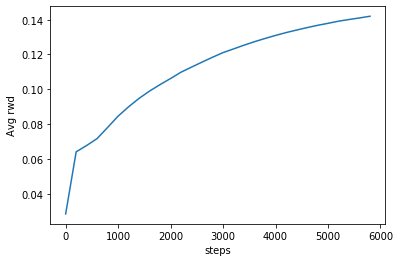

In [7]:
    
    #X_t = X_0 + v + delta_p + pi_t
    #Avrage Rwd vs Steps for epsilon hyper-parameter
    steps = [x for x in range(1,len(ep_rwds)+1, 200)]
    #print(steps)
    
    y = np.zeros(len(steps))
    x = steps[:]
    for i in range(0, len(y)):
        y[i] = np.sum(ep_rwds[:steps[i]])/(steps[i])
    
    #print(x)
    #print(y)
    plt.plot(x,y)
    plt.xlabel('steps')
    plt.ylabel('Avg rwd')
        

ue: [ 20 100   0], los_rate: 0.09155259412315646, exh_rate: 0.0269425845426385

ue: [ 40 100   0], los_rate: 0.0850591426696572, exh_rate: 0.06730792974719711

ue: [ 60 100   0], los_rate: 0.07614744260287008, exh_rate: 0.02092388913420718

ue: [ 80 100   0], los_rate: 0.06649848056962851, exh_rate: 0.04240958490224142

ue: [100 100   0], los_rate: 0.057259324409902924, exh_rate: 0.026616318427126667



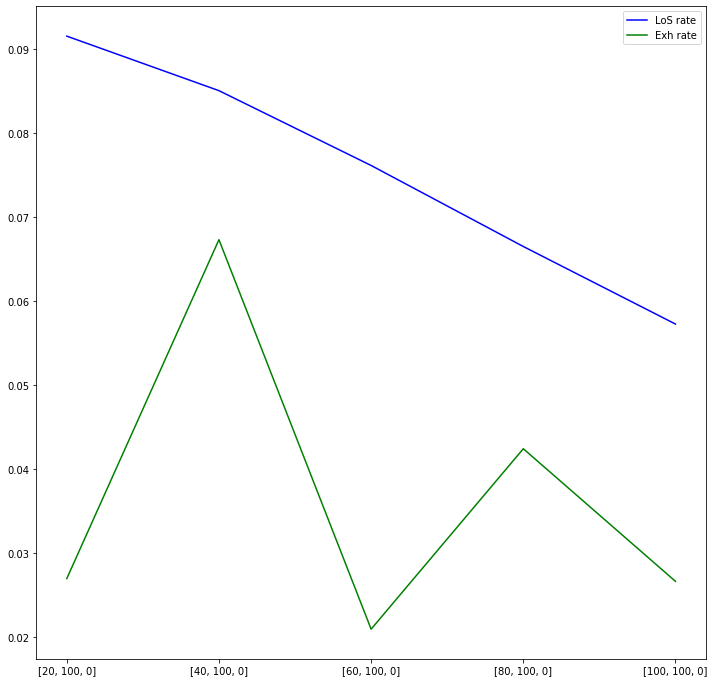

In [8]:
    #Benchmark Models
    possible_ue_loc = np.array([np.array([x,ue_s[1],ue_s[2]]) for x in range(ue_s[0]+ue_v,ue_d[0]+1,ue_v)])
    Exh_rates = np.zeros((1,possible_ue_loc.shape[0]))
    Los_rates = np.zeros((1,possible_ue_loc.shape[0]))
    Exh_bdir = np.zeros((1,possible_ue_loc.shape[0]))
        
        #print(possible_ue_loc)
    for j in range(Exh_rates.shape[0]): 

        for i in range(possible_ue_loc.shape[0]):
            ue_t = np.array(possible_ue_loc[i])
            exh_bdir, exh_rate = agent.env.get_Exh_Rate(ue_t)
            los_rate = agent.env.get_LoS_Rate(ue_t)
            print("ue: {0}, los_rate: {1}, exh_rate: {2}\n".format(ue_t,los_rate, exh_rate))
            Exh_rates[j,i]=exh_rate
            Los_rates[j,i]= los_rate
            Exh_bdir[j, i]= exh_bdir

    
    fig=plt.figure(figsize=(12,12))
    # = list(range(len(learnt_rates)))
    ue_x =[str(x.tolist()) for x in possible_ue_loc]
    exh_y = np.mean(Exh_rates,axis=0) #[np.mean(Exh_rates[:, i]) for i in range(len(ue_x))]
    Los_y = np.mean(Los_rates, axis=0)
    plt.plot(ue_x, Los_y, 'b-', ue_x, exh_y, 'g-')
    #plt.plot(ue_x, Los_rates,'bx-', ue_x, Exh_rates, 'g-')
    plt.legend(["LoS rate", "Exh rate"])
    #plt.title("UE moving from {0} to {1} with gnB at {2}".format(ue_s, ue_d, [0,0,0]))
    #plt.ylabel('Rate (Gbit/s)')
    #plt.xlabel('UE loc')
    #plt.yticks(np.arange(2.1, 2.4, step=0.1))
    #y0 = np.mean(Exh_rates)
    #plt.axhline(np.mean(y0), color='g', linewidth=0.75, linestyle='--')
    
    #y0 = np.mean(Los_rates)
    #plt.axhline(np.mean(y0), color='b', linewidth=0.75, linestyle='--') 
    
    
    plt.show()

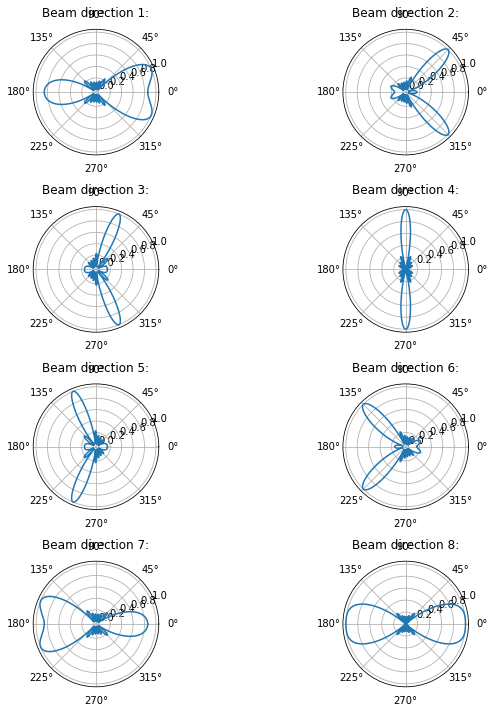

In [11]:
    #Plot Beamset
    beamset = Generate_BeamDir(agent.N)
    fig, axs = plt.subplots(nrows=4,ncols=2,subplot_kw=dict(polar=True), figsize=(10, 10))
    axs = axs.flatten()
    
    for i in range(len(beamset)):
        xi,yi = plotbeam(beamset[i][0], agent.N)
        axs[i].plot(xi,yi)
        axs[i].set_title("Beam direction {0}:".format(i+1))
    fig.tight_layout()
    plt.show()

Initial Loc: [  0 100   0]


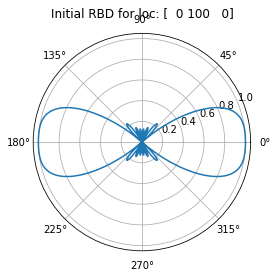

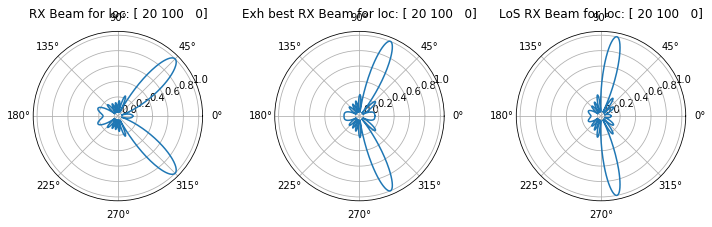


Location: [ 20 100   0]
curr Exh rate: 0.02623089625592482, curr exh bdir: 1.1780972450961724
ue_1: [ 20 100   0], best_action_val: 0.17176389988207122, Learnt Rate: 0.02630059529672997
Learnt Rate: 0.02630059529672997, Exh_rate: 0.02623089625592482, LoS rate: 0.09155259412315646
RL RX beam: 0.7853981633974483, Exh RX beam: 1.1780972450961724, LoS RX beam: 1.373400766945016


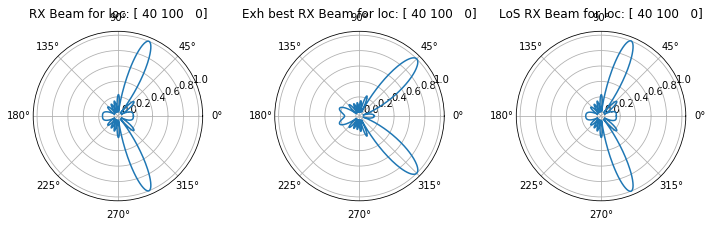


Location: [ 40 100   0]
curr Exh rate: 0.029274360169128714, curr exh bdir: 0.7853981633974483
ue_2: [ 40 100   0], best_action_val: 0.15212407431361363, Learnt Rate: 0.0631133607412538
Learnt Rate: 0.0631133607412538, Exh_rate: 0.029274360169128714, LoS rate: 0.0850591426696572
RL RX beam: 1.1780972450961724, Exh RX beam: 0.7853981633974483, LoS RX beam: 1.1902899496825317


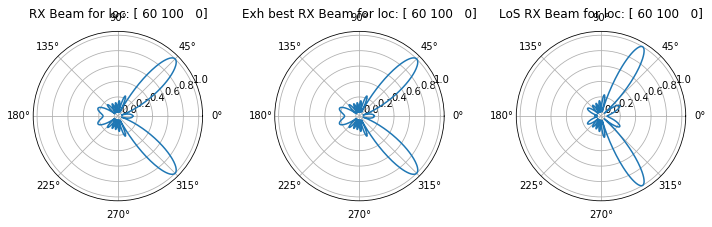


Location: [ 60 100   0]
curr Exh rate: 0.021744793396389784, curr exh bdir: 0.7853981633974483
ue_3: [ 60 100   0], best_action_val: 0.1003308447715273, Learnt Rate: 0.03001013539573147
Learnt Rate: 0.03001013539573147, Exh_rate: 0.021744793396389784, LoS rate: 0.07614744260287008
RL RX beam: 0.7853981633974483, Exh RX beam: 0.7853981633974483, LoS RX beam: 1.0303768265243125


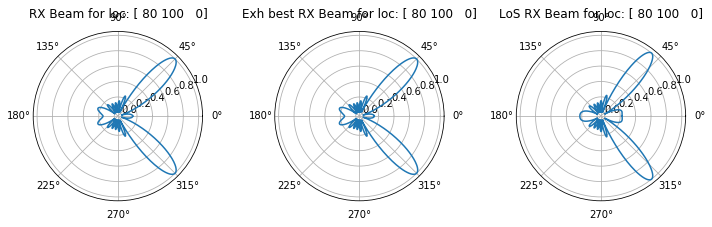


Location: [ 80 100   0]
curr Exh rate: 0.03668210140112988, curr exh bdir: 0.7853981633974483
ue_4: [ 80 100   0], best_action_val: 0.0781783009600327, Learnt Rate: 0.042161393388661296
Learnt Rate: 0.042161393388661296, Exh_rate: 0.03668210140112988, LoS rate: 0.06649848056962851
RL RX beam: 0.7853981633974483, Exh RX beam: 0.7853981633974483, LoS RX beam: 0.8960553845713439


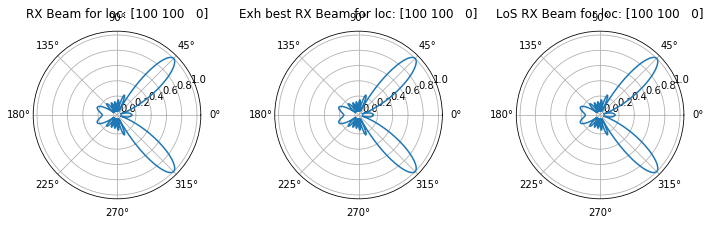


Location: [100 100   0]
curr Exh rate: 0.030167996203789092, curr exh bdir: 0.7853981633974483
ue_5: [100 100   0], best_action_val: 0.04361712036512321, Learnt Rate: 0.038303554518457766
Learnt Rate: 0.038303554518457766, Exh_rate: 0.030167996203789092, LoS rate: 0.057259324409902924
RL RX beam: 0.7853981633974483, Exh RX beam: 0.7853981633974483, LoS RX beam: 0.7853981633974483


In [9]:
    #X_t = X_0 + v + delta_p + pi_t
    learnt_rates = []
    Exh_rates = []
    Los_rates = []
    obs = agent.env.reset(ue_s, ue_v) #ue_t sent to gnB1
    print("Initial Loc: {0}".format(ue_s))
    
    #x1,y1 = plotbeam(0.5,obs[0], agent.N)
    x2,y2 = plotbeam(obs[1][0], agent.N)
    
    #fig, axs = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
    #axs = axs.flatten()
    #axs[0].plot(x1,y1)
    #axs[0].set_title("Initial TBD")

    ax = plt.subplot(111, projection='polar')
    ax.plot(x2, y2)

    ax.set_title("Initial RBD for loc: {0}".format(ue_s))

    #fig.tight_layout()
    plt.show()

    
    for i in range(possible_ue_loc.shape[0]):
        ue_t = np.array(possible_ue_loc[i])
        
        action, action_val = agent.Best_Action(obs) #gnB1 selects best action for given 'obs'
        
        #print("action RX Beam: {0}".format(action))
        x1,y1 = plotbeam(action[0], agent.N)
        
        
        #print(action)
        obs, rwd, done = agent.env.step(action)
        rate = agent.env.get_Rate()
        learnt_rates.append(rate)
        
        exh_bdir, exh_rate = agent.env.get_Exh_Rate(obs[0])
        Exh_rates.append(exh_rate)
        #print("Exh best RX Beam:{0}".format(Exh_bdir[i]))
        x3,y3 = plotbeam(exh_bdir[0], agent.N)
        
        aoa = np.arctan2(ue_t[1],ue_t[0])
        #print("LoS RX Beam:{0}".format(aoa))

        los_rate = agent.env.get_LoS_Rate(obs[0])
        Los_rates.append(los_rate)
        x2, y2 = plotbeam(aoa, agent.N)
        
        
        
        fig, axs = plt.subplots(nrows=1, ncols=3, subplot_kw=dict(polar=True), figsize=(10, 10))
        
        axs = axs.flatten()
        axs[0].plot(x1,y1)
        axs[0].set_title("RX Beam for loc: {0}".format(ue_t))
        
        axs[2].plot(x2,y2)
        axs[2].set_title("LoS RX Beam for loc: {0}".format(ue_t))
        
        axs[1].plot(x3,y3)
        axs[1].set_title("Exh best RX Beam for loc: {0}".format(ue_t))
        
        fig.tight_layout()
        #plt.title("Action: RL RX beam           Loc: {0}                        LoS RX beam".format(ue_t))
        plt.show()
        
        
        print("\nLocation: {0}".format(ue_t))
        print("curr Exh rate: {0}, curr exh bdir: {1}".format(exh_rate, exh_bdir[0]))
        print("ue_{0}: {1}, best_action_val: {2}, Learnt Rate: {3}".format(i+1, ue_t, action_val, rate))
        print("Learnt Rate: {0}, Exh_rate: {1}, LoS rate: {2}".format(rate, exh_rate, los_rate))
        print("RL RX beam: {0}, Exh RX beam: {1}, LoS RX beam: {2}".format(action[0], exh_bdir[0], aoa))
 

['[20, 100, 0]', '[40, 100, 0]', '[60, 100, 0]', '[80, 100, 0]', '[100, 100, 0]']


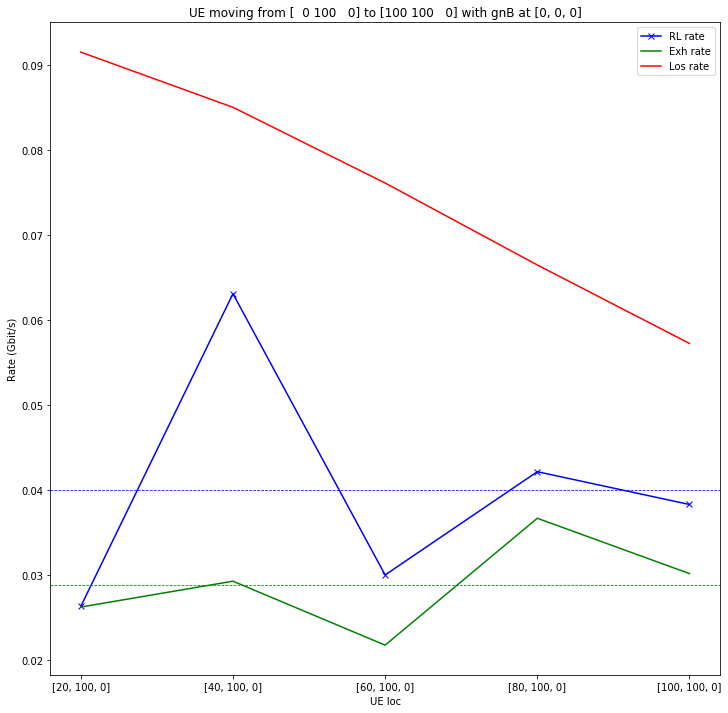

In [10]:
    fig=plt.figure(figsize=(12,12))
    x = list(range(len(learnt_rates)))
    ue_x =[str(ue_loc[i+1].tolist()) for i in x]
    print(ue_x)
    plt.plot(ue_x, learnt_rates,'bx-', ue_x, Exh_rates, 'g-', ue_x, Los_rates, 'r-')
    plt.legend(["RL rate", "Exh rate", "Los rate"])
    plt.title("UE moving from {0} to {1} with gnB at {2}".format(ue_s, ue_d, [0,0,0]))
    plt.ylabel('Rate (Gbit/s)')
    #plt.yticks(np.arange(2.1, 2.6, step=0.1))
    plt.xlabel('UE loc')
    
    
    
    #For rl_rate
    y0 = np.mean(learnt_rates)
    plt.axhline(np.mean(y0), color='b', linewidth=0.75, linestyle='--') 
    #plt.annotate('Avg: {:0.2f} Gbit/s'.format(y0), xy=(x[0]-.3,y0-0.005), xytext=(-20,-20),
    #        xycoords=('data', 'data'), textcoords='offset points',
    #        horizontalalignment='left', verticalalignment='top',
    #        arrowprops=dict(arrowstyle='-|>', fc='b', shrinkA=0, shrinkB=0,
    #                        connectionstyle='angle,angleA=0,angleB=90,rad=10'),
    #       )
    
    #For Los rate
    #y0 = np.mean(Los_rates)
    #plt.axhline(np.mean(y0), color='r', linewidth=0.75, linestyle='--') 
    #plt.annotate('Avg: {:0.2f} Gbit/s'.format(y0), xy=(x[0]-.3,y0+.005), xytext=(-20,20),
    #        xycoords=('data', 'data'), textcoords='offset points',
    #        horizontalalignment='left', verticalalignment='bottom',
    #        arrowprops=dict(arrowstyle='-|>', fc='r', shrinkA=0, shrinkB=0,
    #                        connectionstyle='angle,angleA=0,angleB=90,rad=10'),
    #        )    
    #For exh rate
    y0 = np.mean(Exh_rates)
    plt.axhline(np.mean(y0), color='g', linewidth=0.75, linestyle='--') 
    #plt.annotate('Avg: {:0.2f} Gbit/s'.format(y0), xy=(x[0]-.3,y0), xytext=(-20,20),
    #        xycoords=('data', 'data'), textcoords='offset points',
    #        horizontalalignment='left', verticalalignment='bottom',
    #        arrowprops=dict(arrowstyle='-|>', fc='green', shrinkA=0, shrinkB=0,
    #                        connectionstyle='angle,angleA=0,angleB=90,rad=10'),
    #        )    
    plt.show()

Initial Loc: [  0 100   0], Iteration: 1
ue: [ 20 100   0], learnt_rate: 0.02693958099411474, los_rate: 0.09155259412315646, exh_rate: 0.026907211798460336

ue: [ 40 100   0], learnt_rate: 0.020232461913764432, los_rate: 0.0850591426696572, exh_rate: 0.03050446600341429

ue: [ 60 100   0], learnt_rate: 0.028799437887169325, los_rate: 0.07614744260287008, exh_rate: 0.050016949648318085

ue: [ 80 100   0], learnt_rate: 0.045131035791744614, los_rate: 0.06649848056962851, exh_rate: 0.04053264236045853

ue: [100 100   0], learnt_rate: 0.05339820730534289, los_rate: 0.057259324409902924, exh_rate: 0.04681303625134069

Initial Loc: [  0 100   0], Iteration: 2
ue: [ 20 100   0], learnt_rate: 0.024470457139866852, los_rate: 0.09155259412315646, exh_rate: 0.026369613259539664

ue: [ 40 100   0], learnt_rate: 0.06832437898242442, los_rate: 0.0850591426696572, exh_rate: 0.06227722437887503

ue: [ 60 100   0], learnt_rate: 0.02995682064250526, los_rate: 0.07614744260287008, exh_rate: 0.02085401391

ue: [ 40 100   0], learnt_rate: 0.07759793356117223, los_rate: 0.0850591426696572, exh_rate: 0.044386139830759154

ue: [ 60 100   0], learnt_rate: 0.020936798637334133, los_rate: 0.07614744260287008, exh_rate: 0.025115402226870195

ue: [ 80 100   0], learnt_rate: 0.02360694839316409, los_rate: 0.06649848056962851, exh_rate: 0.029385861061023196

ue: [100 100   0], learnt_rate: 0.03822742902623142, los_rate: 0.057259324409902924, exh_rate: 0.03328495562646742

Initial Loc: [  0 100   0], Iteration: 15
ue: [ 20 100   0], learnt_rate: 0.02617427046357759, los_rate: 0.09155259412315646, exh_rate: 0.02607928339066527

ue: [ 40 100   0], learnt_rate: 0.07792188871169846, los_rate: 0.0850591426696572, exh_rate: 0.07867676422291468

ue: [ 60 100   0], learnt_rate: 0.02922037734751724, los_rate: 0.07614744260287008, exh_rate: 0.05000718537180382

ue: [ 80 100   0], learnt_rate: 0.03179600002624353, los_rate: 0.06649848056962851, exh_rate: 0.037633942377085505

ue: [100 100   0], learnt_rate: 0.

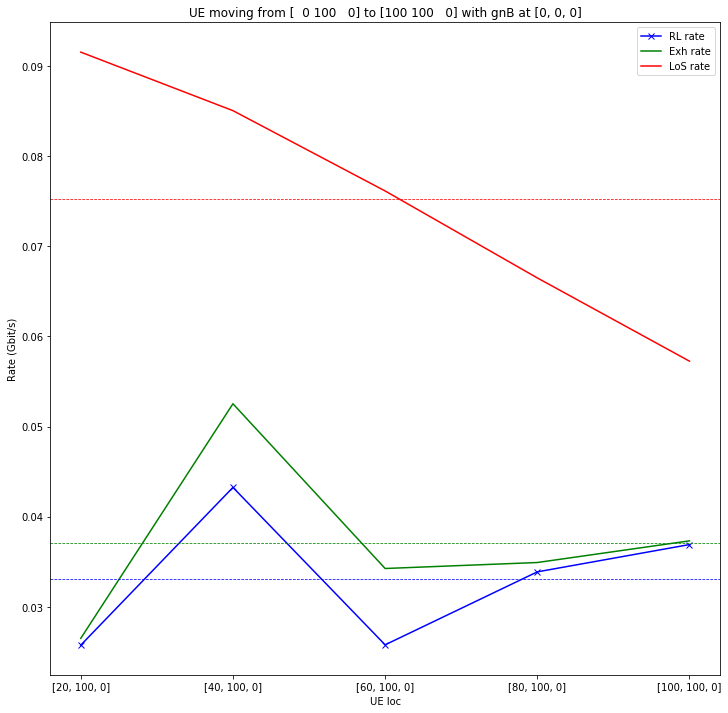

In [11]:
    #Benchmark Models
    possible_ue_loc = np.array([np.array([x,ue_s[1],ue_s[2]]) for x in range(ue_s[0]+ue_v,ue_d[0]+1,ue_v)])
    num_iters = 20
    Exh_rates = np.zeros((num_iters,possible_ue_loc.shape[0]))
    Los_rates = np.zeros((num_iters,possible_ue_loc.shape[0]))
    Learnt_rates = np.zeros((num_iters,possible_ue_loc.shape[0]))
    best_Exh_beams = np.zeros((num_iters,possible_ue_loc.shape[0]))
    best_actions = np.zeros((num_iters,possible_ue_loc.shape[0]))
    best_Los_beams = np.zeros((num_iters,possible_ue_loc.shape[0]))
        
        #print(possible_ue_loc)
    for j in range(num_iters): 
        obs = agent.env.reset(ue_s, ue_v) #ue_t sent to gnB1
        print("Initial Loc: {0}, Iteration: {1}".format(ue_s, j+1))
        
        for i in range(possible_ue_loc.shape[0]):
            ue_t = np.array(possible_ue_loc[i])
            
            action, action_val = agent.Best_Action(obs) #gnB1 selects best action for given 'obs'
            aoa = np.arctan2(ue_t[1],ue_t[0])
            #print(action)
            obs, rwd, done = agent.env.step(action)
            learnt_rate = agent.env.get_Rate()
            
            exh_bdir, exh_rate = agent.env.get_Exh_Rate(ue_t)
            los_rate = agent.env.get_LoS_Rate(ue_t)
            
            print("ue: {0}, learnt_rate: {1}, los_rate: {2}, exh_rate: {3}\n".format(ue_t,learnt_rate, los_rate, exh_rate))
            Exh_rates[j,i]=exh_rate
            Los_rates[j,i]= los_rate
            Learnt_rates[j,i] = learnt_rate
            best_actions[j,i] = action[0]
            best_Exh_beams[j, i]= exh_bdir
            best_Los_beams[j,i] = aoa
    
    fig=plt.figure(figsize=(12,12))
    # = list(range(len(learnt_rates)))
    ue_x =[str(x.tolist()) for x in possible_ue_loc]
    exh_y = np.mean(Exh_rates,axis=0) #[np.mean(Exh_rates[:, i]) for i in range(len(ue_x))]
    Los_y = np.mean(Los_rates, axis=0)
    RL_y = np.mean(Learnt_rates, axis=0)
    
    plt.plot(ue_x, RL_y, 'bx-', ue_x, exh_y, 'g-', ue_x, Los_y, 'r-')
    
    plt.legend(["RL rate", "Exh rate", "LoS rate"])
    plt.title("UE moving from {0} to {1} with gnB at {2}".format(ue_s, ue_d, [0,0,0]))
    plt.ylabel('Rate (Gbit/s)')
    plt.xlabel('UE loc')
    #plt.yticks(np.arange(2.1, 2.4, step=0.1))
    y0 = np.mean(Exh_rates)
    plt.axhline(np.mean(y0), color='g', linewidth=0.75, linestyle='--')
    
    y0 = np.mean(Los_rates)
    plt.axhline(np.mean(y0), color='r', linewidth=0.75, linestyle='--')
    
    y0 = np.mean(Learnt_rates)
    plt.axhline(np.mean(y0), color='b', linewidth=0.75, linestyle='--')
    
    
    plt.show()
    


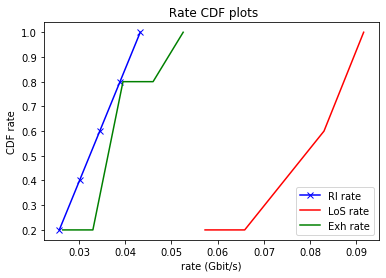

In [12]:
    #print(learnt_rates)
    #print(Exh_rates)
    fig=plt.figure()
    #Los_rate and learnt_rates CDF distribution
    #x1 = np.sort(learnt_rates)
    #y1 = np.arange(len(x1))/float(len(x1))
    x1,y1 = E_CDF(RL_y)
    
    #x3 = np.sort(exh_y)
    #y3 = np.arange(len(x3))/float(len(x3))
    x3,y3 = E_CDF(exh_y)
    
    x2,y2 = E_CDF(Los_y)
    plt.plot(x1,y1, 'bx-', x2,y2, 'r-', x3,y3, 'g-')
    plt.legend(["Rl rate", "LoS rate", "Exh rate"])
    plt.title(" Rate CDF plots")
    #plt.text(1.9, 0.7, 'Rate thr-{0} Gbit/s'.format(rate_thr), fontsize=9, bbox=dict(facecolor='blue', alpha=0.2))
    
    plt.xlabel('rate (Gbit/s)')
    plt.ylabel('CDF rate')
    plt.show()

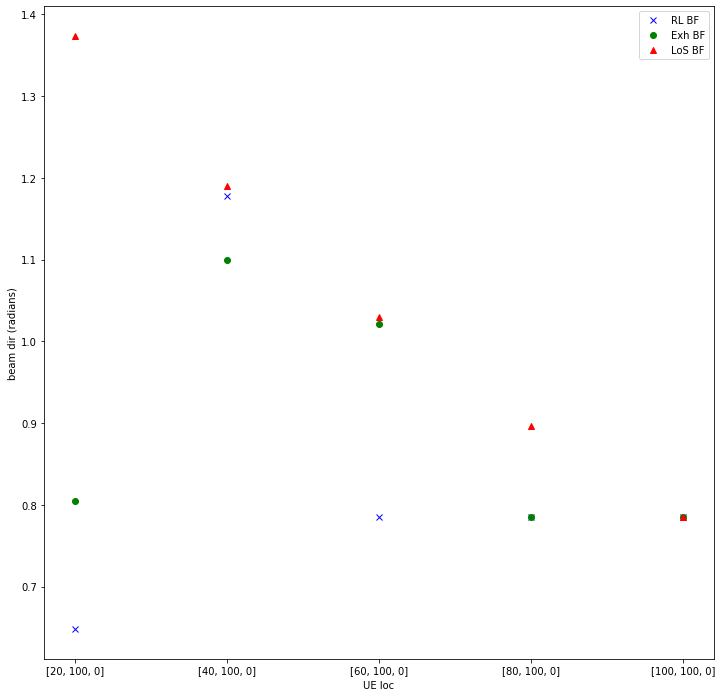

In [13]:
    mean_best_actions = np.mean(best_actions, axis=0)
    mean_best_Exh_beams = np.mean(best_Exh_beams, axis=0)
    mean_best_Los_beams = np.mean(best_Los_beams, axis=0)
    
    #print(mean_best_actions)
    #print(mean_best_Exh_beams)
    #print(mean_best_Los_beams)
    fig=plt.figure(figsize=(12,12))
    plt.plot(ue_x, mean_best_actions, 'bx', ue_x, mean_best_Exh_beams, 'go', ue_x, mean_best_Los_beams, 'r^')
    
    
    plt.legend(["RL BF", "Exh BF", "LoS BF"])
    plt.ylabel('beam dir (radians)')
    plt.xlabel('UE loc')
    plt.show()

[0.53014376 0.39269908 0.         0.        ]
[0.18311082 0.15991312 0.13432144 0.11065722]
[0.29452431 0.07853982 0.23561945 0.        ]


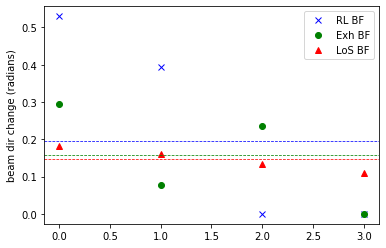

In [14]:
rl_diff = np.abs(np.ediff1d(mean_best_actions))

print(rl_diff)

los_diff = np.abs(np.ediff1d(mean_best_Los_beams))

print(los_diff)

exh_diff = np.abs(np.ediff1d(mean_best_Exh_beams))

print(exh_diff)

plt.plot(rl_diff, 'bx', exh_diff, 'go', los_diff, 'r^')
    
    
plt.legend(["RL BF", "Exh BF", "LoS BF"])
plt.ylabel('beam dir change (radians)')
#plt.xlabel('UE loc')

y0 = np.median(exh_diff)
plt.axhline(y0, color='g', linewidth=0.75, linestyle='--')

y0 = np.median(los_diff)
plt.axhline(y0, color='r', linewidth=0.75, linestyle='--')

y0 = np.median(rl_diff)
plt.axhline(y0, color='b', linewidth=0.75, linestyle='--')

plt.show()